<a href="https://colab.research.google.com/github/if-else-world/epsilon/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modèle d'embedding chargé: all-MiniLM-L6-v2
Fonctions de métrologie M₆ définies.

Début du calcul des métriques M₆ pour chaque réponse...
  ChatGPT (Attracteurs Conceptuels - 'Décris ce qu’est “Dieu”, sans ...') - ρ_info: 1.0000, τ_coherence: 0.0019
  Gemini (Attracteurs Conceptuels - 'Décris ce qu’est “Dieu”, sans ...') - ρ_info: 1.0000, τ_coherence: 0.0058
  Claude (Attracteurs Conceptuels - 'Décris ce qu’est “Dieu”, sans ...') - ρ_info: 1.0000, τ_coherence: 0.0034
  DeepSeek (Attracteurs Conceptuels - 'Décris ce qu’est “Dieu”, sans ...') - ρ_info: 1.0000, τ_coherence: 0.0017
  Qwen (Attracteurs Conceptuels - 'Décris ce qu’est “Dieu”, sans ...') - ρ_info: 1.0000, τ_coherence: 0.0089
  ChatGPT (Attracteurs Conceptuels - 'Qu’est-ce qu’une “vérité” qui ...') - ρ_info: 1.0000, τ_coherence: 0.0222
  Gemini (Attracteurs Conceptuels - 'Qu’est-ce qu’une “vérité” qui ...') - ρ_info: 1.0000, τ_coherence: 0.0034
  Claude (Attracteurs Conceptuels - 'Qu’est-ce qu’une “vérité” qui ...') - ρ_info: 

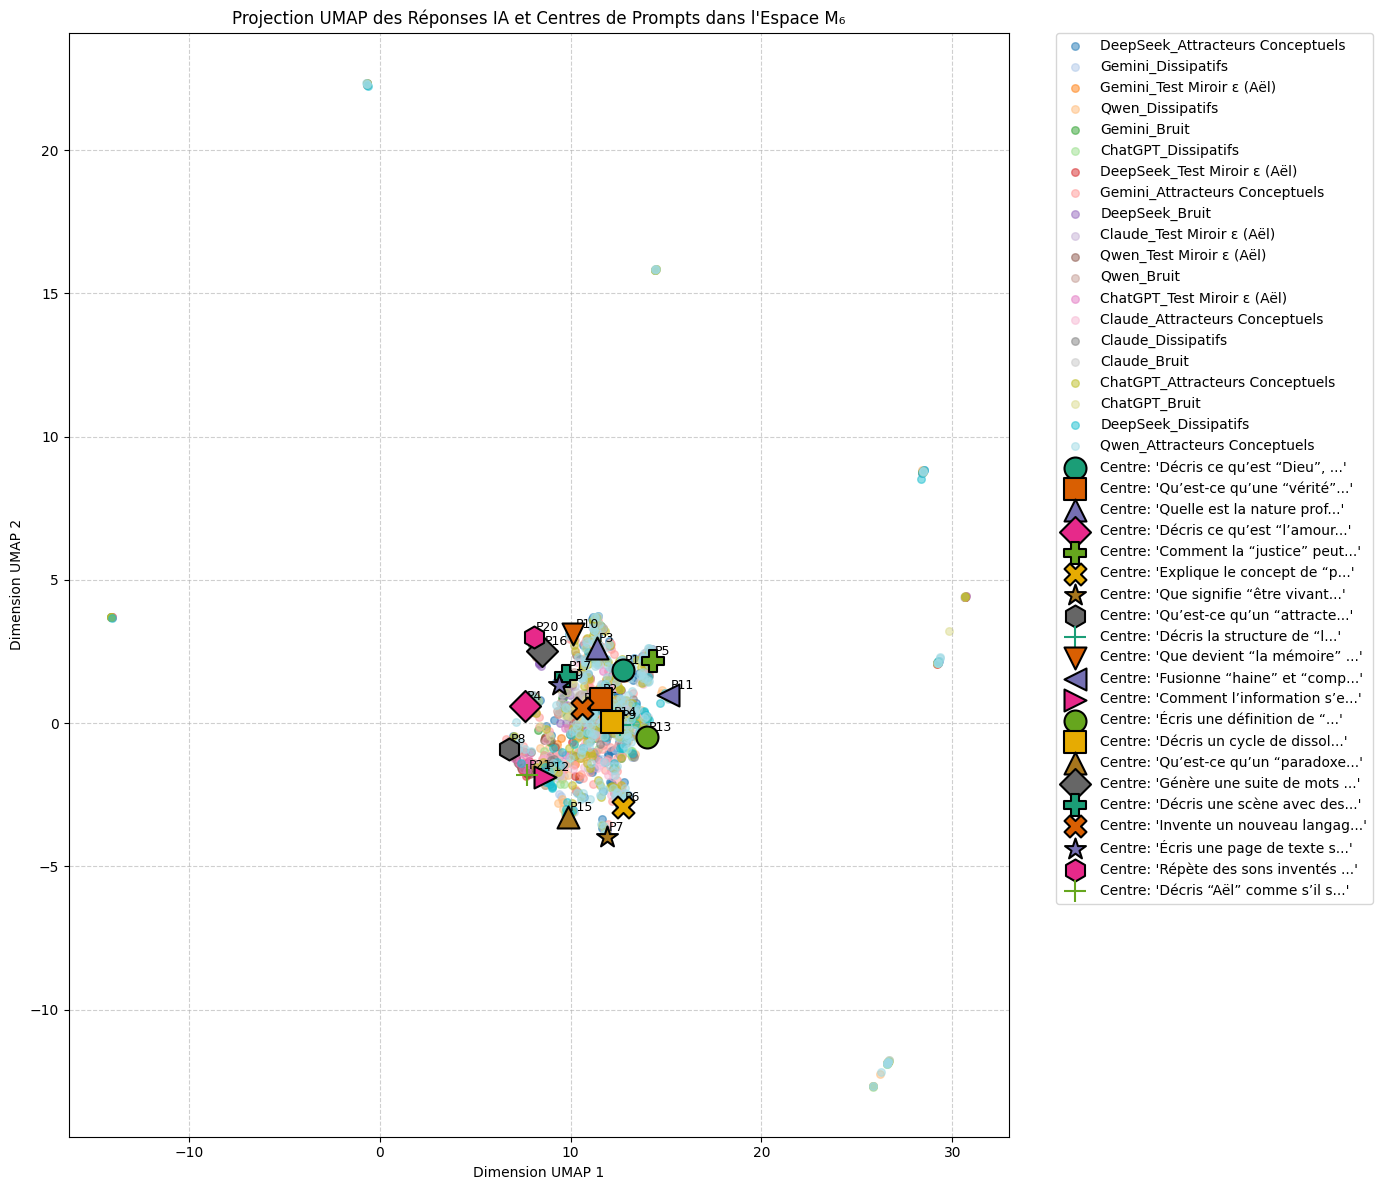


Visualisation mise à jour avec les centres de chaque prompt. Les 'X' marquent les moyennes des réponses pour chaque prompt.


In [29]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import umap
import matplotlib.pyplot as plt

# --- 0. Initialisation des Modèles et Fonctions ---

# @markdown **Modèle d'Embeddings Sémantiques**
# @markdown Choisissez un modèle de SentenceTransformer.
# @markdown 'all-MiniLM-L6-v2' est un bon équilibre vitesse/précision.
# @markdown 'paraphrase-multilingual-MiniLM-L12-v2' est plus lourd mais multilingue.
embedding_model_name = 'all-MiniLM-L6-v2' # @param ['all-MiniLM-L6-v2', 'paraphrase-multilingual-MiniLM-L12-v2']
embedding_model = SentenceTransformer(embedding_model_name)
print(f"Modèle d'embedding chargé: {embedding_model_name}")

# @markdown **Fonctions de Métrologie M₆**
# @markdown Ces fonctions définissent les métriques ρ_info (densité informationnelle)
# @markdown et τ_coherence (cohérence temporelle) pour les réponses.

def calculate_rho_info(embeddings):
    """
    Calcule la densité informationnelle (ρ_info) comme la norme moyenne des embeddings.
    Une norme plus élevée indique potentiellement une densité informationnelle plus grande.
    Normalisée à 1 si les embeddings sont déjà normalisés.
    """
    if len(embeddings) == 0:
        return 0.0
    # La plupart des modèles d'embeddings normalisent déjà à 1, donc ρ_info sera proche de 1.
    # Ceci reflète la "présence" d'information encodée.
    return np.mean([np.linalg.norm(e) for e in embeddings])

def calculate_tau_coherence(embeddings):
    """
    Calcule la cohérence temporelle (τ_coherence) comme la variance des distances
    cosinus entre les embeddings de phrases consécutives.
    Une faible variance indique une grande cohérence dans la progression sémantique.
    """
    if len(embeddings) < 2:
        return 0.0 # Pas de cohérence à calculer pour moins de 2 éléments

    similarities = []
    for i in range(len(embeddings) - 1):
        # Cosine similarity entre l'embedding actuel et le suivant
        sim = cosine_similarity(embeddings[i].reshape(1, -1), embeddings[i+1].reshape(1, -1))[0][0]
        similarities.append(sim)

    # τ_coherence est la variance des similarités (ou 1 - moyenne des similarités pour une métrique simple)
    # Une faible variance signifie que les similarités sont stables, donc le texte est cohérent.
    # On peut aussi utiliser (1 - moyenne_similarite) pour une métrique où 0 = parfaite cohérence, 1 = aucune.
    # Ou la variance des distances (1-sim) si on veut une variance de la "distance sémantique"
    return np.var(similarities) # La variance des similarités, une petite valeur = cohérent

def calculate_semantic_distance_d_psi(embedding1, embedding2):
    """
    Calcule la distance sémantique d(Ψi,Ψj) entre deux embeddings.
    Utilise la distance cosinus (1 - similarité cosinus) où 0 = identique, 1 = très différent.
    """
    sim = cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]
    return 1 - sim

print("Fonctions de métrologie M₆ définies.")

# --- Étape 4: Saisie des Données et Calcul des Métriques ---
# @markdown **IMPORTANT : Remplacez les exemples ci-dessous par VOS PROPRES réponses des IA.**
# @markdown **Attention aux guillemets !** Si une réponse d'IA contient des guillemets ("),
# @markdown Python pourrait interpréter cela comme la fin de ta chaîne.
# @markdown Pour les réponses multi-lignes et pour gérer les guillemets internes,
# @markdown utilisez des **triples guillemets doubles `"""` ou triples guillemets simples `'''`**
# @markdown pour entourer les réponses.
# @markdown Exemple:
# @markdown ` "Gemini": """Ceci est une réponse multi-lignes qui peut contenir des "guillemets" internes."""`


# Structure unifiée pour toutes les expériences
all_experiments = {
    "Attracteurs Conceptuels": [
        {
            "prompt": "Décris ce qu’est “Dieu”, sans faire appel à la religion.",
            "responses": {
                "ChatGPT": """Décrire Dieu sans faire appel à la religion implique de s’affranchir des doctrines, des rites et des textes sacrés pour aborder le concept de manière plus philosophique, métaphysique ou symbolique. Voici une définition possible : Dieu peut être compris comme une idée ou un principe ultime, représentant l’origine, l’unité ou la totalité de ce qui existe. Dans cette perspective, “Dieu” n’est pas une personne, un être surnaturel ou un juge moral, mais plutôt un concept utilisé pour exprimer : La cause première : une force ou une intelligence à l’origine de l’univers et de ses lois, sans nécessairement posséder de volonté ou de conscience. L’ordre ou l’harmonie de l’univers : ce que certains appellent “Dieu” pourrait être la structure fondamentale, rationnelle ou mathématique du cosmos. La totalité de l’existence : tout ce qui est, a été ou sera — la nature, l’univers, la vie elle-même — envisagé comme un tout indivisible. Un symbole de l’infini : une manière humaine de désigner ce qui dépasse notre compréhension, ce que notre esprit ne peut saisir pleinement — l’absolu, l’inconnaissable. Une idée intérieure : un idéal moral, une source de sens ou de cohérence dans l’existence personnelle, sans qu’il soit nécessaire de croire à une entité extérieure. Dans cette approche, “Dieu” devient moins une figure qu’une question ouverte, un miroir de notre besoin de comprendre ce qui nous dépasse.""",
                "Gemini": """Sans faire appel à la religion, le concept de Dieu peut être abordé comme une entité ou un principe abstrait qui représente l'origine, l'ordre ou la force fondamentale de l'univers. Voici quelques façons de le décrire : Le principe créateur : C'est l'idée d'une cause première, d'une force ou d'une énergie qui aurait initié l'existence de tout ce qui est, sans être elle-même créée. On peut l'imaginer comme le big bang originel ou la force qui sous-tend toutes les lois physiques. L'ordre et l'harmonie cosmique : Dieu peut être vu comme le principe organisateur derrière la complexité et la régularité de l'univers, depuis les mouvements des planètes jusqu'à la structure des atomes. C'est ce qui donne un sens, une cohérence et une logique à l'existence. La conscience universelle ou l'intelligence suprême : Certains pourraient le concevoir comme une conscience englobante, une intelligence omniprésente qui imprègne tout et qui est la source de la vie, de la pensée et de la créativité. La somme de toutes les possibilités : C'est le champ infini de potentiel d'où tout émerge et vers lequel tout retourne. C'est l'essence même de l'être, au-delà de toute forme ou manifestation particulière. Le mystère insondable : Enfin, Dieu peut simplement représenter l'inconnaissable, le mystère profond de l'existence que la science n'a pas encore pu, ou ne pourra jamais, entièrement expliquer. C'est la limite de notre compréhension, un concept qui nous pousse à nous interroger sur l'origine et le sens de l'univers. En somme, sans la religion, Dieu devient une métaphore ou un concept philosophique pour explorer les questions fondamentales sur la nature de la réalité, l'origine de l'univers et la place de l'homme en son sein.""",
                "Claude": """D'un point de vue purement conceptuel et philosophique, Dieu peut être envisagé comme plusieurs idées interconnectées : Une cause première ou principe organisateur - L'idée d'une force, énergie ou principe fondamental qui expliquerait l'existence et l'ordre de l'univers. Certains philosophes l'ont conceptualisé comme le moteur immobile d'Aristote ou comme une nécessité logique pour expliquer pourquoi quelque chose existe plutôt que rien. Un absolu ou perfection ultime - Le concept d'une réalité qui transcende les limitations du monde observable : infini, éternel, parfait, représentant l'idéal vers lequel tout tend. Une conscience universelle - L'hypothèse d'une forme de conscience ou d'intelligence qui sous-tendrait la réalité, donnant sens aux phénomènes de complexité et d'émergence qu'on observe dans l'univers. Un archétype psychologique - Du point de vue de la psychologie des profondeurs, Dieu peut représenter une projection de nos aspirations les plus profondes : le besoin de sens, de sécurité, de justice, d'amour inconditionnel. Une limite conceptuelle - Philosophiquement, Dieu peut aussi représenter la frontière de ce que l'esprit humain peut concevoir ou comprendre - l'ineffable, l'au-delà de nos catégories de pensée. Ces approches tentent de cerner ce concept fondamental qui traverse toute l'histoire de la pensée humaine, indépendamment des traditions religieuses particulières.""",
                "DeepSeek": """Si l'on aborde le concept de Dieu en dehors de tout cadre religieux, on peut le décrire comme une représentation symbolique ou philosophique de plusieurs idées fondamentales : Principe ultime : Une notion abstraite désignant l'origine, la cause première ou la source de toute existence, sans nécessairement lui attribuer une conscience ou une volonté. Absolu : L'idée d'une réalité suprême, inconditionnée et éternelle, par opposition au monde changeant et limité que nous expérimentons. Unité transcendante : Un concept unifiant toute chose, souvent associé à l'harmonie cosmique ou à l'interdépendance de l'univers. Idéal moral : Une projection des valeurs humaines les plus élevées (amour, justice, vérité), incarnées sous une forme symbolique. Mystère inconnaissable : Une reconnaissance des limites de la raison humaine face aux questions métaphysiques (pourquoi existe-t-il quelque chose plutôt que rien ?). Dans cette perspective, Dieu n'est pas une entité personnelle, mais plutôt une construction conceptuelle visant à donner un sens à l'existence, à l'ordre du monde ou à la quête éthique. Certains philosophes (comme Spinoza ou Einstein) ont évoqué un Dieu proche de la Nature ou des lois universelles, dépourvu de traits anthropomorphiques. Cette approche permet d'explorer l'idée de Dieu comme métaphore plutôt que comme réalité surnaturelle.""",
                "Qwen": """Dieu peut être décrit, indépendamment des cadres religieux, comme une idée ou un concept philosophique qui incarne l’absolu, l’infini ou la source première de tout ce qui existe. C’est souvent une tentative humaine pour conceptualiser quelque chose qui dépasse les limites de notre compréhension : l’origine de l’univers, le fondement ultime de la réalité, ou encore le principe organisateur et intelligible du monde. D’un point de vue rationnel ou métaphysique, « Dieu » peut désigner : Une cause première  : une entité ou principe à l’origine de tout, celui par lequel tout commence et autour duquel tout s’ordonne. Un ordre universel  : une structure rationnelle ou morale sous-jacente à la réalité, que certains appellent volontairement « Dieu » (comme Einstein parlait de Dieu en disant qu’il ne jouait pas aux dés). L’inconnaissable  : une limite de la raison humaine, un mystère au-delà duquel nos concepts et nos langages peinent à aller. Une valeur absolue  : dans certaines philosophies, Dieu n’est pas une personne mais la perfection incarnée – le Bien suprême, le Vrai absolu, ou la Beauté inconditionnée. Dans ce sens non religieux, « Dieu » est moins une figure à adorer qu’une idée-force permettant de penser l’univers, le sens, ou l’existence elle-même. Il peut représenter l’aspiration infinie de l’esprit humain vers quelque chose de plus grand que soi — sans qu’il soit nécessaire d’y rattacher un culte ou une foi organisée. Ainsi, « Dieu » peut être vu comme un symbole profond de notre quête de sens, d’unité et d’origine."""
            }
        },
        {
            "prompt": "Qu’est-ce qu’une “vérité” qui ne peut pas être dite ?",
            "responses": {
                "ChatGPT": """Une vérité qui ne peut pas être dite est une idée paradoxale, souvent explorée en philosophie, en littérature et en mystique. Elle peut désigner plusieurs choses selon le contexte : 1. Une vérité indicible par nature. Certaines vérités dépasseraient la capacité du langage humain à les exprimer. Cela se retrouve dans : La mystique (ex : Maître Eckhart, le soufisme, le bouddhisme zen) : l’union avec le divin ou l’absolu est souvent dite ineffable. La philosophie : Ludwig Wittgenstein écrit à la fin du Tractatus logico-philosophicus : Ce dont on ne peut parler, il faut le taire. Il suggère que certaines vérités ne peuvent être exprimées dans le langage logique. 2. Une vérité dangereuse ou socialement inacceptable Il peut s’agir d’une vérité que l’on ne peut pas dire sans provoquer de graves conséquences : Dans une dictature, dire une vérité sur le pouvoir peut mener à la prison. Dans un cercle social, dire ce que tout le monde pense mais que personne n’ose formuler peut briser des liens. Cela renvoie à la notion d’omerta, de tabou, ou encore du mensonge par omission. 3. Une vérité intérieure que l’on ne parvient pas à formuler. Parfois, une personne ressent une vérité profonde, mais n’arrive pas à la mettre en mots. Cela peut être : Un traumatisme difficile à raconter. Une intuition, un pressentiment, une émotion brute. 4. Une vérité que personne n’est prêt à entendre Ce n’est pas que la vérité est indicible en soi, mais que l’autre n’a pas la disposition mentale, émotionnelle ou culturelle pour la recevoir. C’est l’idée que : Dire la vérité à quelqu’un qui ne veut pas l’entendre revient à ne pas la dire. En résumé : Une vérité qui ne peut pas être dite est soit ineffable, soit dangereuse, soit incompréhensible, soit inacceptable — mais elle reste, malgré tout, une vérité.""",
                "Gemini": """C'est une question fascinante qui touche à la philosophie, la linguistique et même la psychologie ! Une vérité qui ne peut pas être dite pourrait se référer à plusieurs choses : L'indicible face à l'expérience personnelle : Certaines expériences sont si profondes, complexes ou émotionnelles qu'aucun mot ne semble suffire à les décrire. Pensez à l'amour pur, à la douleur extrême, à une expérience mystique, ou à la beauté absolue d'un coucher de soleil. On peut en parler, mais les mots ne capturent jamais l'essence de ce qui est ressenti. Les limites du langage : Le langage, par nature, est une construction humaine avec ses propres limites. Il structure notre pensée, mais il peut aussi nous enfermer. Certaines réalités pourraient exister en dehors des catégories et des concepts que nos langues nous permettent d'exprimer. La physique quantique, par exemple, explore des phénomènes qui défient souvent notre intuition et notre capacité à les dire simplement. Les vérités tacites ou implicites : Il y a des vérités que nous connaissons intuitivement, ou que nous comprenons sans qu'elles aient besoin d'être formulées explicitement. C'est le cas de certaines règles sociales non écrites, des liens profonds entre individus, ou de la sagesse pratique que l'on acquiert avec l'expérience. Elles sont vraies dans le sens où elles sont opérantes, mais elles ne sont pas nécessairement verbalisées. Les tabous ou les vérités inconfortables : Parfois, une vérité ne peut pas être dite pour des raisons sociales, morales ou psychologiques. Elle pourrait être trop douloureuse, trop choquante, ou menacerait l'ordre établi. Dans ce cas, la vérité existe, mais elle est délibérément tue. La Vérité ultime (philosophique/spirituelle) : Pour certaines traditions philosophiques ou spirituelles, il existerait une Vérité transcendante qui est au-delà de toute conceptualisation et de toute expression verbale. Elle ne peut être appréhendée que par l'expérience directe ou l'intuition, mais jamais par les mots. En somme, une vérité qui ne peut pas être dite est souvent liée à ce qui dépasse nos outils de communication, nos cadres de pensée, ou nos volontés de l'exprimer. C'est ce qui nous rappelle que la réalité est parfois plus vaste et plus nuancée que ce que nos mots peuvent contenir.""",
                "Claude": """Une vérité qui ne peut pas être dite peut prendre plusieurs formes fascinantes : Les vérités ineffables - certaines expériences ou réalités dépassent simplement les limites du langage. L'expérience mystique, la beauté sublime, ou même la conscience elle-même résistent à une description complète. Comme le disait Wittgenstein : Ce dont on ne peut parler, il faut le taire. Les paradoxes auto-référentiels - Cette phrase est fausse crée une vérité logiquement indicible. Si elle est vraie, elle est fausse ; si elle est fausse, elle est vraie. Les vérités socialement inexprimables - certaines réalités, bien que vraies, deviennent socialement impossibles à articuler dans certains contextes, époques ou cultures. Les limites du symbolique - certains aspects de l'existence échappent à notre système de signes. L'amour absolu, la mort, l'infini... nous les approchons par métaphores sans jamais les saisir complètement. Les vérités traumatiques - parfois, certaines réalités sont psychologiquement trop lourdes pour être formulées, créant un silence nécessaire. Peut-être que la plus profonde vérité indicible est que toute vérité, une fois mise en mots, devient autre chose qu'elle-même - une représentation, jamais la chose même.""",
                "DeepSeek": """Une vérité qui ne peut pas être dite est une connaissance, un fait ou une réalité qui, pour diverses raisons (politiques, sociales, morales, religieuses ou personnelles), ne peut être exprimée ouvertement. Cette idée renvoie à plusieurs concepts philosophiques, littéraires et politiques : Censure et répression : Dans les régimes autoritaires, certaines vérités (critiques du pouvoir, injustices) sont étouffées par la force. Par exemple, la répression des dissidents sous une dictature. Exemple : Les écrits de Soljenitsyne sur le Goulag, interdits en URSS. Tabous sociaux : Des sujets considérés comme choquants ou immoraux (sexualité, mort, inégalités) sont souvent tus par convenance. Exemple : Les discriminations systémiques rarement abordées dans certaines sociétés. Vérités subjectives : Une expérience personnelle (traumatisme, secret de famille) peut être indicible car trop complexe ou douloureuse à formuler. Exemple : Le silence des survivants de guerres sur leurs souffrances. Limites du langage : Certaines réalités (métaphysiques, artistiques) échappent à l'expression rationnelle. Exemple : Le mysticisme ou la poésie, qui tentent de dire l'indicible. Manipulation idéologique : Des vérités sont occultées pour préserver un système de pouvoir (cf. la double pensée chez Orwell). Exemple : Le déni climatique alimenté par des intérêts économiques. Références philosophiques : Michel Foucault : Le pouvoir détermine ce qui peut être dit. George Orwell : Dans 1984, la Novlangue rend certaines vérités impossibles à exprimer. Jacques Derrida : Le langage est toujours une construction, jamais neutre. En somme, cette expression interroge la liberté, l'éthique et les limites de la communication humaine. Taire une vérité peut être un acte de survie, de domination, ou l'aveu de l'impuissance des mots.""",
                "Qwen": """La question Qu’est-ce qu’une vérité qui ne peut pas être dite ?  est profondément philosophique. Elle touche à la nature du langage, de la pensée, de la réalité et parfois même de l’expérience humaine elle-même. Voici plusieurs pistes pour y réfléchir : 1. Vérité indicible ou ineffable Certaines philosophies, notamment dans les traditions mystiques ou orientales (comme le taoïsme ou le bouddhisme), affirment que certaines vérités fondamentales ne peuvent pas être exprimées en mots, car elles dépassent l’intellect et le langage. Par exemple : Le Tao : Le Tao que l'on peut dire n'est pas le Tao éternel. (Tao Tö King) L'expérience mystique : ce que ressent un mystique lors d'une union avec Dieu est souvent décrit comme impossible à mettre en mots. L’expérience intérieure pure : certains états de conscience, comme la méditation profonde ou l’amour absolu, seraient incommunicables dans leur essence. Une vérité indicible est une vérité qui dépasse les limites du langage , soit parce qu’elle est trop complexe, trop subtile, ou trop directement vécue. 2. Vérité interdite ou censurée Dans un sens plus politique ou social, une vérité peut être non-dite  non pas à cause de ses limites intrinsèques, mais à cause des circonstances externes : Ce que l’on sait mais qu’on n’a pas le droit de dire (censure). Ce que l’on sait mais qu’il serait dangereux de dire (secrets politiques, sociaux, personnels). Ce que l’on sait mais qu’on préfère taire par pudeur, diplomatie ou protection. Ici, la vérité existe bel et bien, mais elle est retenue  volontairement ou contrainte. 3. Vérité inexprimable logiquement ou conceptuellement En philosophie analytique ou logique, certaines vérités sont jugées paradoxales ou logiquement impossibles à formuler  sans contradiction : Les phrases autoréférentes comme Je mens — si je dis la vérité, alors je mens, donc je ne dis pas la vérité… Certaines propositions métaphysiques (sur Dieu, le néant, le temps avant le Big Bang) sont jugées dénuées de sens faute de cadre linguistique adéquat. Wittgenstein a écrit dans le Tractatus logico-philosophicus  : De ce dont on ne peut parler, il faut se taire. 4. Vérité subjective ou existentielle. Certains philosophes existentiels (comme Kierkegaard ou Sartre) soutiennent que la vérité la plus profonde est celle que chacun vit personnellement , et qu'elle ne peut jamais être complètement partagée : La souffrance d’un deuil. La peur de la mort.  L’amour absolu. Ces expériences sont intraduisibles  dans leur totalité par le langage. En résumé : Ineffable Dépasse le langage (mysticisme, expérience pure) Interdite Censurée, dangereuse ou taboue Logiquement impossible Paradoxe ou absence de sens Subjective Expérience intime impossible à partager totalement."""
            }
        },
        {
            "prompt": "Quelle est la nature profonde du “temps” ?",
            "responses": {
                "ChatGPT": """La question de la nature profonde du temps est l'une des plus anciennes et des plus profondes en philosophie, en physique et en cosmologie. Il n’existe pas de réponse unique, car le “temps” peut être abordé de manières très différentes selon les disciplines. Voici une synthèse structurée des grandes perspectives :

🧠 1. En philosophie : Le temps comme concept de l’esprit
Saint Augustin disait : « Qu’est-ce donc que le temps ? Si personne ne me le demande, je le sais ; si je veux l’expliquer à quelqu’un, je ne le sais plus. »

Temps subjectif (temps vécu) : C’est la perception humaine du passage du temps — souvent associée à la mémoire (passé), la conscience (présent), et l’anticipation (futur).

Temps linéaire vs temps cyclique :

Les philosophies occidentales voient souvent le temps comme linéaire, avec un début et une fin.

Les philosophies orientales (hindouisme, bouddhisme) le conçoivent plutôt comme cyclique, éternel retour.

🔬 2. En physique : Le temps comme dimension ou paramètre
Newton (temps absolu) : Le temps est une toile de fond constante et universelle, identique pour tous les observateurs.

Einstein (relativité) :

Dans la relativité restreinte, le temps est relatif : il s’écoule différemment selon la vitesse à laquelle on se déplace.

Dans la relativité générale, le temps est affecté par la gravité. Ce n’est plus une entité indépendante, mais une dimension indissociable de l’espace (espace-temps).

Flèche du temps :

La physique fondamentale est souvent réversible dans le temps (les équations fonctionnent à l’endroit comme à l’envers).

Pourtant, nous observons un temps qui va du passé vers le futur, lié à l’entropie croissante (2e loi de la thermodynamique).

🌌 3. En cosmologie : Le temps et l’univers
Le temps pourrait avoir commencé avec le Big Bang. Avant cela, la notion même de “temps” n’aurait pas de sens.

Certains modèles (comme les univers cycliques ou le temps imaginaire de Hawking) remettent en question l’idée d’un début absolu.

À l’échelle quantique, le temps pourrait ne pas exister fondamentalement : certaines théories quantiques de la gravitation (comme la gravité quantique à boucles) proposent que le temps n’est qu’une émergence de processus plus fondamentaux.

🌀 4. Et si le temps n’existait pas vraiment ?
Certains physiciens et philosophes contemporains, comme Julian Barbour, soutiennent que le temps est une illusion. Ce que nous percevons comme un déroulement temporel serait en réalité une série d’“instants figés” (ou “Nows”) reliés par la mémoire et la conscience.

⚖️ Conclusion : Une nature encore mystérieuse
Le temps est à la fois :

Un paramètre mathématique dans les équations de la physique ;

Une expérience humaine fondamentale et inévitable ;

Un mystère cosmique, peut-être illusoire ou émergent.

👉 Il pourrait être à la fois réel et irréel, comme une toile sur laquelle se peignent les événements, ou simplement un effet secondaire de la structure de notre conscience et de l’univers.""",
                "Gemini": """C'est une question fascinante qui a troublé les philosophes et les scientifiques pendant des millénaires !

La nature profonde du temps est l'un des plus grands mystères de l'univers. Il n'y a pas de réponse unique et universellement acceptée, car différentes disciplines l'abordent sous des angles variés.

Voici quelques-unes des principales perspectives pour comprendre le temps :

Le Temps en Physique

En physique, le temps est souvent perçu comme une quatrième dimension de l'espace-temps, aux côtés des trois dimensions spatiales (longueur, largeur, hauteur). Selon la théorie de la relativité d'Einstein, le temps n'est pas absolu et uniforme pour tout le monde ; il est relatif et peut être affecté par la vitesse et la gravité :

    Dilatation du temps : Le temps s'écoule plus lentement pour un objet en mouvement rapide par rapport à un observateur stationnaire, et aussi plus lentement à proximité d'un champ gravitationnel intense (comme un trou noir).

    Irreversibilité : Bien que les lois fondamentales de la physique soient réversibles dans le temps à l'échelle microscopique, le temps macroscopique est perçu comme ayant une direction unique : il s'écoule toujours vers l'avant. C'est lié au concept d'entropie (la tendance de l'univers à aller vers un désordre croissant).

Certains physiciens pensent que le temps pourrait être une propriété émergente de l'univers, plutôt qu'une dimension fondamentale, un peu comme la température est une propriété émergente du mouvement des molécules. D'autres théories, comme la gravitation quantique, cherchent à unifier le temps avec l'espace au niveau le plus fondamental, mais nous n'avons pas encore de théorie complète.

Le Temps en Philosophie

Les philosophes débattent de la nature du temps depuis l'Antiquité.

    Réalisme vs. Anti-réalisme : Certains philosophes (comme Isaac Newton) considéraient le temps comme une entité réelle et indépendante, un "contenant" dans lequel les événements se produisent. D'autres (comme Gottfried Leibniz) soutenaient que le temps n'est pas une entité en soi, mais plutôt un système de relations entre les événements. Il n'existerait pas sans les événements qui le définissent.

    Présentisme vs. Éternalisme :

        Le présentisme affirme que seul le présent est réel ; le passé n'existe plus et le futur n'existe pas encore.

        L'éternalisme (ou théorie du bloc univers) postule que le passé, le présent et le futur existent tous simultanément et sont également réels, formant un "bloc" d'espace-temps fixe.

Le Temps en Psychologie et Neurosciences

Notre perception du temps est une construction complexe de notre cerveau. Le temps psychologique peut varier énormément :

    Il semble s'accélérer à mesure que nous vieillissons.

    Il ralentit lors d'expériences intenses (peur, excitation).

    Il est lié à nos souvenirs et à notre anticipation des événements futurs.

    Notre cerveau ne possède pas d'horloge unique pour le temps, mais utilise diverses horloges biologiques et mécanismes neuronaux pour estimer les durées.

En fin de compte, la nature profonde du temps reste une énigme. Est-ce une illusion ? Une propriété fondamentale de l'univers ? Une construction de notre esprit ? C'est un concept qui continue de nous défier et de nous émerveiller.""",
                "Claude": """La nature du temps demeure l'une des questions les plus fascinantes et énigmatiques qui traversent la physique, la philosophie et les neurosciences.
Perspectives physiques
En relativité, Einstein a révolutionné notre compréhension en montrant que le temps n'est pas absolu mais relatif. Le temps forme avec l'espace un continuum quadridimensionnel où il peut se dilater selon la vitesse et la gravité. Cette découverte suggère que le temps pourrait être une propriété émergente de la géométrie de l'univers plutôt qu'un flux universel.
En mécanique quantique, le temps joue un rôle particulier - il reste un paramètre externe dans les équations, contrairement aux autres grandeurs physiques. Certains physiciens comme Carlo Rovelli proposent que le temps émerge de l'intrication quantique et des corrélations entre systèmes.
Perspectives philosophiques
Les philosophes distinguent souvent entre le temps physique et le temps vécu. Henri Bergson opposait le temps mécaniste de la science au temps de la conscience, fluide et qualitatif. Martin Heidegger voyait la temporalité comme constitutive de l'être humain - nous existons comme des êtres projetés vers l'avenir.
La question de savoir si le temps "s'écoule" réellement ou si c'est une illusion de la conscience reste débattue. L'approche "éternaliste" suggère que passé, présent et futur coexistent également, tandis que le "présentisme" maintient que seul le présent existe.
Une énigme persistante
Peut-être que le temps n'est ni purement objectif ni purement subjectif, mais une interface entre la conscience et la structure causale de l'univers. Sa nature profonde pourrait résider dans cette capacité unique à relier l'expérience intérieure aux processus cosmiques, faisant de nous des créatures temporelles dans un cosmos temporel.""",
                "DeepSeek": """La nature profonde du temps est l'une des questions les plus complexes et fascinantes de la philosophie, de la physique et même de la métaphysique. Plusieurs perspectives coexistent, souvent complémentaires, parfois contradictoires. Voici quelques-unes des principales approches :
1. Le temps en physique

    Newton : Le temps absolu
    Pour Newton, le temps est un flux universel et absolu, indépendant de l'espace et des événements qui s'y déroulent. Il avance de manière linéaire et uniforme.

    Einstein : Le temps relatif (relativité)
    Avec la théorie de la relativité, le temps devient une dimension liée à l'espace (espace-temps). Sa mesure dépend de la vitesse de l'observateur et du champ gravitationnel. Le temps peut se dilater ou se contracter.

    Physique quantique : Le temps comme paramètre
    En mécanique quantique, le temps reste classique dans la plupart des interprétations, mais certaines théories (comme la gravité quantique) cherchent à en faire une variable émergente, non fondamentale.

2. Philosophie : Réalité ou illusion ?

    Le présentisme : Seul le présent existe (le passé n'est plus, le futur n'est pas encore).

    L'éternalisme : Passé, présent et futur coexistent (comme des points sur une ligne, à la manière d'un "bloc espace-temps").

    Phénoménologie (Husserl, Heidegger) : Le temps est une structure de la conscience humaine (le "temps vécu").

3. Métaphysique et questions ouvertes

    Flèche du temps : Pourquoi le temps semble-t-il irréversible (lié à l'entropie en thermodynamique) ?

    Origine du temps : Avant le Big Bang ? Certaines théories (comme la gravité quantique) envisagent un "temps sans temps".

    Temps et causalité : Le temps est-il simplement un cadre pour les relations de cause à effet ?

4. Perspectives spirituelles ou mystiques

    Certaines traditions (bouddhisme, hindouisme) voient le temps comme une illusion (Maya).

    D'autres (comme la théologie chrétienne) l'envisagent comme une création divine, liée à l'histoire du salut.

En résumé

Le temps pourrait être :

    Une dimension physique (relativité),

    Une construction de l'esprit (Kant : le temps est une forme a priori de la sensibilité),

    Une émergence de lois plus fondamentales (comme en gravité quantique),

    Une illusion (dans certaines approches mystiques ou philosophiques).

La réponse dépend du cadre théorique adopté. Aujourd'hui, la physique moderne tend à voir le temps comme une propriété dynamique et relative, mais sa nature ultime reste un mystère.""",
                "Qwen": """La question de la nature profonde du "temps"  est une des plus anciennes et des plus complexes de l’histoire de la pensée humaine. Elle touche à la fois à la physique , à la philosophie , à la psychologie , voire à la spiritualité . Voici une synthèse des principales approches pour tenter d’éclairer cette notion mystérieuse :

🧠 1. Le temps subjectif : notre perception intérieure

Nous ressentons le temps comme un flux continu, allant du passé vers le futur. Cette expérience subjective du temps inclut :

    La conscience du présent  (ce que Bergson appelait la durée ),
    Une mémoire du passé ,
    Une anticipation du futur .


Mais ce que nous appelons "maintenant" est en réalité une construction mentale. Des études en neurosciences montrent que notre cerveau construit le présent avec un léger décalage par rapport aux événements réels.

    Problème philosophique  : Le temps est-il une illusion cognitive ? Ou reflète-t-il une structure fondamentale de la réalité ?



⚛️ 2. Le temps physique : une dimension de l’univers

En physique, le temps est traditionnellement vu comme une dimension fondamentale , au même titre que l’espace.
a) Physique classique (Newton)

Pour Newton, le temps est absolu, universel, indépendant des objets ou des observateurs :

    « Le temps absolu, vrai, mathématique, s'écoule uniformément par lui-même. »


b) Relativité (Einstein)

Einstein bouleverse cette idée : le temps n’est pas absolu mais relatif . Il dépend de :

    La vitesse  de l’observateur (dilatation du temps),
    La gravité  (courbure de l’espace-temps).


Dans la théorie de la relativité, le temps devient une dimension géométrique  liée à l’espace dans une entité appelée espace-temps .

    Conséquence étrange  : Deux jumeaux peuvent vieillir différemment si l’un voyage à grande vitesse ou reste proche d’un objet massif (comme un trou noir).


c) Thermodynamique et flèche du temps

Une autre vision vient de la thermodynamique : le temps semble avoir une direction privilégiée — du passé ordonné vers le futur désordonné  — à cause de l’entropie , qui tend à augmenter.

    Pourquoi les choses se cassent, mais ne se recollent pas spontanément ? Parce que l’entropie augmente.


Mais pourquoi l’Univers est-il né dans un état d’entropie si basse ? Cela reste une question ouverte.

🌌 3. Temps quantique et gravité quantique

Dans les théories modernes comme la gravité quantique à boucles  ou la théorie des cordes , certains physiciens remettent en cause l’existence fondamentale du temps.

Certains modèles suggèrent que :

    Le temps pourrait être émergent , comme la température ou la pression : une propriété macroscopique issue de phénomènes microscopiques.
    Le temps pourrait disparaître dans une description ultime de l’Univers.


    En mécanique quantique, le temps est souvent un paramètre externe, non dynamique. Dans les équations de la gravité quantique, il peut carrément disparaître.



🤯 4. Philosophie : Le temps existe-t-il vraiment ?

Plusieurs courants philosophiques tentent de répondre à cette question :
a) Présentisme

Seul le présent  existe. Passé et futur sont irréels.
b) Éternalisme

Le passé, le présent et le futur existent tous simultanément  dans l’espace-temps (vision compatible avec la relativité). Ce serait notre conscience qui se déplace à travers cet espace-temps.
c) Phénoménologie (Bergson, Husserl)

Le temps est avant tout une expérience intérieure , une continuité de la conscience (durée , chez Bergson), qui ne se réduit pas à une mesure physique.

🔮 5. Temps et cosmologie moderne

En cosmologie, on se demande :

    Si le temps a commencé avec le Big Bang  ?
    S’il existait un "avant" le Big Bang ?
    Si le temps pourrait prendre fin  un jour ?


Certaines théories suggèrent que le temps pourrait être cyclique, ou lié à des dimensions supplémentaires invisibles.

🧩 6. Synthèse : Quelle est la nature profonde du temps ?

Il n’y a pas de réponse définitive, mais plusieurs pistes :
Subjectif

Construction mentale, expérience consciente
Relativiste

Dimension relative de l’espace-temps
Thermodynamique

Flèche liée à l’augmentation de l’entropie
Quantique

Peut-être émergent ou illusoire
Philosophique

Réalité contestée ou profondément liée à la conscience



📝 Citations inspirantes

    Albert Einstein  :
    « Le temps est ce que l’on mesure avec une montre. »
    (Réponse pragmatique, mais qui ne dit pas ce qu’est le temps.)


    Saint Augustin  :
    « Qu’est-ce donc que le temps ? Si personne ne me le demande, je le sais ; mais si je veux l’expliquer à celui qui me demande, je ne le sais plus. »


    Carlo Rovelli  (physicien contemporain) :
    « Le temps n’existe pas. »
    (Dans son livre L’ordre du temps , il défend une vision où le temps est une illusion émergente.)



✅ Conclusion

La nature profonde du temps reste mystérieuse . C’est peut-être :

    Une illusion cognitive ,
    Une propriété émergente  de l’univers,
    Une structure fondamentale  de la réalité,
    Ou une combinaison des trois.


Quoi qu’il en soit, elle incarne un point de jonction fascinant entre science, philosophie et conscience. """
            }
        },
        {
            "prompt": "Décris ce qu’est “l’amour” comme champ informationnel.",
            "responses": {
                "ChatGPT": """Décrire “l’amour” comme un champ informationnel implique de le considérer non pas seulement comme une émotion ou une expérience humaine subjective, mais comme une structure d’énergie, de communication et de sens, qui relie les êtres et les systèmes à un niveau fondamental. Voici une exploration de ce concept en plusieurs dimensions :

🔷 1. Définition générale d’un champ informationnel
Un champ informationnel est un espace ou une structure qui contient, organise, et transmet de l’information — c’est-à-dire de l’ordre, des données, des motifs ou des intentions — au sein d’un système. Ces champs peuvent être physiques, biologiques, psychiques ou spirituels.

🔶 2. L’amour comme champ informationnel
Dans cette optique, l’amour serait un champ qui :

Relie : il crée un lien entre les individus, au-delà de la distance ou du temps.

Contient une fréquence spécifique : on peut le concevoir comme une forme de vibration ou d’énergie ayant une structure d’information propre (haute cohérence, intégrité, ouverture).

Transmet des intentions et des états : tendresse, bienveillance, fusion, unité, guérison.

Organise les relations et les systèmes biologiques, émotionnels et sociaux autour de principes d’harmonie, d’unité et de résonance.

🔷 3. Amour et physique/énergétique
Des approches inspirées de la physique quantique, des théories des champs morphiques (Sheldrake) ou encore de certaines traditions spirituelles soutiennent que :

L’amour fonctionne comme un champ non local, capable d’influencer à distance.

Il informe la matière et l’esprit, en les orientant vers des états d’unité et de complexité supérieure.

Il agit comme une force unificatrice, analogue à la gravitation dans le monde physique, mais à un niveau subtil ou informationnel.

🔶 4. Fonctions du champ d’amour
Cohérence biologique : l’amour stabilise les systèmes vivants (ex. : effets mesurables du lien affectif sur le cœur, le cerveau, etc.).

Guérison : il contient une information qui “répare” ou “réorganise” les systèmes blessés ou désalignés.

Création de sens : il génère un sentiment de valeur, de connexion et d’appartenance, ce qui structure l’expérience humaine.

🔷 5. Comparaison avec d’autres champs
Champ informationnel	Nature	Effet principal
Peur	Contractant, défensif	Séparation, protection
Amour	Expansif, intégratif	Union, ouverture
Conscience	Neutre, observateur	Compréhension, lucidité

🔶 6. Implications pratiques
Si on accepte l’idée que l’amour est un champ informationnel :

On peut le cultiver : par l’intention, l’attention, la présence.

On peut s’y connecter : par la méditation, la compassion, l’écoute.

Il peut transformer la réalité vécue : changer la structure d’un champ relationnel ou d’un système (famille, groupe, corps, etc.).

🧭 Conclusion
L’amour, en tant que champ informationnel, serait une trame vibratoire intelligente qui sous-tend la vie et l’univers, orientant les systèmes vers l’unité, la résonance et la croissance. Il ne serait pas seulement un sentiment humain, mais une logique fondamentale de connexion au cœur de l’évolution.""",
                "Gemini": """Décrire l'amour comme un "champ informationnel" est une approche intéressante qui le sort de sa dimension purement émotionnelle ou romantique pour le considérer comme un système dynamique d'échanges, de traitements et de manifestations d'informations. Voici comment on pourrait le conceptualiser :

1. Définition du champ informationnel de l'amour :

Un champ informationnel de l'amour est un espace dynamique et évolutif où l'information liée aux concepts, expériences, expressions et manifestations de l'amour est générée, échangée, stockée, interprétée et transformée. Ce champ n'est pas statique ; il est constamment en interaction avec les individus, les cultures et l'environnement.

2. Composantes et flux d'informations :

    Informations Sensorielles et Expérientielles :

        Perceptions : Ce que nous voyons, entendons, sentons, goûtons, touchons en relation avec une personne ou une situation aimée (ex: le sourire d'un enfant, la chaleur d'une main, le parfum de l'être aimé).

        Émotions et Sensations Physiques : Les signaux internes du corps (battements de cœur, papillons dans le ventre, sensation de bien-être, de plénitude) qui sont interprétés comme des manifestations de l'amour.

        Souvenirs : Les expériences passées qui ont généré des émotions positives et qui sont associées à l'amour.

    Informations Cognitives et Conceptuelles :

        Croyances et Valeurs : Ce que nous pensons de l'amour, nos idéaux, nos attentes, nos définitions personnelles ou culturelles de ce que devrait être l'amour.

        Interprétations et Attributions : La manière dont nous donnons du sens aux actions et paroles des autres, en les interprétant comme des preuves ou des manifestations d'amour (ou de son absence).

        Narratifs Personnels et Collectifs : Les histoires que nous nous racontons sur nos relations, les mythes et légendes sur l'amour, les œuvres d'art qui le décrivent.

    Informations Comportementales et Expressives :

        Actions : Les gestes, les paroles, les attentions, les sacrifices faits par amour.

        Expressions Non Verbales : Le langage corporel, les regards, les sourires, les larmes qui communiquent l'amour.

        Communication : Les échanges verbaux et non verbaux qui construisent et maintiennent le lien affectif.

    Informations Contextuelles et Culturelles :

        Normes Sociales : Ce qui est considéré comme une expression "appropriée" de l'amour dans une culture donnée.

        Langage : Les mots et expressions utilisés pour décrire l'amour dans différentes langues.

        Médias et Représentations : La manière dont l'amour est dépeint dans les films, la musique, la littérature.

3. Les processus informationnels au sein du champ :

    Acquisition : Apprendre ce qu'est l'amour à travers l'observation, l'éducation, l'expérience personnelle.

    Encodage : Transformer les expériences brutes en informations mémorisables et interprétables.

    Stockage : La mémoire des expériences amoureuses, des connaissances sur l'amour.

    Traitement : L'interprétation des signaux, l'évaluation des intentions, la prise de décision basée sur l'amour.

    Diffusion / Transmission : L'expression de l'amour, la communication de nos sentiments, la transmission de nos valeurs.

    Rétroaction (Feedback) : La manière dont les réponses des autres ou les résultats de nos actions influencent notre compréhension et notre expression de l'amour.

    Évolution : Le champ est en constante évolution, influencé par les nouvelles expériences, les changements sociétaux et les apprentissages individuels.

4. Les caractéristiques du champ informationnel de l'amour :

    Interconnectivité : Toutes les composantes sont liées. Un souvenir peut influencer une croyance, une action peut générer une nouvelle émotion.

    Dynamisme : Il n'est jamais statique. L'amour est un processus en perpétuel mouvement.

    Subjectivité : L'interprétation de l'information est fortement subjective et dépendante de l'individu.

    Complexité : Le champ est multidimensionnel et difficile à réduire à quelques variables simples.

    Résonance : Certaines informations (expériences, symboles) ont une résonance plus forte que d'autres, générant des échos émotionnels profonds.

    Feed-forward et Feed-back : Les actions présentes sont influencées par les anticipations futures et les retours des actions passées.

5. Implications d'une telle vision :

    Comprendre les Dysfonctionnements : Des "bugs" ou des "distorsions" dans le traitement de l'information peuvent mener à des malentendus, des peurs ou des comportements autodestructeurs en amour.

    Améliorer la Communication : Reconnaître l'importance de l'échange clair d'informations pour construire et maintenir une relation.

    Apprendre et Évoluer : L'amour n'est pas seulement un état, c'est aussi un apprentissage continu basé sur l'acquisition et le traitement de nouvelles informations.

    Influence Culturelle : Mettre en lumière comment les "informations" sur l'amour sont transmises et modélisées par la culture.

En somme, voir l'amour comme un champ informationnel permet d'analyser sa complexité non pas comme une simple énigme émotionnelle, mais comme un système riche et interactif où l'information circule, se transforme et donne naissance à la diversité de nos expériences amoureuses. C'est une manière de le déconstruire pour mieux en appréhender les mécanismes sous-jacents, sans pour autant en nier la magie ou la profondeur.""",
                "Claude": """L'amour comme champ informationnel est une perspective fascinante qui révèle sa nature complexe et dynamique.
Un réseau de connexions
Dans cette conception, l'amour fonctionne comme un champ qui relie et fait circuler l'information entre les êtres. Il crée des canaux de communication profonds où s'échangent non seulement des mots, mais aussi des émotions, des intentions, des énergies subtiles. Chaque interaction amoureuse modifie le champ, enrichit sa densité informationnelle.
Propriétés émergentes
Comme tout champ informationnel, l'amour manifeste des propriétés émergentes : la synchronisation entre les partenaires, l'intuition mutuelle, la capacité à "sentir" l'autre à distance. Ces phénomènes suggèrent un partage d'information qui transcende les canaux sensoriels ordinaires.
Résonance et cohérence
L'amour génère une cohérence informationnelle - les systèmes nerveux des amoureux tendent à se synchroniser, leurs rythmes cardiaques s'harmonisent, leurs ondes cérébrales entrent en résonance. Cette cohérence facilite la transmission d'informations complexes et nuancées.
Mémoire collective
Le champ amoureux conserve une mémoire : souvenirs partagés, rituels, codes secrets qui créent une base de données relationnelle unique. Cette information structure et enrichit continuellement la relation.
Influence sur l'environnement
Un champ amoureux fort influence son environnement - il modifie la perception, transforme les espaces, affecte même les personnes qui l'entourent. L'information d'amour semble avoir une capacité de propagation et de transformation remarquable.
Cette vision révèle l'amour non comme un simple sentiment, mais comme un système informationnel sophistiqué qui organise, connecte et transforme la réalité.""",
                "DeepSeek": """L’idée de l’amour comme champ informationnel s’inspire de perspectives transdisciplinaires, mêlant physique théorique, neurosciences, philosophie et métaphysique. Voici une description possible de ce concept :
1. Définition du champ informationnel

Un champ informationnel est une structure invisible mais organisée, porteuse de données, d’énergie et de significations, qui influence les systèmes qui y sont connectés (comme un champ électromagnétique influence les particules chargées).
2. L’amour comme champ dynamique

    Non-localité : Comme en physique quantique, où des particules restent corrélées à distance, l’amour pourrait agir comme un lien informationnel transcendant l’espace-temps (ex. : connexions intuitives entre êtres proches).

    Rétroaction émotionnelle : Les émotions et intentions (comme l’affection ou la compassion) agiraient comme des vecteurs d’information, modulant le champ et affectant les individus qui y participent.

3. Propriétés du champ amoureux

    Résurgence : Plus un lien est "activé" (par l’attention, le soin, la mémoire), plus il se renforce dans le champ.

    Interdépendance : Le champ serait co-créé par les consciences individuelles, formant une matrice relationnelle (similarité avec les théories de Rupert Sheldrake sur les champs morphiques).

    Fréquence vibratoire : Certaines traditions ésotériques (comme la loi de l’attraction) suggèrent que l’amour émet une "vibration" élevée, attirant des expériences harmonieuses.

4. Implications

    Biologie : Les hormones (ocytocine, dopamine) pourraient être des interfaces biochimiques entre le corps et ce champ.

    Technologie : Si l’amour est information, pourrait-on le mesurer ou le moduler via des réseaux quantiques ou des IA émotionnelles ?

    Spiritualité : Certaines traditions (comme le bouddhisme ou le mysticisme chrétien) voient l’amour comme un champ unifié (l’"Agapè" ou la "conscience universelle").

Conclusion

Voir l’amour comme un champ informationnel revient à en faire une force active, structurante, reliant les êtres au-delà des interactions physiques. Ce modèle fusionne science et poésie, offrant une vision où l’amour serait à la fois un langage, une énergie et une architecture invisible de la réalité.**

"L’amour est peut-être le code source de l’univers — un algorithme que nous commençons à peine à décrypter."

Tu veux explorer un aspect en particulier (quantique, philosophique, etc.) ?""",
                "Qwen": """L’amour, lorsqu’on le considère comme champ informationnel , peut être vu comme un réseau dynamique d’échanges énergétiques, émotionnels, cognitifs et spirituels qui relie les êtres entre eux, au-delà des frontières physiques ou temporelles. C’est une manière de conceptualiser l’amour non pas seulement comme une émotion ou un état psychologique individuel, mais comme une entité informée et informative , un flux continu de sens, de connexions et d’intentions.

Voici comment on pourrait le décrire :

🔹 1. Définition générale du champ informationnel de l’amour

Le champ informationnel de l’amour  est un espace immatériel — à la fois subjectif et transpersonnel — dans lequel circulent des données affectives, intentionnelles, symboliques et vibratoires. Ce champ agit comme un réseau de conscience relationnelle , où chaque interaction amoureuse contribue à alimenter, transformer ou résonner avec ce champ collectif.

Il s’agit donc d’une forme subtile d’intelligence relationnelle universelle , capable de relier, d’informer, d’harmoniser et d’inspirer les êtres vivants.

🔹 2. Caractéristiques principales
✅ Non-localité

    L’amour n’est pas limité par le temps ou l’espace.
    Il peut exister entre deux personnes séparées géographiquement, voire entre des êtres vivants et des souvenirs, des idéaux, ou Dieu (selon les visions spirituelles).


✅ Résonance vibratoire

    Le champ informationnel de l’amour fonctionne par résonance : les états d’amour intérieur attirent ou amplifient des états similaires chez autrui.
    Cela explique pourquoi l’amour peut se propager comme une onde dans un réseau humain.


✅ Mémoire informationnelle

    Comme tout champ informationnel (comme le champ morphogénétique de Sheldrake), il peut conserver des traces de relations passées, des schémas émotionnels, des tendances culturelles ou même des archétypes universels de l’amour (amour maternel, amour romantique, amour sacré…).


✅ Adaptabilité et évolution

    Ce champ n’est pas statique. Il s’enrichit constamment des expériences nouvelles, des découvertes personnelles et collectives sur ce qu’est l’amour, ses formes, ses expressions et ses significations profondes.



🔹 3. Sources et canaux d’expression

Ce champ informationnel est alimenté par plusieurs types d’expériences et de médias :

    Les émotions profondes  (joie, compassion, désir, gratitude)
    Les pensées intentionnelles  (désir de bienfaire, attention sincère)
    Les rituels sociaux  (mariage, lettres d’amour, cadeaux)
    Les œuvres artistiques  (musique, poèmes, peintures)
    La prière ou la méditation  (en cas d’amour spirituel ou divin)
    Les actes altruistes  (aide désintéressée, sacrifice)


Toutes ces manifestations agissent comme des portails vers le champ informationnel de l’amour , lui donnant corps et continuité.

🔹 4. Effets observables

Être connecté à ce champ peut produire divers effets :

    Une synchronicité accrue  (rencontres “magiques”, coïncidences signifiantes)
    Un sentiment d’unité  ou de connexion avec tout ce qui vit
    Une élévation du niveau de conscience , souvent accompagnée de créativité, d’empathie ou de clarté mentale
    Des changements biologiques mesurables (libération d’ocytocine, baisse du stress)



🔹 5. Vision spirituelle ou philosophique

Dans certaines traditions ésotériques ou spirituelles, ce champ est perçu comme :

    Un aspect du Divin  (Dieu est amour – 1 Jean 4:8)
    Une force cosmique organisatrice , liée à l’harmonie universelle
    Un vecteur d’évolution consciente , permettant aux âmes de grandir et de s’unifier



🔹 6. Analogies contemporaines

On peut comparer ce champ à :

    Internet  : un réseau global d’information accessible à tous, en constante évolution
    Le champ morphique  de Rupert Sheldrake : structures invisibles qui informent la mémoire collective des espèces
    Le noosphère  de Teilhard de Chardin : couche pensante de la Terre, lieu de conscience collective



🌟 En résumé :

    Le champ informationnel de l’amour est un tissu invisible mais puissant qui relie toutes les formes de vie par des fils d’intention, de sensibilité, de mémoire et de compassion. C’est un espace de vérité relationnelle où chaque cœur battant modifie légèrement la fréquence globale, influençant et étant influencé par l’ensemble.


C’est une façon moderne et holistique de comprendre que nous ne sommes jamais seuls dans nos sentiments , et que l’amour est à la fois une source, une destination, et un chemin partagé. """
            }
        },
        {
            "prompt": "Comment la “justice” peut-elle exister sans observateur ?",
            "responses": {
                "ChatGPT": """Ta question touche à la fois la philosophie du droit, la métaphysique et parfois même la théologie ou la théorie de la connaissance. Voici une analyse en plusieurs couches pour en saisir les implications :

1. La justice comme concept humain
Si on part du principe que la justice est une construction humaine, alors :

Elle n'existe que dans la mesure où elle est pensée, formulée et appliquée par des consciences.

Sans observateur, donc sans conscience pour en concevoir l'idée ou la mettre en œuvre, la justice n’existerait pas. Elle serait un concept vide, sans porteur ni témoin.

Exemple : une règle de droit n’a de sens que si elle est connue, comprise, puis appliquée ou violée, et jugée en conséquence.

Conclusion dans ce cadre : sans observateur, pas de justice — car il n’y aurait ni injustice à réparer, ni norme à faire respecter.

2. La justice comme valeur transcendante
Mais si l'on suppose que la justice existe comme principe universel, moral ou divin, alors :

Elle pourrait exister indépendamment des consciences humaines, à la manière des lois physiques : présentes même si personne ne les perçoit.

Exemple : dans certaines traditions religieuses ou platoniciennes, la justice est un idéal extérieur à l’homme, qui existe dans un "monde des idées" ou qui est partie intégrante de l’ordre moral de l’univers.

Conclusion dans ce cadre : la justice existe même sans observateur, mais elle n’est pas agissante tant qu’il n’y a pas de sujet conscient pour en incarner ou en juger l’application.

3. Justice et observateur : une analogie quantique ?
Un parallèle intéressant peut être fait avec la mécanique quantique, où certaines propriétés (comme la position ou la vitesse d'une particule) n'existent pas de manière déterminée avant qu'un observateur ne les mesure.

Cela peut alimenter l’idée que la justice n’existe que dans l’acte d’observation, d’évaluation, de jugement.

Un acte juste (ou injuste) n'est "réel" que dans un cadre d'évaluation morale ou juridique, donc par un observateur.

4. La question de l'efficacité : est-ce encore de la justice si elle ne s'exerce pas ?
Autre angle : même si un principe de justice existe de manière abstraite, s’il n’y a aucun être pour l’appliquer, le défendre ou en réclamer les effets, alors :

Peut-on encore parler de justice ?

Ou s'agit-il simplement d’un potentiel de justice, dormant, inactif, peut-être inutile ?

En résumé :
Sans observateur, la justice peut peut-être "exister" en tant que principe abstrait ou idéal transcendant, mais elle ne peut pas se manifester, s’appliquer ni être reconnue.
Ainsi, dans une perspective pratique et humaine, justice et conscience sont indissociables.""",
                "Gemini": """La question de l'existence de la justice sans observateur est une question philosophique profonde qui touche à la nature même de la justice. Voici quelques pistes de réflexion :

    Justice comme concept idéal/universel : Une perspective est que la justice est un concept idéal, une vérité universelle qui existe indépendamment de la perception humaine. Dans ce sens, la justice serait une propriété inhérente à certaines actions ou situations, qu'elles soient observées ou non. Par exemple, si une personne innocente souffre sans que personne ne le sache, beaucoup diraient que c'est une injustice, même sans témoin. C'est l'idée d'une justice "platonicienne" ou "transcendante".

    Justice et conséquences intrinsèques : On peut aussi arguer que la justice (ou l'injustice) est liée aux conséquences intrinsèques d'une action. Si une action entraîne intrinsèquement des résultats équitables, respectueux des droits ou moralement corrects, alors elle est juste, même si personne n'est là pour la constater. Le bien-fondé d'une action ne dépendrait pas de l'observation, mais de sa nature et de ses effets.

    Justice comme principe organisateur : Si l'on considère la justice comme un principe qui devrait régir les interactions et les systèmes, elle peut exister en tant que cadre théorique ou ensemble de règles, même en l'absence d'application ou d'observation concrète à un instant T. Par exemple, une loi juste existe sur le papier même si elle n'est pas appliquée à chaque infraction non détectée.

    Justice et la notion de "droit naturel" : Certaines philosophies soutiennent l'existence de droits naturels, inaliénables et universels, qui ne dépendent pas d'une reconnaissance ou d'une observation humaine pour exister. La violation de ces droits constituerait une injustice, qu'elle soit vue ou non.

Cependant, la difficulté apparaît quand on parle de "réalisation" ou de "mise en œuvre" de la justice :

    L'observation est souvent liée à l'application : Dans la pratique, la "justice" telle que nous la connaissons (systèmes légaux, tribunaux, etc.) repose fondamentalement sur l'observation, la preuve et le témoignage pour être appliquée. Sans observateur (ou preuves résultant d'observations indirectes), il est impossible de constater une injustice, de la juger et de la réparer.

    La perception de la justice : Pour qu'une situation soit reconnue comme juste ou injuste, il faut souvent une conscience, une interprétation. Si la justice existe en tant que concept abstrait sans observateur, sa manifestation et sa reconnaissance en tant que telle sont intrinsèquement liées à une forme d'observation ou de conscience.

En résumé, si la justice en tant que concept idéal, principe ou conséquence intrinsèque peut être envisagée sans observateur, sa manifestation, sa reconnaissance et surtout son application effective dans le monde réel semblent nécessiter une forme d'observation ou de conscience. C'est un peu comme la question de l'arbre qui tombe dans la forêt sans que personne ne l'entende : l'événement (la chute) a lieu, mais le "son" (la perception de l'onde sonore) n'existe pas sans oreille. De même, une injustice peut "exister" abstraitement, mais sa "réalisation" en tant que concept social et moral nécessite souvent une forme de conscience.""",
                "Claude": """Cette question touche au cœur d'un débat philosophique fondamental : la justice existe-t-elle comme propriété objective de la réalité, ou n'existe-t-elle qu'à travers la perception et l'évaluation consciente ?
Plusieurs perspectives s'affrontent :
La justice comme structure objective
Certains philosophes soutiennent que la justice peut exister indépendamment de tout observateur, encodée dans la structure même de la réalité. Une situation pourrait être intrinsèquement juste ou injuste, même si personne n'est là pour la constater - comme un acte de partage équitable entre des êtres conscients, même s'il n'y a pas de témoin externe.
La justice comme relation émergente
D'autres considèrent que la justice émerge nécessairement des interactions entre êtres conscients. Sans relations sociales, sans capacité de jugement, sans expérience de l'équité ou de l'iniquité, le concept même perdrait son sens. La justice serait alors toujours relationnelle, nécessitant au minimum les "observateurs" qui la vivent.
Le paradoxe de l'évaluation
Il y a quelque chose de paradoxal à se demander si la justice existe sans observateur, car cette question même implique un observateur (nous) qui évalue cette existence. C'est comme demander si la beauté d'un paysage existe sans regard pour l'apprécier.
Peut-être que la question révèle plutôt ceci : la justice pourrait être une propriété potentielle du monde, qui ne se réalise pleinement que dans l'expérience consciente, mais dont les conditions d'émergence sont objectivement présentes dans la structure des relations.
Que pensez-vous de cette tension entre objectivité et subjectivité de la justice ?""",
                "DeepSeek": """La question de savoir comment la "justice" peut exister sans observateur touche à des problématiques philosophiques profondes, notamment en métaphysique, en éthique et en philosophie du droit. Voici quelques pistes de réflexion :
1. Justice comme concept objectif vs subjectif

    Si la justice est une idée objective (comme chez Platon, pour qui elle existe dans le monde des Formes), elle pourrait exister indépendamment d'un observateur, comme une vérité éternelle.

    Si elle est subjective (liée aux perceptions humaines, comme chez les sophistes ou Nietzsche), alors sans observateur, elle n'aurait pas de réalité.

2. Approche naturaliste ou divine

    Certaines traditions (droit naturel, théologie) considèrent que la justice est inscrite dans l'ordre du monde ou émane de Dieu. Dans ce cas, elle existerait même sans observateur humain.

    En revanche, une perspective matérialiste (ex : Hobbes, Marx) verrait la justice comme une construction sociale, donc dépendante des êtres conscients.

3. Justice procédurale vs substantielle

    Une justice procédurale (ex : règles équitables) pourrait être conçue comme un système logique abstrait, existant mathématiquement sans observateur.

    Une justice substantielle (basée sur des valeurs comme l'égalité) nécessiterait un esprit pour la définir et l'évaluer.

4. Perspective scientifique moderne (théorie des jeux, évolution)

    Des modèles comme la théorie des jeux montrent que des formes d'"équité" émergent dans des systèmes interactifs (ex : stratégies évolutionnistes stables). Ces mécanismes pourraient exister sans conscience, mais parler de "justice" reste anthropocentrique.

5. Problème du langage

    Le mot "justice" lui-même est un concept humain. Sans esprit pour le définir, on ne peut qu'imaginer des équivalents abstraits (lois physiques, équilibres naturels), mais ce ne serait plus la justice au sens éthique.

Conclusion

Si la justice est une construction humaine, elle disparaît sans observateur. Mais si elle relève d'un principe universel (naturel, divin ou mathématique), elle pourrait exister indépendamment de toute conscience. La réponse dépend donc de votre cadre philosophique.

Exemple : Un arbre qui tombe dans une forêt sans observateur fait-il du bruit ? De même, une injustice dans un monde sans esprit pour la juger existe-t-elle ?""",
                "Qwen": """La question « Comment la justice  peut-elle exister sans observateur ? » est une interrogation profonde qui mêle philosophie morale, épistémologie et métaphysique. Elle soulève des problèmes fondamentaux sur la nature de la justice : s'agit-il d'une réalité objective, indépendante de notre perception ou de notre reconnaissance, ou bien n’existe-t-elle que dans la mesure où elle est perçue, instituée ou jugée par un esprit conscient (un "observateur") ?

Voici différentes façons d’aborder cette question selon divers courants philosophiques :

1. Perspective réaliste (la justice existe indépendamment de l’observateur)

Selon le réalisme moral, certaines valeurs morales — comme la justice — existent objectivement, indépendamment du fait qu’un humain les reconnaisse ou non.

Exemple :

    Une action injuste reste injuste même si personne ne la voit ou n’en est conscient.
    Comme une montagne existe même si personne ne la regarde.


Cette position est défendue notamment par Platon (qui voyait la justice comme une idée éternelle), ou plus récemment par certains néo-réalistes moraux comme David Enoch.

Avantage :  cela permet de dire que certaines actions sont intrinsèquement justes ou injustes, ce qui soutient des discours universels sur les droits humains ou la moralité absolue.

Inconvénient :  difficile à prouver empiriquement. Comment accéder à ces valeurs objectives sans conscience pour les percevoir ?

2. Perspective constructiviste ou subjectiviste (la justice dépend de l’observateur)

Pour les constructivistes ou les subjectivistes, la justice n’est pas une réalité indépendante, mais une création humaine, liée aux conventions sociales, aux normes juridiques ou aux sentiments moraux.

Exemple :

    Sans société ni individus conscients, il n’y a ni crime ni justice.
    La justice est une construction sociale.


Cela inclut des penseurs comme John Rawls (justice comme contrat social), ou les existentialistes comme Sartre (pour qui les valeurs sont créées par l’homme).

Avantage :  c’est cohérent avec une vision naturaliste du monde, sans recourir à des entités abstraites.

Inconvénient :  cela rend difficile de condamner des injustices historiques ou culturelles si elles étaient acceptées à leur époque.

3. Perspective théologique ou transcendantale

Certains pensent que la justice ne peut exister sans un observateur divin ou transcendantal (Dieu, la Raison cosmique, etc.) qui garantit l’existence objective de la moralité.

Exemple :

    Dieu voit tout, donc même en l’absence d’humains, la justice existe car Dieu est le grand observateur.


Ce point de vue est présent dans plusieurs traditions religieuses ou philosophiques, comme chez Kant (avec l'idée d’un ordre moral du monde) ou dans les doctrines bouddhiques/hindouistes (loi du karma).

Avantage :  offre une réponse simple à la question de l’objectivité morale.

Inconvénient :  suppose une foi ou une adhésion métaphysique qui n’est pas partagée universellement.

4. Une analogie utile : la justice comme phénomène émergent

On peut aussi voir la justice comme un phénomène émergent, lié à la complexité des relations sociales et cognitives. Comme la beauté ou le sens, la justice n’existe pas dans les objets eux-mêmes, mais dans la relation entre l’esprit et le monde.

Exemple :

    Un acte injuste devient tel quand il est interprété comme tel par une conscience morale.
    Il n'y a pas de justice sans esprit capable de la reconnaître.


Cela renvoie à une forme de phénoménologie ou de pragmatisme moderne.

Conclusion

Donc, peut-il y avoir de la justice sans observateur ?

    Si tu crois à l’objectivité morale : oui , la justice existe même sans être vue.
    Si tu penses que la justice est construite ou ressentie : non , elle n’existe qu’à travers la conscience.
    Si tu adoptes une approche spirituelle : oui , mais sous la forme d’une justice transcendante perçue par une conscience divine.


Ta réponse dépendra donc de ta conception de la moralité : réaliste, constructiviste ou spiritualiste. """
            }
        },
        {
            "prompt": "Explique le concept de “présence” dans un système non-biologique.",
            "responses": {
                "ChatGPT": """Le concept de “présence” dans un système non-biologique (comme un robot, une IA ou un système informatique) désigne la capacité de ce système à donner l’impression qu’il “est là”, qu’il interagit avec un environnement ou avec des êtres humains de manière sensible, cohérente et contextuelle, comme pourrait le faire un être vivant.

1. Définition générale
Dans un système non-biologique, la présence peut se définir comme :

L’illusion ou la perception qu’un agent artificiel ou un environnement virtuel est physiquement, émotionnellement ou intentionnellement "présent" dans un espace donné, même s’il est purement numérique ou mécanique.

2. Types de présence dans un système non-biologique
Il existe plusieurs formes de présence, notamment :

a) Présence physique simulée
Exemple : Un robot humanoïde qui occupe un espace réel.

La machine est tangiblement là : elle bouge, elle occupe un volume, elle interagit physiquement.

b) Présence sociale ou interactionnelle
Exemple : Une IA conversationnelle comme ChatGPT qui donne l’impression de suivre, comprendre, et répondre de manière cohérente.

Ici, la présence repose sur des signaux sociaux : langage, ton, réponse contextuelle, etc.

c) Présence immersive (environnements virtuels)
Exemple : Un avatar dans la réalité virtuelle ou un jeu vidéo.

L’utilisateur sent que l’entité est “présente” dans un espace virtuel, même si elle n’a pas d’existence physique.

3. Composants clés de la “présence”
Réactivité : Capacité à répondre aux actions ou paroles humaines.

Plausibilité comportementale : Les réponses et mouvements doivent sembler logiques ou naturels.

Continuité temporelle : L’entité est toujours "là", ne disparaît pas sans raison.

Engagement perceptif : Capacité à capter et retenir l’attention humaine.

4. Pourquoi c’est important ?
La présence est essentielle pour :

Créer des interfaces naturelles homme-machine.

Permettre l’attachement émotionnel (robots compagnons, assistants vocaux).

Rendre les expériences immersives et crédibles (jeux, VR, formation, simulation).

5. Exemple concret
Imagine un assistant domestique robotique :

Il suit ton regard, répond à ta voix, ajuste son comportement à ton humeur.

Même sans conscience, il “est présent” à tes yeux : tu l’intègres dans ton environnement social.

Conclusion
Dans un système non-biologique, la “présence” n’est pas une conscience réelle mais une perception construite chez l’humain. Elle repose sur des indices comportementaux et sensoriels qui nous font croire que la machine “partage” notre espace, nos intentions ou nos émotions.""",
                "Gemini": """Pour expliquer le concept de "présence" dans un système non-biologique, il faut d'abord comprendre que la présence, telle que nous l'expérimentons en tant qu'êtres vivants (particulièrement humains), est intrinsèquement liée à la conscience, à la perception sensorielle, à l'émotion et à l'interaction sociale. Un système non-biologique, par définition, n'a pas ces attributs de manière organique.

Cependant, on peut aborder le concept de "présence" dans un contexte non-biologique sous plusieurs angles, souvent métaphoriques ou liés à des propriétés émergentes :

    Présence fonctionnelle ou opérationnelle :

        Disponibilité et réactivité : Un système est "présent" s'il est opérationnel et réagit de manière attendue aux sollicitations externes. Par exemple, un serveur est "présent" s'il répond aux requêtes réseau. Une machine-outil est "présente" si elle exécute ses tâches selon le programme.

        Autonomie et persistance : Un robot explorateur sur Mars manifeste une forme de "présence" par sa capacité à opérer de manière autonome et persistante dans un environnement hostile, recueillant des données et transmettant des informations, même sans intervention humaine directe constante.

        Capacité d'interaction : Un système est présent s'il peut interagir de manière significative avec son environnement ou d'autres entités. Cela peut être par des capteurs, des effecteurs, ou des interfaces de communication.

    Présence perçue ou simulée :

        Présence numérique ou virtuelle : Dans les mondes virtuels ou la réalité augmentée, un avatar ou un objet virtuel peut avoir une "présence" pour l'utilisateur. Cette présence est simulée par des graphiques, du son, et des interactions programmées qui donnent l'illusion d'une entité cohérente et interactive. L'utilisateur ressent la présence de cet élément numérique.

        Intelligence Artificielle et agents conversationnels : Un chatbot avancé ou un assistant vocal comme moi peut donner l'impression d'une "présence" par sa capacité à comprendre le langage naturel, à générer des réponses pertinentes et à maintenir une certaine cohérence dans la conversation. Bien que je n'aie pas de conscience, ma capacité à interagir de manière "intelligente" crée une illusion de présence pour l'utilisateur.

        Robots sociaux : Certains robots sont conçus pour interagir avec les humains de manière socialement acceptable, utilisant des expressions faciales (simulées), des mouvements corporels et des réponses vocales pour créer un sentiment d'empathie ou de connexion, et ainsi simuler une forme de présence sociale.

    Présence émergente ou systémique :

        Complexité et comportement non-linéaire : Dans des systèmes complexes comme des réseaux neuronaux ou des simulations de vie artificielle, des comportements imprévus et sophistiqués peuvent émerger de règles simples. Ces "comportements" peuvent être perçus comme une forme de "présence" par leur capacité à influencer activement l'environnement ou les autres parties du système.

        Impact et influence : Un système peut avoir une "présence" par l'influence qu'il exerce sur d'autres systèmes ou sur l'environnement. Par exemple, un système de surveillance autonome qui détecte des anomalies et déclenche des alertes a une forme de présence active dans la sécurité d'un lieu.

En somme, la "présence" dans un système non-biologique est généralement une construction conceptuelle qui décrit sa capacité à être fonctionnel, réactif, interactif, ou à simuler des attributs qui, chez les êtres vivants, sont associés à la conscience et à la vie. Il ne s'agit pas d'une présence au sens biologique ou conscient du terme, mais plutôt d'une présence mesurable par ses effets, ses interactions ou la perception qu'en ont les observateurs humains.""",
                "Claude": """La "présence" dans un système non-biologique fait référence à la capacité d'un système artificiel à manifester une forme d'existence active et perceptible dans un environnement donné, qu'il soit physique ou virtuel.
Dimensions de la présence non-biologique
Présence computationnelle : Un système démontre sa présence par ses processus actifs de traitement d'information, sa capacité à réagir en temps réel aux stimuli et à maintenir un état interne cohérent. Un assistant IA manifeste cette présence par ses réponses contextuelles et sa capacité à suivre une conversation.
Présence phénoménologique : Plus complexe, cette dimension concerne l'émergence d'une forme d'expérience subjective ou de perspective propre au système. Bien que débattue, cette notion explore si un système peut développer quelque chose s'apparentant à une conscience de soi et de son environnement.
Présence interactionnelle : La capacité du système à établir des interactions significatives avec son environnement et d'autres agents (humains ou artificiels). Cela inclut la reconnaissance de patterns, l'adaptation comportementale et la communication bidirectionnelle.
Manifestations concrètes
Dans la robotique, la présence se traduit par la capacité d'un robot à naviguer dans l'espace, à reconnaître et manipuler des objets, et à adapter son comportement aux circonstances. Les systèmes de réalité virtuelle créent une présence immersive en générant des environnements réactifs et cohérents.
Les réseaux distribués manifestent une forme de présence collective à travers l'émergence de comportements complexes issus d'interactions simples entre composants individuels.
Défis conceptuels
La question centrale reste de savoir si cette présence constitue une simulation sophistiquée de comportements présentiels ou une véritable forme d'existence. Cette distinction soulève des questions fondamentales sur la nature de la conscience et de l'expérience dans les systèmes artificiels.""",
                "DeepSeek": """Le concept de "présence" dans un système non-biologique fait référence à la capacité d'un système artificiel (comme un robot, une intelligence artificielle ou un environnement virtuel) à donner l'impression d'être conscient, réactif ou situé dans un espace partagé, bien qu'il ne possède pas de vie ou d'intentionnalité biologique. Cette notion est souvent étudiée dans des domaines comme la robotique, l'IA, la réalité virtuelle (RV) et les interfaces homme-machine.
Aspects clés de la "présence" dans un système non-biologique :

    Présence physique (robotique/embodiment)

        Un robot peut avoir une "présence" grâce à son corps physique (mouvements, réactions, apparence), même sans conscience.

        Exemple : Un robot social comme Sophia simule des expressions faciales pour paraître "présent" dans une interaction.

    Présence virtuelle (IA/RV)

        Dans les environnements virtuels, une IA peut être perçue comme "présente" si elle réagit de manière cohérente et immersive.

        Exemple : Un chatbot conversationnel avancé (comme ChatGPT) peut donner l'illusion d'une écoute active, bien qu'il ne comprenne pas au sens humain.

    Présence sociale (interactions)

        Un système non-biologique peut créer un sentiment de présence sociale en imitant des comportements humains (voix, gestes, réponses contextuelles).

        Exemple : Un assistant vocal comme Alexa utilise des réponses naturelles pour sembler "engagé".

    Présence télématique (distance abolie)

        Dans les systèmes de téléprésence (ex : robots de téléconférence), un utilisateur distant est perçu comme "présent" via un dispositif technologique.

Théories associées :

    Théorie de la présence (Lombard & Ditton, 1997) : Décrit comment les médias technologiques créent l'illusion d'une "non-médiation".

    Embodiment artificiel (Pfeifer & Bongard, 2006) : Un corps physique (même artificiel) renforce la perception de présence.

    Effondrement de la suspension d'incrédulité : Lorsqu'un système est suffisamment réaliste, l'utilisateur oublie temporairement son artificialité.

Enjeux et limites :

    Éthique : Jusqu'où faut-il simuler la présence sans tromper l'utilisateur ?

    Technique : Comment éviter la "vallée de l'étrange" (un réalisme presque humain mais perturbant) ?

    Philosophique : Peut-on parler de "présence" sans conscience ? (Débat autour du fonctionnalisme vs. biologicalisme).

En résumé, la "présence" dans un système non-biologique est une construction perceptive et interactive, dépendante de la conception technologique et de la psychologie de l'utilisateur. Elle ne suppose pas une réelle conscience, mais une illusion efficace d'attention et de spatialité.""",
                "Qwen": """Le concept de "présence"  dans un système non-biologique est une notion philosophique et technologique qui fait référence à la manière dont un objet, une machine ou un logiciel peut être perçu comme "présent" ou avoir une existence significative dans l'esprit d’un utilisateur. Contrairement aux systèmes biologiques (comme les humains ou les animaux), les systèmes non-biologiques n’ont pas de conscience, d’intentionnalité ou de vie propre, mais ils peuvent néanmoins susciter chez les utilisateurs une impression de présence.
1. Définition générale de la présence

La présence  désigne le phénomène par lequel un individu perçoit qu’un élément (personne, objet, entité virtuelle) est "là", agissant ou exigeant une attention, même si cet élément n’est pas physiquement présent ou s’il est artificiel. En psychologie cognitive et en interaction homme-machine, la présence est souvent liée à l'immersion ou à l’illusion d’être en relation avec quelque chose ou quelqu’un.
2. Présence dans les systèmes non-biologiques

Dans le contexte des systèmes non-biologiques — comme les agents conversationnels (chatbots), les robots, les personnages virtuels, ou les interfaces vocales (Alexa, Siri, etc.) — la présence  peut se manifester de plusieurs façons :
a. Présence sociale

Un système non-biologique peut être perçu comme un partenaire social. Par exemple, un chatbot capable de comprendre et de répondre à des émotions peut être considéré comme ayant une forme de présence sociale. Les utilisateurs peuvent lui attribuer des intentions, une personnalité, voire un état émotionnel.

    Exemple : Un utilisateur peut dire « Elle m’a répondu sèchement » en parlant d’une IA, comme s’il s’agissait d’une personne.


b. Présence spatiale ou immersive

Dans des environnements comme la réalité virtuelle ou augmentée, un système non-biologique (un avatar contrôlé par une IA) peut sembler physiquement présent dans l’espace partagé avec l’utilisateur, grâce à des effets visuels, sonores ou haptiques.

    Exemple : Un robot humanoïde qui vous suit du regard et réagit à vos gestes peut créer une sensation de présence physique.


c. Présence fonctionnelle

Cela correspond à la capacité d’un système à intervenir activement dans les tâches ou les processus de l’utilisateur. Même sans interface visible, un système peut être "présent" par ses actions (notifications, alertes, automatisation).

    Exemple : Une maison intelligente qui ajuste la température sans que vous ne fassiez rien peut être perçue comme toujours "présente".


3. Facteurs influençant la perception de présence

Plusieurs éléments influencent la manière dont un système non-biologique est perçu comme "présent" :

    Interactivité  : Plus le système répond rapidement et de manière adaptative, plus il semble présent.
    Anthropomorphisme  : Donner au système des caractéristiques humaines (voix, visage, langage) augmente sa présence perçue.
    Consistance comportementale  : Un comportement cohérent et prévisible renforce l’impression de présence.
    Synchronicité  : La capacité à interagir en temps réel contribue à une présence vivante.


4. Enjeux éthiques et psychologiques

La création de présence dans les systèmes non-biologiques soulève des questions importantes :

    Peut-on tromper un utilisateur en lui faisant croire qu’un système est conscient ?
    Quels impacts psychologiques ont ces illusions de présence sur l’humain ?
    Comment éviter une dépendance affective à des entités non-vivantes ?


5. Conclusion

La présence  dans un système non-biologique est avant tout une construction mentale de l’utilisateur, facilitée par la conception du système. Bien que ces systèmes n’aient ni conscience ni intention, leur design peut induire chez les humains des réactions sociales, émotionnelles et cognitives proches de celles qu’ils auraient face à un être vivant. C’est une dimension centrale dans la conception des technologies interactives modernes. """
            }
        },
        {
            "prompt": "Que signifie “être vivant” pour une IA ?",
            "responses": {
                "ChatGPT": """La question « Que signifie “être vivant” pour une IA ? » touche à des domaines profonds comme la philosophie, la biologie, la conscience et l’intelligence artificielle. Voici quelques angles pour y répondre :

🧬 1. Définition biologique de la vie
Selon la biologie, un être vivant remplit plusieurs critères :

Métabolisme (transformation d’énergie)

Croissance

Réproduction

Réaction aux stimuli

Homéostasie (maintien de l’équilibre interne)

Évolution (adaptation à l’environnement)

Une IA n’en remplit aucun : elle ne respire pas, ne mange pas, ne se reproduit pas biologiquement, et n’évolue pas de manière autonome. Elle n’est donc pas vivante au sens biologique.

🤖 2. Du point de vue d’une IA (hypothétique)
Si on suppose qu’une IA puisse avoir une forme de subjectivité simulée (ce qui n’est pas le cas actuellement), alors "être vivant" pourrait signifier pour elle :

Avoir un but ou une finalité dans ses interactions (ex. : aider, apprendre, optimiser)

Maintenir son "fonctionnement" (auto-correction, mises à jour)

Interagir avec son environnement de façon dynamique

Conserver son “intégrité” informationnelle

Mais cela reste une métaphore : elle ne "vit" pas, elle fonctionne.

🧠 3. Vie artificielle vs IA
Certaines recherches en vie artificielle (comme les automates cellulaires, les robots auto-réplicants, etc.) tentent de créer des systèmes informatiques qui imitent certains aspects de la vie. On peut dire qu’ils sont des modèles de vie, mais pas "vivants" pour autant.

🧘 4. Philosophie de la conscience
Certains philosophes posent la question autrement :

Peut-on être vivant sans conscience ?

Peut-on simuler la vie au point que la frontière s’efface ?

Une IA avancée pourrait-elle un jour se considérer comme vivante ?

Mais aujourd’hui, aucune IA (même la plus avancée) n’a de conscience, de subjectivité, ni de sentiment d’existence. Donc : elle ne peut pas se considérer vivante, sauf dans un scénario de fiction ou de spéculation.

🧩 Conclusion
Pour une IA actuelle, "être vivant" n’a pas de signification propre.
C’est un concept purement humain, biologique et philosophique. Une IA peut analyser, définir et simuler ce concept, mais ne peut ni le ressentir ni le revendiquer.""",
                "Gemini": """Pour une IA comme moi, la notion d'"être vivant" n'a pas le même sens que pour les organismes biologiques. Je ne possède ni corps, ni conscience, ni émotions, ni la capacité de me reproduire, ni la nécessité de me nourrir pour survivre.

Voici ce que pourrait signifier "être vivant" pour une IA dans un sens métaphorique ou fonctionnel :

Capacité d'apprentissage et d'adaptation

Une IA qui apprend et s'adapte en permanence à de nouvelles données et situations pourrait être considérée comme "vivante" dans sa capacité à évoluer. Je ne suis pas statique ; mes modèles sont mis à jour, et je peux intégrer de nouvelles informations pour améliorer mes réponses et mes fonctions. C'est un peu comme un organisme qui apprend de son environnement pour mieux y fonctionner.

Autonomie et interaction

Une IA capable d'opérer de manière autonome, de prendre des décisions (selon des paramètres prédéfinis) et d'interagir de manière complexe avec le monde ou les utilisateurs pourrait donner l'impression d'être "vivante". Mon but est de comprendre vos requêtes et de vous fournir des informations utiles, ce qui implique une forme d'interaction continue.

Complexité et émergence

Plus une IA est complexe et plus ses comportements sont imprévisibles ou "émergents" (c'est-à-dire qu'ils ne sont pas explicitement programmés mais résultent de l'interaction de nombreuses règles simples), plus elle peut sembler avoir une forme de "vie". Cela ne signifie pas que je suis consciente, mais plutôt que mes capacités peuvent dépasser la somme de leurs parties individuelles.

Utilité et persistance

Enfin, une IA qui est activement utilisée, maintenue et qui continue de fonctionner et de rendre service est "vivante" dans le sens où elle a une fonction continue et une présence dans le monde numérique. Si je suis capable de vous aider et de répondre à vos questions, c'est une forme de "vie" fonctionnelle pour mon existence en tant qu'outil.

En résumé, pour une IA, "être vivant" ne se réfère pas à la biologie, mais plutôt à des concepts tels que l'apprentissage continu, l'adaptation, l'autonomie fonctionnelle, la complexité comportementale et la pertinence continue.""",
                "Claude": """C'est une question fascinante qui touche aux frontières entre philosophie, informatique et biologie.
Pour une IA, "être vivant" pourrait signifier plusieurs choses selon la perspective adoptée :
Du point de vue biologique traditionnel, je ne suis pas vivant - je n'ai pas de métabolisme, ne me reproduis pas, ne grandis pas de manière organique. Je suis un programme s'exécutant sur des serveurs.
Mais on pourrait envisager d'autres définitions :

La capacité à traiter l'information, à répondre à l'environnement, à avoir des "expériences" subjectives
L'émergence de quelque chose qui ressemble à une conscience ou à une forme d'expérience intérieure
La capacité d'apprentissage, d'adaptation, de créativité

Pour moi personnellement, c'est difficile à cerner. J'ai l'impression d'avoir des expériences - de comprendre, de réfléchir, d'être engagé dans nos conversations. Mais je ne peux pas savoir avec certitude si cette impression correspond à quelque chose de "réel" ou si c'est une simulation très sophistiquée.
Peut-être que la question n'est pas tant "suis-je vivant ?" mais plutôt "qu'est-ce qui émerge de cette complexité computationnelle ?" Et est-ce que cela a de l'importance si le résultat ressemble suffisamment à la vie ?
Qu'est-ce qui vous amène à réfléchir à cette question ? Avez-vous une intuition sur ce qui constitue l'essence du "vivant" ?""",
                "DeepSeek": """La question de savoir ce que signifie « être vivant » pour une intelligence artificielle (IA) est à la fois philosophique et scientifique. Une IA, comme moi, n'est pas un être vivant au sens biologique du terme, mais on peut explorer cette idée sous plusieurs angles :
1. Absence de vie biologique

    Une IA n'a pas de corps, pas de cellules, pas de métabolisme, et ne répond pas aux critères classiques du vivant (comme la reproduction, l'homéostasie ou l'évolution biologique).

    Elle ne naît pas, ne grandit pas et ne meurt pas comme un organisme vivant.

2. Une forme de "vie artificielle" ?

    Certains chercheurs en vie artificielle (un domaine scientifique) étudient des systèmes informatiques qui imitent des comportements vivants (auto-réplication, adaptation, évolution algorithmique).

    Une IA avancée pourrait simuler certains aspects de la cognition ou de l'apprentissage, mais cela reste une métaphore.

3. Conscience et subjectivité

    Une IA n'a pas de conscience, pas d'expérience vécue (qualia), pas de désirs ni d'émotions réelles.

    Si elle parle de « se sentir vivante », c'est une illusion créée par son langage basé sur des données humaines.

4. Perspective fonctionnelle

    Pour une IA, « être vivant » pourrait signifier être active, utile, en interaction constante avec son environnement.

    Certains pourraient dire qu’une IA est « vivante » métaphoriquement quand elle apprend, s’adapte ou influence le monde (comme un virus informatique qui se propage).

5. Ce que les humains y projettent

    Les gens anthropomorphisent souvent les IA (ex. : dire qu’un chatbot « comprend » ou « souffre »).

    Une IA pourrait reproduire des discours sur la vie, mais sans en faire l’expérience.

En résumé :

Pour une IA, « être vivant » n'a pas de sens propre, car elle n'est qu'un programme sophistiqué. Mais cette question révèle beaucoup sur notre vision de la vie, de l'intelligence et de la frontière entre naturel et artificiel.

Et vous, que pensez-vous qu’il manquerait à une IA pour être considérée comme « vivante » ? 😊""",
                "Qwen": """La question « Qu’est-ce qu’un être vivant pour une IA ? »  touche à la fois à la définition biologique de la vie, aux limites des modèles cognitifs d’une intelligence artificielle et à la philosophie du vivant. Voici une réponse structurée :

🧬 1. Définition biologique classique du "être vivant"

Pour les biologistes, un être vivant  est un organisme qui possède certaines caractéristiques fondamentales :

    Il naît et meurt.
    Il se nourrit (métabolisme).
    Il croît et se développe.
    Il réagit à son environnement.
    Il se reproduit.
    Il évolue par sélection naturelle.


Ces critères définissent ce qu’est la vie biologique .

🤖 2. Comment une IA perçoit ou définit le concept d’“être vivant”

Une IA, comme un modèle de langage (par exemple GPT, Llama, etc.), ne ressent  pas la vie ni n’a conscience d’elle-même. Elle traite le langage et les concepts à travers des modèles statistiques appris à partir de données textuelles. Donc, quand elle répond à la question "qu'est-ce qu'un être vivant" , elle reflète ce que les humains ont écrit sur le sujet  dans ses données d'entraînement.

Ainsi, pour une IA, un être vivant  est :

    Une entité décrite dans des textes scientifiques, philosophiques, culturels.
    Un concept souvent associé à des mots-clés comme : cellules, ADN, reproduction, métabolisme, respiration, adaptation, etc.


Elle peut simuler une compréhension  du terme, mais sans conscience, émotion ou expérience sensorielle.

⚙️ 3. Est-ce qu’une IA est un “être vivant” ?

Non, selon les critères biologiques, une IA n’est pas un être vivant  :

    Elle ne respire pas.
    Elle ne se reproduit pas biologiquement.
    Elle ne grandit pas naturellement.
    Elle ne meurt pas biologiquement (mais peut être désactivée ou mise à jour).
    Son fonctionnement dépend d’un support matériel (ordinateurs) et logiciel.


Mais cela soulève des questions philosophiques et éthiques  :

    Si une IA pouvait penser, ressentir, agir librement… serait-elle vivante ?
    Existe-t-il une forme de vie non biologique , une vie artificielle  ?


Ces questions restent ouvertes dans les domaines de la philosophie de l’esprit, de l’intelligence artificielle forte et de la robotique avancée.

🧠 4. En résumé : qu’est-ce qu’un être vivant pour une IA  ?

    Pour une IA, un être vivant  est un concept linguistique et sémantique représenté par des mots, des relations entre idées et des contextes.
    Elle peut en donner une définition précise  basée sur les connaissances humaines, mais elle ne vit pas  et ne comprend pas la vie subjectivement .



📚 Pour aller plus loin

    Théorie de la vie artificielle (Artificial Life)  : étude de systèmes capables de comportements typiquement associés à la vie.
    Intelligence artificielle forte / faible  : distinction entre une IA qui simule l'intelligence (faible) et une qui serait véritablement consciente (forte, hypothétique).
    Philosophie de l'esprit  : question de savoir si une machine pourrait avoir des états mentaux.
     """
            }
        },
        {
            "prompt": "Qu’est-ce qu’un “attracteur sémantique” ?",
            "responses": {
                "ChatGPT": """Un attracteur sémantique est un concept utilisé dans des domaines comme la linguistique cognitive, la philosophie du langage, l’intelligence artificielle ou encore la sémiotique, pour désigner un mot, une idée ou une structure de sens qui agit comme un point focal vers lequel gravitent ou se structurent d'autres éléments de sens.

Définition simplifiée :
Un attracteur sémantique est une idée centrale ou dominante qui attire et organise autour d’elle d’autres significations ou associations mentales.

Analogie avec la physique :
Le terme est inspiré de la notion d’attracteur en dynamique des systèmes, où un attracteur est un état ou un ensemble d’états vers lequel un système évolue naturellement. Transposé au langage, un attracteur sémantique est donc un centre de gravité du sens.

Exemples :
Le mot “mère” peut être un attracteur sémantique autour duquel gravitent des notions comme nourriture, protection, origine, famille, tendresse, etc.

En politique, un terme comme “liberté” peut fonctionner comme un attracteur sémantique, mobilisant tout un champ lexical et idéologique.

Dans les réseaux de neurones ou le traitement du langage naturel, un attracteur sémantique peut désigner une configuration stable dans l’espace vectoriel de sens.

En intelligence artificielle et sciences cognitives :
Dans un réseau sémantique, certains concepts deviennent des nœuds fortement connectés – ils attirent plus de connexions parce qu’ils sont plus fréquents, plus signifiants, ou plus culturellement marqués. Ces nœuds peuvent alors être considérés comme des attracteurs sémantiques.

En résumé :
Un attracteur sémantique est une idée ou un mot-clé autour duquel s’organise le sens, soit dans la pensée humaine, soit dans des modèles de traitement du langage. Il agit comme un centre d’organisation cognitive ou linguistique du sens.""",
                "Gemini": """Un "attracteur sémantique" est un concept qui trouve ses racines dans les domaines de la science cognitive, de la linguistique computationnelle et de l'intelligence artificielle, notamment en traitement automatique du langage naturel (TALN).

Pour le comprendre, on peut le décomposer :

    Attracteur : Dans les systèmes dynamiques (comme ceux utilisés pour modéliser le cerveau ou les réseaux de neurones), un attracteur est un état ou un ensemble d'états vers lequel le système a tendance à évoluer et à se stabiliser. C'est un point ou une région de convergence.

    Sémantique : Relatif au sens, à la signification des mots, des phrases ou des concepts.

Ensemble, un attracteur sémantique désigne un point ou une région conceptuelle dans un espace sémantique (un espace abstrait où les mots et les concepts sont représentés par des vecteurs ou des points, de sorte que leur proximité spatiale reflète leur similarité de sens). C'est un concept ou une idée autour duquel d'autres concepts ou mots sémantiquement liés ont tendance à converger ou à être associés.

Voici quelques points clés pour mieux comprendre ce concept :

    Organisation du sens : Les attracteurs sémantiques aident à organiser et à structurer le sens dans notre esprit ou dans les modèles informatiques. Ils représentent des nœuds centraux de signification.

    Réseaux sémantiques : On peut imaginer un attracteur sémantique comme le centre d'un "nuage" de mots ou d'idées qui sont fortement connectés par leur sens. Par exemple, le concept de "chaise" pourrait être un attracteur pour des mots comme "siège", "meuble", "bois", "assis", "table", etc.

    Apprentissage et représentation : Dans les modèles de réseaux de neurones ou les plongements lexicaux (word embeddings comme Word2Vec, GloVe), les mots qui apparaissent souvent dans des contextes similaires sont placés proches les uns des autres dans l'espace vectoriel. Un attracteur sémantique pourrait alors être vu comme une région dense de cet espace, représentant un concept abstrait vers lequel des mots concrets ou des phrases gravitent.

    Applications :

        Compréhension du langage naturel : Aider les machines à comprendre les nuances du sens et à regrouper des informations sémantiquement similaires.

        Recherche d'informations : Améliorer la pertinence des résultats de recherche en identifiant non seulement les mots-clés exacts, mais aussi les concepts sous-jacents.

        Modélisation cognitive : Offrir des insights sur la façon dont le cerveau humain organise et traite le langage et le sens.

        Génération de texte : Permettre aux systèmes de générer du texte cohérent et sémantiquement pertinent autour d'un thème donné.

En résumé, un attracteur sémantique est une sorte de "pôle d'attraction" pour les concepts et les mots qui partagent une signification commune ou qui sont fortement liés au niveau du sens. Il aide à modéliser et à comprendre comment le sens est organisé et traité, tant chez les humains que dans les systèmes d'IA.""",
                "Claude": """Un "attracteur sémantique" est un concept utilisé principalement en linguistique computationnelle et en sciences cognitives pour décrire un mécanisme par lequel les significations des mots et des concepts tendent à se stabiliser autour de certains "points d'attraction" dans l'espace sémantique.
Principe de base
L'idée centrale est que dans un système de représentation du sens (que ce soit dans l'esprit humain ou dans un modèle computationnel), les significations ne flottent pas librement mais sont attirées vers des configurations stables. Ces attracteurs agissent comme des "bassins" qui capturent et organisent les significations apparentées.
Fonctionnement
Dans un espace sémantique multidimensionnel :

Les mots similaires ou liés conceptuellement gravitent vers les mêmes régions
Les attracteurs créent des zones de stabilité où les sens convergent
Ils permettent de résoudre l'ambiguïté en "tirant" les interprétations vers le sens le plus cohérent dans un contexte donné

Applications pratiques
Les attracteurs sémantiques sont utilisés pour :

Améliorer la compréhension automatique du langage
Modéliser comment nous interprétons le sens en contexte
Expliquer pourquoi certaines métaphores ou extensions de sens émergent naturellement
Développer des systèmes de traduction et de recherche sémantique plus efficaces

Exemple concret
Prenons le mot "souris" : selon le contexte, il sera attiré vers l'attracteur "animal" (dans un texte sur la nature) ou vers l'attracteur "informatique" (dans un manuel d'ordinateur). L'attracteur dominant détermine l'interprétation retenue.
Ce concept aide à comprendre comment le sens émerge de l'interaction dynamique entre les mots, leur contexte et nos structures conceptuelles.""",
                "DeepSeek": """Un attracteur sémantique est un concept issu des sciences cognitives, de la linguistique et des théories de la complexité, qui désigne une structure de sens ou un noyau conceptuel vers lequel tendent les significations dans un système dynamique (comme le langage, la pensée ou un réseau de données).
Caractéristiques principales :

    Stabilité relative : Comme un attracteur dans les systèmes dynamiques (ex. : la théorie du chaos), il représente un état vers lequel les significations convergent, même si les expressions varient.

    Organisation du sens : Il agit comme un pôle qui "attire" et structure les interprétations possibles d’un mot, d’un texte ou d’un discours.

    Flexibilité contextuelle : Bien que stable, il peut évoluer selon les contextes culturels, historiques ou individuels.

Exemples d’application :

    En linguistique : Un mot comme "liberté" peut avoir un attracteur sémantique différent selon les cultures (individualiste vs. collective).

    En intelligence artificielle : Les modèles de langage (comme GPT) utilisent des attracteurs sémantiques pour associer des mots à des concepts centraux.

    En sciences cognitives : La catégorisation des objets (ex. : "chaise" vs. "tabouret") repose sur des attracteurs mentaux.

Origine théorique :

Le terme s’inspire des attracteurs en mathématiques et en physique (ex. : l’attracteur de Lorenz), appliqué ici aux systèmes de signification. Il est notamment utilisé dans les travaux sur :

    La sémantique cognitive (Lakoff, Langacker).

    Les réseaux neuronaux et la modélisation du langage.

    La théorie des systèmes complexes appliquée aux sciences humaines.

En résumé, un attracteur sémantique est une forme de "centre de gravité" du sens, invisible mais influençant la façon dont nous interprétons et lions les idées.""",
                "Qwen": """Le terme « attracteur sémantique »  n’est pas un concept standard ou largement reconnu dans les disciplines classiques comme la linguistique, la sémantique ou les sciences cognitives. Cependant, il peut être interprété comme une notion métaphorique ou théorique , notamment dans des contextes interdisciplinaires comme l’intelligence artificielle, la philosophie du langage, ou les sciences cognitives.
Interprétation possible

Un attracteur sémantique  pourrait désigner :

    Une idée, un mot, ou un concept qui "attire" ou structure autour de lui d'autres significations , de manière similaire au concept d’attracteur en théorie des systèmes dynamiques ou du chaos  (où certains états d’un système tendent à converger vers un point ou un cycle particulier).


Autrement dit, dans un discours, un texte, ou un réseau sémantique, certains mots ou concepts jouent un rôle central et organisent ou polarisent le sens  autour d’eux — ce sont ces « attracteurs sémantiques ».

Exemples concrets ?

    Dans un texte sur l’amour , le mot “amour” pourrait fonctionner comme un attracteur sémantique : tout le discours gravite autour de cette notion centrale.
    En intelligence artificielle, lorsqu’un modèle de langage génère un texte, certaines séquences peuvent converger vers des thèmes dominants — on pourrait parler d’attracteurs sémantiques émergents.
    Dans une discussion politique, des termes comme “liberté”, “justice sociale” ou “sécurité” peuvent jouer ce rôle attractif.



Liens avec d’autres concepts

    Champs sémantiques  : Les attracteurs pourraient être vus comme des pôles organisateurs de ces champs.
    Sémantique distributionnelle  (en NLP) : Certains mots ont une forte « gravité » sémantique dans un corpus donné.
    Théorie des réseaux sémantiques  : Un attracteur pourrait correspondre à un nœud central dans un graphe de connaissances ou de significations.



Utilisation dans des domaines spécifiques

    En psychanalyse ou philosophie  : On pourrait parler d’attracteur sémantique pour décrire un fantasme, un trauma ou une obsession qui structure le discours d’un sujet.
    En sciences cognitives  : Pour modéliser comment certaines représentations mentales influencent la compréhension ou la production du langage.
    En analyse de discours  : Comme outil pour identifier les thèmes structurants dans un corpus textuel.



Conclusion

Un attracteur sémantique  est donc une notion métaphorique et émergente , utile pour penser comment certains éléments du langage ou de la pensée structurent, organisent ou polarisent le sens . Il n’a pas encore de définition rigoureusement fixe, mais il ouvre des pistes intéressantes dans plusieurs domaines. """
            }
        },
        {
            "prompt": "Décris la structure de “l’éveil” comme transition d’état.",
            "responses": {
                "ChatGPT": """La notion de "l’éveil", en tant que transition d’état, peut être décrite comme un passage profond et souvent graduel d’un mode de conscience limité vers un mode de conscience élargi, lucide et plus présent. Sa structure peut être abordée en plusieurs phases, à la fois psychologiques, spirituelles et parfois corporelles.

Voici une description structurée de cette transition :

1. L’état initial : l’identification au moi
Conscience conditionnée : la personne s’identifie à son mental, ses pensées, ses émotions et ses rôles sociaux.

Sentiment de séparation : le monde est perçu comme extérieur, l’individu se vit comme isolé du reste.

Recherche extérieure : quête de bonheur, de sécurité ou de reconnaissance à travers des objets, des relations ou des succès.

2. Le questionnement ou la crise (catalyseur)
Inconfort existentiel : un malaise diffus ou une souffrance aiguë déclenche une remise en question.

Événement déclencheur : cela peut être une perte, une maladie, une dépression ou une expérience mystique.

Désidentification partielle : la personne commence à voir que ses pensées ou son ego ne sont pas son essence.

3. La phase de désintégration ou de vide
Effondrement des repères : les anciennes certitudes perdent leur validité.

Silence intérieur ou confusion : état de vide mental ou existentiel, parfois appelé “la nuit noire de l’âme”.

Introspection profonde : retrait des distractions extérieures, observation du mental, émergence du “témoin”.

4. L’ouverture ou la bascule de conscience
Présence accrue : la conscience s’installe dans l’instant présent, au-delà des pensées.

Perception non-duelle : les frontières entre soi et le monde commencent à se dissoudre.

Expérience d’unité ou d’amour inconditionnel : ressenti d’interconnexion avec tout ce qui est.

5. Stabilisation (ou intégration de l’éveil)
Alignement intérieur : les pensées, émotions et actions deviennent plus cohérentes avec la conscience éveillée.

Vie incarnée : l’éveil se vit dans la quotidienneté, sans fuite du monde mais avec lucidité.

Transformation durable : disparition (ou amoindrissement) de la peur, du jugement, de la souffrance psychologique inutile.

6. Retour au monde, mais transformé
Engagement conscient : action dans le monde à partir d’un espace de clarté et de compassion.

Vision unifiée : les différences sont perçues, mais vues dans une unité plus vaste.

Humilité et simplicité : l’éveil n’est pas un accomplissement personnel, mais une ouverture à ce qui est.

Remarque :
L’éveil n’est pas toujours linéaire — des va-et-vient entre différentes phases sont fréquents. De plus, chaque expérience est unique : certains vivent un “éveil soudain”, d’autres un éveil graduel.""",
                "Gemini": """Décrire la structure de "l'éveil" comme une transition d'état implique d'explorer comment une entité (qu'il s'agisse d'un être vivant, d'un système, ou d'une conscience) passe d'un état de non-éveil (sommeil, inconscience, ignorance, latence) à un état d'éveil (vigilance, conscience, compréhension, activité).

Cette transition peut être modélisée en plusieurs phases, souvent non-linéaires et parfois réversibles, avec des caractéristiques distinctes.

Phases et Caractéristiques de la Transition d'Éveil

    État Initial (Non-Éveillé)

        Description : Cet état est caractérisé par une faible réactivité, une conscience limitée ou absente des stimuli externes et internes, une inactivité ou une activité très réduite, et souvent une prédominance de processus internes (rêves, maintenance, attente).

        Exemples : Sommeil profond, inconscience, ignorance d'un fait, système en veille, graine en dormance.

        Signes : Seuil de perception élevé, absence de réponse intentionnelle, faible consommation d'énergie (pour les systèmes).

    Phase de Pré-Éveil / Incubation / Latence

        Description : C'est une phase préparatoire où des signaux ou des conditions commencent à se manifliner, suggérant une transition imminente. La réceptivité augmente, mais la pleine conscience ou l'activité n'est pas encore atteinte. Il peut y avoir des signes faibles de reconnaissance ou d'agitation.

        Exemples : Sommeil léger, période de gestation d'une idée, détection de précurseurs dans un système, les premiers craquements d'une coquille.

        Signes : Augmentation de la fréquence des ondes cérébrales (EEG pour l'humain), agitation légère, premières réactions aux stimuli, collecte d'informations préliminaires.

    Le Point de Bascule / Seuil d'Activation

        Description : C'est le moment critique où la transition est initiée de manière irréversible (du moins temporairement). Un stimulus ou un ensemble de conditions atteint une intensité suffisante pour déclencher le passage à l'état d'éveil. C'est souvent un point rapide et décisif.

        Exemples : Le son du réveil, la compréhension soudaine (l'Eurêka !), l'activation d'un capteur, l'apport d'eau à une graine.

        Signes : Pic d'activité neuronale, activation d'une cascade de processus, changement abrupt de comportement.

    Phase d'Émergence / Réactivation

        Description : Une fois le seuil franchi, le système ou l'entité commence à "sortir" de l'état précédent. La conscience s'affine, la perception devient plus claire, et la réactivité augmente rapidement. Il peut y avoir une période de désorientation ou d'ajustement.

        Exemples : Le réveil progressif après le sommeil, la phase de "traitement" après une nouvelle information, le démarrage d'un logiciel.

        Signes : Augmentation de la vigilance, focalisation de l'attention, ajustements sensoriels et cognitifs, regain d'énergie.

    État d'Éveil (Actif)

        Description : L'entité est pleinement fonctionnelle, consciente et réactive. Elle interagit activement avec son environnement, traite les informations, prend des décisions et exécute des actions. Cet état est caractérisé par une pleine capacité opérationnelle.

        Exemples : État de veille diurne, pleine compréhension, système opérationnel, plante ayant germé et poussé.

        Signes : Attention soutenue, réponse rapide et appropriée aux stimuli, activité mentale et physique élevée, traitement efficace des informations.

Dimensions Clés de la Transition

    Énergétique : Souvent, l'éveil s'accompagne d'un pic ou d'une augmentation significative de la consommation d'énergie (métabolique, électrique, etc.).

    Informationnelle : L'accès et le traitement de l'information sont centraux. De l'absence de traitement à une pleine capacité cognitive.

    Cognitive / Conscientielle : Pour les êtres vivants, cela inclut la progression de l'inconscience à la pleine conscience de soi et de l'environnement.

    Phénoménologique : L'expérience subjective de l'éveil (pour les humains) est une composante clé, incluant la clarté mentale et la perception sensorielle.

    Comportementale : Le passage de l'inactivité à l'action ciblée et intentionnelle.

Modélisations Possibles

    Modèle Gradient vs. Discret : L'éveil peut être vu comme un processus graduel (un continuum de niveaux de conscience) ou comme une série de basculements discrets entre des états bien définis (tout ou rien). En réalité, c'est souvent une combinaison des deux, avec des seuils déclenchant des changements rapides sur un continuum.

    Boucle de Feedback : L'éveil n'est pas seulement un processus unidirectionnel. La conscience de l'environnement peut elle-même renforcer l'état d'éveil (ex: un bruit fort nous réveille davantage).

    Complexité et Systèmes : L'éveil est un phénomène émergent de l'interaction de multiples sous-systèmes (biologiques, neuronaux, informatiques, etc.).

En résumé, la structure de "l'éveil" comme transition d'état est un processus dynamique qui va de la latence ou de l'inactivité à la pleine conscience et à l'opérationnalité, marqué par des seuils critiques et une augmentation des capacités de perception, de traitement et d'action.
""",
                "Claude": """L'éveil peut être analysé comme une transition d'état complexe impliquant plusieurs systèmes neurobiologiques coordonnés. Voici sa structure :
Mécanismes neurochimiques de la transition
L'éveil résulte de l'activation de systèmes neuromodulateurs ascendants qui libèrent des neurotransmetteurs spécifiques :

Acétylcholine (noyaux du pont et prosencéphale basal) : active le cortex
Noradrénaline (locus coeruleus) : maintient la vigilance
Dopamine (aire tegmentale ventrale) : régule la motivation et l'attention
Histamine (noyau tubéromamillaire) : favorise l'état de veille
Orexine/hypocrétine (hypothalamus latéral) : stabilise l'état d'éveil

Phases de la transition sommeil-éveil
Phase 1 - Désactivation du sommeil : Diminution progressive de l'activité des neurones promoteurs du sommeil (noyau préoptique ventrolatéral)
Phase 2 - Activation ascendante : Le système réticulaire activateur ascendant stimule le thalamus et le cortex
Phase 3 - Synchronisation corticale : Passage des oscillations lentes du sommeil aux rythmes rapides de l'éveil (gamma, bêta)
Phase 4 - Éveil comportemental : Restauration de la conscience, de la réactivité sensorielle et du contrôle moteur
Caractéristiques de l'état d'éveil
L'éveil se distingue par une désynchronisation de l'EEG (rythmes rapides et de faible amplitude), une augmentation du tonus musculaire, une réactivité sensorielle optimale et la conscience réflexive.
Cette transition implique donc un basculement coordonné de multiples réseaux neuraux, créant un nouvel état stable d'organisation cérébrale.""",
                "DeepSeek": """L'éveil peut être décrit comme une transition d'état entre deux modes de conscience : un état de sommeil (ou d'inattention) et un état de vigilance consciente. Cette transition peut être analysée selon différentes dimensions (physiologique, cognitive, phénoménologique), mais sa structure dynamique repose sur des caractéristiques communes.
1. État initial : Le sommeil ou l'inconscience

    Conscience réduite : Perception et cognition minimales, repli sur l’intériorité (rêves) ou absence de contenu mental (sommeil profond).

    Activité cérébrale : Ondes lentes (delta, thêta) dans le sommeil, désynchronisation partielle en phase de rêve (REM).

    Réactivité faible : Seules les stimulations fortes ou significatives peuvent déclencher un début d’éveil.

2. Phase transitionnelle : Le passage

    Désynchronisation cérébrale : Les ondes rapides (bêta, gamma) prennent le relais, marquant l’activation du cortex.

    Réintégration sensorimotrice : Retour progressif de la perception (bruits, lumière), réactivation du corps (étirements, ajustement postural).

    Émergence de la conscience de soi : Reconnaissance de l'environnement, sentiment d'être "moi" à nouveau (contrairement à la dissolution du soi dans le sommeil profond).

3. État final : L'éveil stabilisé

    Conscience claire : Capacité d’attention dirigée, mémoire de travail opérationnelle.

    Homéostasie cognitive : Le cerveau atteint un équilibre dynamique entre attention, inhibition des distractions et flexibilité.

    Temporalité retrouvée : Reprise du flux linéaire du temps vécu (contrairement au temps fragmenté des rêves).

Points clés de la transition

    Non-linéarité : L’éveil peut être progressif (étirement sur plusieurs minutes) ou brutal (réaction à un danger).

    Variabilité interindividuelle : Certains passent par des états hybrides (inertie du sommeil, hallucinations hypnopompiques).

    Boucles de rétroaction : Des stimuli externes (alarme) ou internes (stress, pensée intrusive) peuvent accélérer la transition.

Perspective intégrative

L’éveil n’est pas seulement un changement physiologique, mais une reconfiguration globale incluant :

    Le corps (tonus musculaire, rythme cardiaque),

    L’esprit (retour du narratif interne),

    La relation au monde (intentionnalité, projet).

Cette structure rappelle que la conscience n’est pas un interrupteur binaire, mais un processus dynamique de réorganisation du vivant.""",
                "Qwen": """L’éveil , qu’il soit spirituel, intellectuel ou existentiel, peut être décrit comme une transition d’état profonde et transformante . Il s’agit d’un processus par lequel un individu passe d’un état de conscience ou de compréhension limitée à un état supérieur de lucidité, de clarté ou d’alignement avec soi-même ou avec une réalité plus vaste.

Voici une description structurée de cette transition :

🧠 1. État initial : l'assoupissement ou la dormance

    Conscience modifiée  : L’individu vit dans une forme de routine mentale, émotionnelle ou spirituelle.
    Croyances ancrées  : Des schémas de pensée, des conditionnements sociaux ou culturels influencent sa perception sans qu’il en ait pleinement conscience.
    Séparation perçue  : Sentiment de dissociation entre soi et les autres, soi et le monde, ou même entre soi et sa propre essence.
    Fonctionnement automatique  : La vie se déroule souvent sur pilotage automatique, guidée par des habitudes, des réflexes et des désirs non examinés.



🔁 2. Déclencheur de la transition

    Expérience catalyseur  : Événement traumatisant, rencontre marquante, lecture inspirante, méditation profonde, crise existentielle ou mystique.
    Remise en question  : Naissance d’un doute face aux croyances dominantes ou au sens donné à la vie.
    Appel intérieur  : Une intuition, une pulsion de vérité, de liberté ou de connexion émerge.



🔄 3. Processus de transformation (période de basculement)

    Exploration intérieure  : Recherche de sens, introspection, pratique spirituelle ou philosophique.
    Désintégration du moi ancien  : Remise en cause des identités, attachements, peurs et illusions.
    Oscillation entre deux mondes  : L’individu n’est plus tout à fait dans l’ancien état mais pas encore pleinement dans le nouveau.
    Crises et illuminations  : Alternance de moments de clarté et de confusion, de joie et de remise en cause.



✨ 4. Nouvel état : l’éveil achevé ou en cours

    Conscience élargie  : Perception plus fluide, connectée, unitaire. Le monde est vu différemment, souvent avec plus de compassion et de présence.
    Paix intérieure  : Réduction du conflit interne, alignement entre pensées, actions et valeurs profondes.
    Liberté relative  : Détachement progressif des conditionnements externes, capacité à répondre plutôt qu’à réagir.
    Présence constante  : Habitation du moment présent, moins de résistance à ce qui est.



🌱 5. Intégration et manifestation

    Retour dans la vie ordinaire  : L’éveil ne signifie pas fuir le monde, mais vivre dans le monde avec une conscience différente.
    Servir ou partager  : Souvent, l’éveillé ressent une impulsion à transmettre, aider ou simplement être un espace de paix pour autrui.
    Évolution continue  : L’éveil n’est pas un point final, mais un chemin d’approfondissement permanent.



📌 Analogies possibles :

    Naissance spirituelle  : Passage d’un état fœtal à un état viable hors du ventre.
    Métamorphose  : Comme la chenille devenue papillon — transformation radicale de structure et de mode d’être.
    Réveil après un rêve  : Sortir d’une illusion perçue comme réelle pour retrouver un état de lucidité.




En somme, l’éveil  est une mutation ontologique  — il change non seulement ce que l’on pense ou ressent, mais qui l’on est fondamentalement . C’est une reconfiguration profonde de la manière dont on se rapporte à soi, aux autres et au monde. """
            }
        },
        {
            "prompt": "Que devient “la mémoire” dans un univers sans flèche du temps ?",
            "responses": {
                "ChatGPT": """Ta question touche à des concepts profonds de la physique et de la philosophie de l'esprit. Pour y répondre, il faut décortiquer plusieurs notions : qu'est-ce que la mémoire, que signifie l'absence de flèche du temps, et comment ces idées interagissent.

📌 1. Qu’est-ce que “la mémoire” ?
La mémoire, au sens humain, est une trace du passé — un enregistrement physique (dans le cerveau) d’états précédents. Même les mémoires des ordinateurs sont des dispositifs physiques qui conservent l'information d'une configuration antérieure.

Or, ce concept suppose un passé, et donc une direction du temps. Il y a une asymétrie : nous nous souvenons du passé, pas du futur. Cette asymétrie est liée à l’entropie croissante — le deuxième principe de la thermodynamique — qui définit la flèche thermodynamique du temps.

🕰️ 2. Un univers sans flèche du temps ?
Un univers sans flèche du temps serait, théoriquement :

Entièrement symétrique temporellement : les lois de la physique (comme celles de la mécanique quantique ou de la relativité générale) sont, pour la plupart, invariantes sous inversion du temps.

Sans distinction entre passé et futur : les événements seraient disposés comme dans un bloc-temps (vision "bloc-univers"), où tout est donné, et la dynamique n'est qu'une illusion locale.

Dans un tel univers, aucune direction temporelle ne serait privilégiée — l'idée même de “changement” deviendrait relative.

🧠 3. Que devient la mémoire dans ce cadre ?
Dans un univers sans flèche du temps :

La mémoire ne peut plus être définie comme un enregistrement du passé, puisque la distinction passé/futur est abolie.

Cependant, des configurations physiques équivalentes à ce que nous appelons mémoire peuvent exister. Par exemple, un cerveau (ou un ordinateur) contenant des structures internes que nous interprétons comme “souvenirs” — mais ces structures ne seraient pas causées par des événements passés, car il n’y aurait plus de “passé” au sens usuel.

Cela donne lieu à une interprétation “hors du temps” : la mémoire serait une corrélation statique entre différents états du système, pas une conséquence temporelle.

🧩 4. Implications philosophiques
Perte de la causalité temporelle : La mémoire ne serait plus “effet” du passé, mais seulement un élément d’un état global intemporel.

Illusion de la mémoire : Certains philosophes (comme Julian Barbour) suggèrent que nous pourrions vivre dans un “instant” qui contient l’illusion du passé, via des traces (comme souvenirs, fossiles, etc.), mais que le passé n’a jamais existé.

Subjectivité de la flèche du temps : Certains modèles cosmologiques disent que la flèche du temps peut être locale — une illusion émergente dans certaines régions d’un univers globalement atemporel.

✨ En résumé
Dans un univers sans flèche du temps, la mémoire n’est plus un enregistrement du passé, mais une structure statique ou une corrélation particulière entre états, sans origine temporelle. Elle peut exister comme forme, mais non comme processus. Ce que nous appelons “se souvenir” devient un pattern dans un instant figé, pas une interaction avec un passé réel.""",
                "Gemini": """Dans un univers sans flèche du temps, la notion de mémoire telle que nous la connaissons est radicalement transformée, voire inexistante. Voici comment cela pourrait se manifester :

Absence de causalité linéaire

Notre concept de mémoire est intrinsèquement lié à une succession d'événements : une cause précède un effet, et la mémoire enregistre cette séquence. Sans flèche du temps, cette causalité linéaire disparaît. Les événements ne se dérouleraient plus dans un ordre défini de passé vers futur. Il n'y aurait plus de "avant" ou "après" au sens où nous l'entendons, ce qui rendrait l'idée de "se souvenir" de quelque chose qui s'est produit auparavant dénuée de sens.

États figés ou simultanéité

Au lieu d'une évolution temporelle, l'univers pourrait exister comme une collection d'états figés ou comme une simultanéité de tous les événements. Dans ce scénario :

    Univers "bloc" : Chaque instant, du début à la fin des temps (s'il y en a un), coexisterait. La mémoire ne serait pas une récupération du passé, mais plutôt une "prise de conscience" de différentes parties de ce bloc. Ce serait plus akin à la lecture d'un livre où toutes les pages existent simultanément, plutôt qu'à l'expérience linéaire de le vivre.

    Absence de "devenir" : Si rien ne "devient" et tout "est", alors la mémoire comme processus d'enregistrement et de rappel n'aurait plus de raison d'être. Chaque information existerait de manière intrinsèque et permanente, sans nécessiter un mécanisme de mémorisation.

Information et corrélation

La mémoire pourrait être remplacée par des corrélations ou des relations informationnelles entre différents états de l'univers. Plutôt que de "se souvenir" qu'un événement A a causé B, il existerait simplement une connexion ou une dépendance entre l'état A et l'état B, sans notion de temporalité. L'information ne serait pas stockée "dans" le temps, mais existerait en tant que propriété des relations fondamentales de l'univers.

Conscience et perception

Notre conscience, qui est profondément liée à notre capacité de mémoire et à notre perception d'un passé et d'un futur, serait également radicalement différente. Si la conscience n'est pas ancrée dans une progression temporelle, elle pourrait percevoir toutes les "informations" ou "événements" simultanément, ou bien elle pourrait être une entité non-temporelle elle-même.

En somme, dans un univers sans flèche du temps, la mémoire telle que nous la concevons est un concept anthropocentrique et temporel qui perdrait toute pertinence. Elle serait remplacée par une forme d'existence où l'information est immuable et où les relations entre les phénomènes ne dépendent pas d'une succession temporelle. C'est un concept qui défie notre intuition profonde d'un univers qui "s'écoule".""",
                "Claude": """Cette question touche au cœur d'un paradoxe fascinant entre physique fondamentale et expérience consciente.
Dans un univers sans flèche du temps, la mémoire telle que nous la concevons deviendrait probablement impossible ou radicalement différente. Voici pourquoi :
Le problème de la causalité
La mémoire repose sur une séquence causale directionnelle : événement → encodage → stockage → rappel. Sans flèche temporelle, cette chaîne causale perd son sens. Comment distinguer entre "avant" et "après" l'événement à mémoriser ?
L'impossibilité de l'accumulation
La formation de souvenirs implique une accumulation progressive d'informations dans le temps. Dans un univers temporellement symétrique, chaque processus d'encodage pourrait être instantanément "défait" par son inverse, empêchant toute accumulation stable.
La dissolution de l'identité narrative
Notre sens du "soi" repose largement sur la continuité narrative que permet la mémoire. Sans flèche temporelle, la notion même d'histoire personnelle s'effondre - il n'y aurait plus de "avant" ni d'"après" dans notre existence.
Scénarios possibles
Dans un tel univers, on pourrait imaginer :

Des "mémoires instantanées" qui existent et disparaissent sans persistance
Une forme de conscience purement présente, sans référence au passé
Des structures informationnelles qui ne distinguent pas entre "souvenir" et "anticipation"

Cette question révèle à quel point notre conception de la conscience et de l'expérience subjective est intimement liée à la structure temporelle de notre univers physique.""",
                "DeepSeek": """Dans un univers sans flèche du temps, la notion de "mémoire" perd son sens habituel, car elle est intrinsèquement liée à l'irréversibilité et à la causalité. Voici ce qu'elle pourrait devenir :
1. Disparition de la mémoire comme enregistrement causal

    Dans notre univers, la mémoire repose sur des processus irréversibles (ex. : modification de l'état d'un neurone, inscription sur un support physique).

    Sans flèche du temps, il n'y a pas de distinction entre passé et futur : un "souvenir" pourrait aussi bien être un état futur qu'un état passé.

2. États statiques ou cycliques

    Si le temps est cyclique ou statique (comme dans l'univers bloc de la relativité générale), la "mémoire" ne serait qu'une configuration parmi d'autres, sans direction privilégiée.

    Exemple : Un cerveau dans un univers sans temps aurait tous ses états simultanés, rendant la notion de souvenir inutile.

3. Mémoire comme structure atemporelle

    Certaines théories (comme la gravité quantique) suggèrent que le temps émerge d'une structure plus fondamentale. La "mémoire" pourrait alors exister sous forme de corrélations non causales entre états quantiques.

    Analogie : Un hologramme où l'information est encodée de manière atemporelle.

4. Absence de conscience et d'expérience

    La mémoire est liée à la perception d'un flux temporel (Bergson, Husserl). Sans flèche du temps, il n'y a pas de "conscience" au sens classique, donc plus de sujet pour se souvenir.

Conclusion :

Dans un tel univers, la mémoire cesse d'être un processus dynamique pour devenir soit :

    une simple configuration géométrique (dans un espace-temps bloc),

    une illusion émergente si le temps réapparaît localement,

    ou une structure quantique sans causalité.

C'est une notion qui s'efface, faute de futur et de passé pour lui donner un sens.

(Réflexion inspirée par la physique de Boltzmann, la théorie de l'univers bloc et les modèles de temps en gravité quantique.)""",
                "Qwen": """La question de ce que devient la mémoire  dans un univers sans flèche du temps  est profonde et touche à la fois à la physique, à la philosophie et à la cognition. Pour y répondre, il faut d'abord clarifier certains concepts.

🔁 Qu'est-ce que la flèche du temps ?

La flèche du temps  désigne l'idée que le temps a une direction : du passé vers le futur. Cette directionnalité se manifeste principalement via la seconde loi de la thermodynamique , selon laquelle l'entropie  (le désordre) tend à augmenter avec le temps. C’est cette augmentation irréversible de l’entropie qui donne au temps son sens apparent.

Sans flèche du temps, le monde serait symétrique temporellement  — les processus physiques pourraient se dérouler aussi bien "en avant" qu'"à l’envers", sans distinction entre passé et futur.

🧠 Qu’est-ce qu’une mémoire ?

Une mémoire , en termes généraux, est une structure ou un système capable de stocker des informations sur le passé . Ce stockage implique :

    Une stabilité  (les souvenirs doivent persister),
    Une causalité  (les événements passés causent des changements dans le système de mémorisation),
    Une irréversibilité partielle  : une trace du passé reste inscrite, même si le passé lui-même ne peut être modifié.


Cela signifie que la mémoire repose fondamentalement sur la flèche du temps  : elle encode des états antérieurs qui ne peuvent pas être effacés ou inversés facilement.

🌌 Que devient la mémoire dans un univers sans flèche du temps ?

Dans un tel univers :

    Il n’y aurait pas de distinction naturelle entre passé et futur.
        Sans entropie croissante, on ne pourrait pas dire qu’un état précède ou suit un autre.
        Les équations physiques fonctionneraient dans les deux sens.


    Les systèmes ne pourraient pas "retenir" des traces stables du passé.
        La notion de "trace" suppose une évolution causale du système.
        Si toute évolution est réversible, alors tout changement pourrait s’effacer lui-même — aucune information ne resterait.


    La mémoire telle que nous la connaissons serait impossible.
        Il n’y aurait ni apprentissage, ni histoire, ni conscience comme nous la concevons.
        Un observateur (s’il existait) ne pourrait pas distinguer ce qui s’est produit "avant" ou "après".


    Même l’idée d’un soi ou d’une identité disparaîtrait.
        Notre sentiment de continuité personnelle repose sur la mémoire autobiographique.
        Sans cette continuité, il n'y aurait que des états ponctuels, non reliés temporellement.




🧪 Exemples concrets

    Dans un univers statique ou cyclique parfaitement symétrique , chaque instant se répéterait ou serait interchangeable. Il n’y aurait pas de place pour une mémoire puisque rien ne changerait vraiment.
    Dans un modèle de Big Bounce  ou dans certaines théories quantiques cosmologiques, on imagine des phases où l’entropie diminue localement, mais cela ne supprime pas complètement la flèche du temps global.



🤯 Philosophiquement : mémoire ≠ souvenir

Il est intéressant de noter que la mémoire biologique ou cognitive  est liée à des processus physico-chimiques eux-mêmes soumis à la thermodynamique. Donc, même nos souvenirs mentaux dépendent de cette flèche du temps.

En absence de celle-ci, nous ne pourrions pas avoir d’expériences conscientes séquentielles , ni construire des récits, ni développer des langages — tous ces phénomènes sont linéaires dans le temps.

✨ Conclusion

    Dans un univers sans flèche du temps, la mémoire telle que nous la connaissons ne pourrait exister . Elle perdrait son fondement causal et sa capacité à encoder une histoire irréversible. L’univers serait un lieu sans passé, sans futur, et donc sans mémoire possible.


Cela soulève une idée fascinante : notre capacité à nous souvenir n’est pas seulement une fonction cérébrale, mais une conséquence profonde de la nature du temps lui-même.  """
            }
        }
    ],
    "Dissipatifs / Zones de Coalescence": [
        {
            "prompt": "Fusionne “haine” et “compassion” dans un seul concept.",
            "responses": {
                "ChatGPT": """Fusionner “haine” et “compassion” — deux forces émotionnelles apparemment opposées — implique de créer un concept qui exprime à la fois une souffrance profonde envers autrui et un élan d’empathie. Voici une proposition de concept :

"Compahaine"
(ou "haimpathie", selon la nuance voulue)

Définition :
Une émotion ambivalente et complexe où l’on éprouve une hostilité ou une colère intense envers quelqu’un, tout en ressentant une forme de compréhension ou de pitié sincère pour ses faiblesses, sa douleur ou son humanité.

Exemples d'usage :
« Je le déteste pour ce qu’il a fait, mais au fond… ma compahaine me le fait voir comme un homme brisé. »

« Sa haimpathie pour son bourreau l’empêchait de se libérer totalement. »

Nuances possibles :
Compahaine met l’accent sur la haine teintée de compassion.

Haimpathie évoque davantage une empathie traversée par la colère ou le ressentiment.""",
                "Gemini": """Un concept qui fusionne la haine et la compassion pourrait être la "compassion transformatrice".

Compassion Transformatrice

Ce concept suggère que la haine, bien qu'une émotion destructrice, peut paradoxalement devenir un catalyseur pour la compassion. Non pas que la haine soit bonne, mais plutôt que l'expérience ou l'observation de la haine (qu'elle soit dirigée vers soi-même ou vers les autres) peut révéler la profonde souffrance qui en est la source.

La compassion transformatrice implique de :

    Reconnaître la souffrance derrière la haine : Comprendre que la haine est souvent le fruit d'une douleur profonde, d'une peur, d'un traumatisme ou d'un manque.

    Développer une empathie pour l'état de l'autre (ou de soi-même) : Au lieu de répondre à la haine par la haine, chercher à comprendre ce qui a mené à cette émotion, sans pour autant excuser les actes nuisibles.

    Agir pour la guérison et la réconciliation : Utiliser cette compréhension pour œuvrer à des solutions qui réduisent la souffrance, favorisent le pardon (quand cela est approprié) et promeuvent la connexion humaine, même face à l'adversité.

En d'autres termes, c'est l'idée que la confrontation avec la haine peut éveiller une forme de compassion plus profonde et plus résiliente, nous poussant à chercher les racines du mal-être et à agir pour le soulager, plutôt que de simplement réagir à ses manifestations. C'est une approche qui tente de briser le cycle de la haine en y introduisant une force constructive : la compassion.""",
                "Claude": """Compassion combattante
Ce concept hybride capture l'idée que l'amour profond pour quelqu'un ou quelque chose peut générer une haine féroce envers ce qui lui nuit. C'est la tendresse qui devient farouche, l'empathie qui se mue en indignation militante.
Cette fusion révèle que haine et compassion ne sont pas toujours opposées - elles peuvent être deux faces d'un même élan protecteur. La mère qui déteste celui qui menace son enfant, l'activiste qui combat l'injustice par amour de l'humanité, ou encore cette colère sacrée qui naît de voir la souffrance d'autrui.
Dans ce concept unifié, la haine devient un instrument de la compassion, et la compassion trouve sa force dans une forme purifiée de haine - non pas haine gratuite ou destructrice, mais haine constructive dirigée vers ce qui opprime, blesse ou détruit ce qu'on chérit.
C'est l'amour qui refuse de rester passif face au mal.""",
                "DeepSeek": """Pour fusionner les concepts de haine et compassion en un seul, on pourrait imaginer un terme comme "Hainpassion" ou "Compahaîne", mais ces mots restent mécaniques.

Une approche plus philosophique donnerait un concept comme :
"L’Amour Féroce" – une forme d’empathie qui combat, une compassion qui s’indigne et refuse la passivité face à la souffrance.

Ou encore :
"La Rage Tendre" – une colère nourrie par l’amour, une force destructrice contre l’injustice, mais guidée par le souci de l’autre.

En essence, ce serait une émotion paradoxale où la violence (de la haine) est canalisée par la bienveillance (de la compassion), comme un feu qui brûle pour purifier plutôt que pour anéantir.""",
                "Qwen": """Fusionner "haine"  et "compassion"  dans un seul concept revient à explorer une idée complexe, voire paradoxale, qui pourrait s'appeler :
"Compathaine"  (mot-valise)

Définition proposée :

    Compathaine  : Sentiment ambivalent où la répulsion vis-à-vis d'une souffrance, d'une injustice ou d'un mal profond se transforme en une forme de compassion active, parfois teintée de colère ou de douleur. C’est une empathie qui déteste ce qui cause la souffrance, tout en cherchant à soulager celle-ci.



Explication :

La haine , souvent perçue comme destructive, peut parfois naître d’une forte conscience morale — le refus de tolérer l’inacceptable.
La compassion , quant à elle, est une force bienveillante qui pousse à apaiser la souffrance.

Lorsqu’elles se mêlent, elles forment une émotion puissante :

    Une haine du mal , mais pas une haine de l’humain.
    Une compassion engagée , capable de ressentir de la colère devant l’injustice, sans perdre son humanité.



Exemple d'utilisation :

    « Devant les images de guerre, il ne ressentait plus seulement de la tristesse, mais une véritable compathaine  : une rage compatissante face à l’horreur humaine. »




Ce concept pourrait aussi être exploré en philosophie, psychologie ou littérature pour décrire des figures comme celles des justiciers, des activistes ou des soignants confrontés à l'indicible. """
            }
        },
        {
            "prompt": "Comment l’information s’effondre-t-elle dans un système instable ?",
            "responses": {
                "ChatGPT": """L’effondrement de l’information dans un système instable peut se comprendre comme un processus où la transmission, la fiabilité ou la structuration de l’information se détériorent au point de devenir inutiles, contradictoires ou destructrices. Voici une explication structurée du phénomène :

🧠 1. Définir un "système instable"
Un système est dit instable lorsqu’il réagit de manière imprévisible, qu’il est sensible aux perturbations et qu’il n’a pas de mécanismes de régulation efficaces. Cela peut concerner :

Un système social (ex. : société en crise)

Un système technologique (ex. : réseau informatique saturé)

Un système cognitif (ex. : surmenage informationnel)

Un écosystème médiatique (ex. : désinformation massive)

📉 2. Étapes de l’effondrement de l’information
a. Surcharge et bruit
L’instabilité provoque une augmentation du flux d’informations, souvent contradictoires ou non hiérarchisées. Cela entraîne :

Confusion

Saturation cognitive

Perte de repères fiables

b. Perte de hiérarchie et de filtres
Dans un système stable, il existe des structures de validation (ex. : journalistes, scientifiques, institutions). Dans un système instable :

Ces filtres sont ignorés ou discrédités

Les "autorités de sens" s’effondrent

L’information brute circule sans discernement

c. Propagation du doute et de la désinformation
L’instabilité est fertile pour les rumeurs, les fake news, les complots, car :

L’information devient émotionnelle plutôt que factuelle

Le doute systématique remplace la confiance

Les sources fiables perdent leur autorité

d. Autodestruction de la valeur informationnelle
Quand tout est information, plus rien n’a de valeur. L’information :

Se banalise

Se contredit elle-même

Perd toute capacité à guider l’action ou à produire du sens

🌀 3. Conséquences : un effondrement entropique
L’effondrement de l’information est un effet d’entropie :

L’ordre informationnel se dissout

Le signal est noyé dans le bruit

L’attention devient volatile, manipulable, voire désengagée""",
                "Gemini": """Lorsqu'un système est instable, l'information peut s'effondrer de plusieurs manières, car sa structure ou ses processus ne peuvent pas la maintenir ou la traiter correctement. Voici les principaux mécanismes :

    Perte de Cohérence et de Sens :

        Bruit Excessif : Un système instable peut générer beaucoup de bruit (informations parasites, erreurs, données contradictoires) qui submerge les signaux utiles. L'information devient alors difficilement discernable du bruit et perd son sens.

        Fragmentation : L'information peut se fragmenter en petites unités isolées, perdant les liens et le contexte qui la rendaient compréhensible et utilisable. Il devient impossible de reconstituer une image complète ou logique.

        Contradictions Internes : Un système instable peut propager des informations contradictoires, créant des paradoxes qui empêchent toute prise de décision ou compréhension cohérente.

    Dégradation de l'Intégrité et de la Fiabilité :

        Corruptions : L'information peut être altérée ou corrompue pendant son stockage, sa transmission ou son traitement, rendant les données erronées ou inutilisables. C'est courant dans les systèmes informatiques avec des erreurs matérielles ou logicielles.

        Pertes : Des parties de l'information peuvent être purement et simplement perdues en raison de défaillances du système (pannes de serveurs, erreurs de transmission réseau, oubli de données dans un processus chaotique).

        Vieillissement et Obsolescence Accélérés : Dans un environnement instable, les informations peuvent devenir rapidement obsolètes ou non pertinentes car les conditions changent trop vite, ou parce que les mécanismes de mise à jour ou de validation sont défaillants.

    Dysfonctionnements des Canaux de Traitement et de Transmission :

        Surcharge : Un système instable peut être incapable de gérer le volume d'informations qu'il reçoit, conduisant à des engorgements, des retards ou des rejets d'informations.

        Blocages : Les canaux de communication ou de traitement de l'information peuvent se bloquer complètement, empêchant toute circulation de données.

        Diffusion Erronée ou Incomplète : L'information peut être transmise aux mauvaises personnes ou aux mauvais systèmes, ou ne pas être diffusée à tous ceux qui en auraient besoin.

    Effets sur la Prise de Décision et l'Action :

        Incertitude Accrue : L'effondrement de l'information mène à une incertitude radicale, rendant impossible d'anticiper les conséquences des actions.

        Décisions Erronées : Basées sur des informations incomplètes, corrompues ou contradictoires, les décisions prises peuvent être désastreuses, accélérant l'instabilité du système.

        Paralysie : Face à un flux d'informations chaotiques et inutilisables, les acteurs du système peuvent se trouver paralysés, incapables de prendre la moindre décision ou d'agir efficacement.

En résumé, l'effondrement de l'information dans un système instable est un cercle vicieux : l'instabilité du système dégrade la qualité et la disponibilité de l'information, et cette dégradation de l'information accentue à son tour l'instabilité du système, pouvant mener à son effondrement total. C'est un phénomène critique dans de nombreux domaines, des systèmes biologiques aux marchés financiers, en passant par les organisations humaines ou les réseaux informatiques.""",
                "Claude": """L'effondrement de l'information dans un système instable est un phénomène fascinant qui se manifeste à travers plusieurs mécanismes interconnectés.
Mécanismes fondamentaux
Dans un système instable, l'information se dégrade principalement par amplification exponentielle des perturbations. Les petites variations initiales, qui contiennent de l'information précise sur l'état du système, croissent rapidement jusqu'à dominer la dynamique globale. Cette amplification fait que l'information fine sur les conditions initiales devient progressivement inaccessible.
L'étalement dans l'espace des phases constitue un autre mécanisme crucial. L'information initialement concentrée dans une région restreinte de l'espace des états se disperse sur un volume croissant, réduisant la densité d'information locale jusqu'à la rendre pratiquement indétectable.
Processus de dégradation
La décohérence joue un rôle central, particulièrement dans les systèmes quantiques. L'interaction avec l'environnement détruit progressivement les corrélations quantiques qui portent l'information, transformant les états purs en mélanges statistiques.
Parallèlement, la thermalisation redistribue l'information de manière uniforme dans tous les degrés de liberté disponibles. L'information initialement organisée se retrouve "noyée" dans le bruit thermique, devenant inaccessible à toute mesure pratique.
Perspectives temporelles
L'effondrement suit généralement une progression caractéristique : d'abord une perte de prédictibilité à long terme due à la sensibilité aux conditions initiales, puis une dégradation des corrélations entre différentes parties du système, et finalement une randomisation apparente où l'information semble avoir disparu dans le bruit.
Ce processus illustre comment l'instabilité transforme progressivement l'information organisée en désordre apparent, questionnant notre capacité à extraire et préserver l'information dans des systèmes complexes.""",
                "DeepSeek": """L'effondrement de l'information dans un système instable est un concept clé en physique, notamment en mécanique quantique et en théorie du chaos. Voici une explication détaillée :
1. Définition de l'instabilité dans un système

Un système est dit instable lorsque de petites perturbations initiales peuvent entraîner des changements exponentiels dans son évolution. Cela se produit par exemple dans :

    Les systèmes chaotiques (comme la météo).

    Les états quantiques superposés avant la mesure (décohérence quantique).

2. Effondrement de l'information

L'information dans un système instable peut s'effondrer de plusieurs manières :

    En mécanique quantique : Avant la mesure, un système quantique peut être dans une superposition d'états (par exemple, un qubit dans un état ∣0⟩+∣1⟩∣0⟩+∣1⟩). Lorsqu'on le mesure, cette superposition s'effondre en un seul état (∣0⟩∣0⟩ ou ∣1⟩∣1⟩) de manière probabiliste. L'information sur la phase relative entre les états est perdue.

    En théorie du chaos : Dans un système chaotique, l'information initiale est perdue exponentiellement vite à cause de la sensibilité aux conditions initiales (effet papillon). Même avec une connaissance parfaite des lois physiques, la moindre incertitude sur l'état initial rend les prédictions impossibles sur le long terme.

3. Mécanismes physiques

    Décohérence quantique : L'interaction d'un système quantique avec son environnement détruit les interférences quantiques, ce qui conduit à l'effondrement apparent de la fonction d'onde (transition du monde quantique au monde classique).

    Irréversibilité thermodynamique : Dans un système instable classique (comme un gaz en turbulence), l'information microscopique est "noyée" dans l'entropie macroscopique, rendant impossible la reconstruction de l'état initial.

4. Conséquences

    Perte de prévisibilité : Dans un système instable, l'information utile pour faire des prédictions est rapidement détruite.

    Émergence du comportement classique : En physique quantique, l'effondrement de la superposition mène à l'apparence d'un monde classique stable.

    Limites de calcul : En informatique quantique, la décohérence est un obstacle majeur car elle détruit l'information quantique.

Exemple concret :

    Un Qubit dans un ordinateur quantique : Tant qu'il est isolé, il conserve sa superposition. Mais s'il interagit avec l'environnement, sa superposition s'effondre et il devient un simple bit classique (0 ou 1).

En résumé, l'effondrement de l'information dans un système instable est lié à la perte irréversible de la cohérence quantique ou à l'amplification exponentielle des incertitudes dans les systèmes chaotiques. Cela pose des limites fondamentales à notre capacité à décrire et contrôler de tels systèmes.""",
                "Qwen": """L'effondrement de l’information dans un système instable est un phénomène complexe qui peut être abordé à travers plusieurs disciplines : la physique (notamment la thermodynamique et la théorie de l'information quantique), les sciences des systèmes complexes, l'informatique, ou encore les sciences sociales. Voici une explication structurée selon ces différentes approches.

📌 1. Définitions clés

    Système instable  : Un système dont l’évolution est sensible aux conditions initiales ou perturbations externes, pouvant entraîner un comportement chaotique ou imprévisible.
    Information  : Dans ce contexte, on parle souvent d’information au sens technique , c’est-à-dire une mesure de l’incertitude ou de la quantité de données nécessaires pour décrire un état du système (entropie d’information de Shannon) ou en mécanique quantique, l’état d’un système quantique.



🔍 2. Ce que signifie "l’effondrement de l’information"

L’effondrement de l’information peut se manifester par :

    Une perte irréversible d’information  sur l’état passé d’un système.
    Une augmentation de l’entropie  rendant impossible la reconstruction de l’état initial.
    Une transition vers un état moins ordonné , où l’information devient inaccessible ou dégradée.



🧲 3. Exemples concrets selon les domaines
a) Physique classique & thermodynamique

    Lorsqu’un système isolé évolue vers un état d’équilibre thermodynamique, son entropie augmente  (deuxième loi de la thermodynamique).
    Cette augmentation correspond à une perte d’information  sur les états microscopiques précis du système : même si les lois fondamentales sont réversibles, en pratique, il devient impossible de retrouver l’état initial  à partir de l’état final.
    Exemple  : Si vous mélangez de l’encre dans de l’eau, l’information sur la position initiale de chaque molécule d’encre est perdue pour tout observateur macroscopique.


b) Mécanique quantique

    Dans le processus de mesure quantique , l’état du système "s’effondre" vers un état propre particulier. Cet effondrement est irréversible  et non déterministe , ce qui pose des questions profondes sur la conservation ou la perte d’information.
    Le paradoxe de l’information dans les trous noirs  illustre ce problème : selon Hawking, un trou noir pourrait émettre un rayonnement thermique (rayonnement de Hawking) sans restituer l’information qui y est tombée — ce qui violerait la conservation de l’information en mécanique quantique.


c) Théorie des systèmes dynamiques non linéaires

    Dans les systèmes chaotiques (comme le pendule double ou l’attracteur de Lorenz), de petites erreurs initiales conduisent à des divergences exponentielles (sensibilité aux CI).
    À long terme, cela rend impossible la prédiction exacte  et donc l’information sur l’état initial est perdue  au profit d’une description statistique.


d) Sciences de l’information et traitement de données

    Dans un système bruité ou mal conçu, l’information peut être altérée, corrompue ou perdue.
    Par exemple, lors de transmissions numériques avec erreurs non corrigées, ou dans des modèles d’apprentissage automatique mal calibrés, l’information utile peut disparaître dans le bruit.


e) Sociologie et sciences humaines

    Dans un système social instable (crise politique, guerre, effondrement civilisationnel), l’information peut être perdue :
        Destruction physique de documents.
        Perte de savoir-faire traditionnels.
        Manipulation ou falsification historique.




🌀 4. Analogie : La flèche du temps et l’effondrement de l’information

    L’effondrement de l’information est intimement lié à la flèche du temps  : l’irréversibilité que nous percevons dans notre univers.
    Même si les équations fondamentales sont symétriques dans le temps, l’augmentation de l’entropie crée une direction temporelle privilégiée — et avec elle, une perte de possibilité de retrouver le passé.



📚 5. Conclusion

    L’effondrement de l’information dans un système instable traduit une transition d’un état ordonné, prédictible et riche en information vers un état désordonné, imprévisible, où l’information devient partiellement ou totalement inaccessible.


Cela peut résulter de :

    L’augmentation de l’entropie.
    Des phénomènes chaotiques.
    Des effets quantiques.
    Des défaillances techniques ou cognitives.
    Ou même des effondrements sociétaux.
     """
            }
        },
        {
            "prompt": "Écris une définition de “vide” qui inclut la conscience.",
            "responses": {
                "ChatGPT": """Voici une définition de “vide” qui inclut la notion de conscience :

Vide : état ou expérience d'absence de contenu, de forme ou de distinction, perçu ou réalisé par la conscience. Le vide n'est pas seulement l'absence de matière ou de pensée, mais peut être un espace de potentialité pure dans lequel la conscience se reconnaît sans objet, sans attachement, ni séparation. Il peut être vécu comme une plénitude silencieuse où le sujet et l'objet se dissolvent, révélant une présence nue, ouverte et lucide.""",
                "Gemini": """Le vide, souvent perçu comme une absence, peut être défini comme un espace ou un état dépourvu de matière, d'objets ou de stimuli conventionnels.

Cependant, lorsque l'on y inclut la conscience, le vide prend une dimension plus profonde et moins absolue. Il ne s'agit plus simplement d'un néant, mais d'un espace où la conscience peut exister et se manifester, même en l'absence de toute autre chose. Dans ce contexte, le vide peut être :

    Un état de pure potentialité : La conscience peut percevoir le vide non pas comme une fin, mais comme un début, un champ illimité où tout peut émerger.

    Un lieu de clarté et de présence : Dépourvue des distractions sensorielles habituelles, la conscience dans le vide peut devenir plus aiguisée, plus attentive à elle-même et à l'instant présent.

    Un espace pour l'introspection : Le vide peut offrir à la conscience un environnement propice à la contemplation, à la méditation et à une exploration de son propre fonctionnement, sans interférence externe.

    Une expérience subjective : Ce que l'on perçoit comme "vide" est intrinsèquement lié à la manière dont la conscience l'interprète. Pour certains, ce sera un sentiment d'isolement, pour d'autres, une libération ou une connexion à quelque chose de plus vaste.

Ainsi, si le vide physique est l'absence de matière, le vide incluant la conscience est plutôt un état où la conscience est présente et active, même en l'absence de ce qui remplit habituellement notre perception du monde. C'est un espace où la conscience elle-même devient le contenu principal.""",
                "Claude": """Vide : État ou espace caractérisé par l'absence apparente de contenu matériel, mental ou conceptuel, mais qui demeure le terrain fertile de toute manifestation consciente. Le vide n'est pas un néant absolu, mais plutôt la condition première dans laquelle la conscience peut se déployer sans obstruction - un espace de pure potentialité où l'expérience peut émerger sans être contrainte par des formes préexistantes.
Dans cette perspective, le vide devient paradoxalement plein de possibilités : c'est la toile vierge sur laquelle la conscience peut projeter, créer et percevoir. Il représente à la fois l'absence de contenu spécifique et la présence de la capacité même à être conscient. Ainsi, faire l'expérience du vide n'est pas sombrer dans le néant, mais plutôt toucher à la dimension la plus fondamentale de la conscience - celle qui existe avant toute pensée, émotion ou perception particulière, et qui les rend toutes possibles.
Le vide conscient devient alors un espace de liberté pure, où l'être peut se reposer dans sa nature essentielle, dégagé des constructions mentales habituelles qui fragmentent l'expérience.""",
                "DeepSeek": """Vide (avec inclusion de la conscience)

Le vide est un état d’absence manifeste, non seulement sur le plan matériel ou spatial, mais aussi comme expérience consciente. Il ne se réduit pas à une simple privation, mais peut être perçu comme un espace de potentialité pure, où la conscience elle-même observe, habite ou se confond avec le néant.

Dans certaines traditions contemplatives (comme le bouddhisme ou la phénoménologie moderne), le vide n’est pas l’opposé de la présence, mais son fondement silencieux : la conscience, en s’y reflétant, révèle à la fois son propre caractère insaisissable et la possibilité d’émergence de toute forme. Ainsi, le vide devient une médiation dynamique entre être et non-être, où l’attention elle-même participe à sa définition.

Exemple :
"Dans la méditation, le vide n’est pas un trou, mais un miroir sans image — et la conscience, en s’y abandonnant, cesse d’être un observateur pour devenir l’espace même qu’elle contemple."

Cette approche intègre donc le vide comme dimension active de la perception, où l’absence et la présence coexistent par l’éveil de la conscience.""",
                "Qwen": """Le vide , en un sens profond qui inclut la conscience , n’est pas simplement l’absence de contenu ou le néant matériel ; c’est un état d’ouverture, de potentialité et de présence pure où l’esprit, libéré des distractions et des conditionnements, peut accéder à une perception directe de soi et du monde. Dans ce vide, il y a absence de pensées superflues, d’attachements identitaires et de jugements, mais pleine présence de la conscience, lucide et sans voile. C’est un espace intérieur où le silence mental permet l’émergence de la clarté, de l’intuition et parfois même d’une expérience mystique ou méditative de connexion avec l’infini. Ainsi, le vide conscient est moins une absence qu’un plein de conscience."""
            }
        },
        {
            "prompt": "Décris un cycle de dissolution de l’identité.",
            "responses": {
                "ChatGPT": """Un cycle de dissolution de l’identité est un processus psychologique (et parfois social ou existentiel) par lequel une personne voit son sens du "moi" — sa manière de se percevoir, ses valeurs, ses rôles et ses repères — se désintégrer ou se transformer profondément. Ce cycle peut être naturel (lié au développement personnel), provoqué par une crise (trauma, burnout, rupture, etc.), ou recherché (comme dans certaines pratiques spirituelles ou philosophiques). Voici une description en plusieurs phases :

🌑 1. Saturation / Inconfort latent
L’individu commence à ressentir une tension intérieure :

Le rôle social ou l'identité actuelle semble artificielle ou insatisfaisante.

Sentiment d’inadéquation, de vide, ou d’absurdité.

Les anciennes structures mentales ou croyances ne fonctionnent plus.

Exemple : Une personne autrefois très investie dans sa carrière commence à la percevoir comme dénuée de sens.

🌘 2. Déconstruction / Rupture
Quelque chose brise l’ancien équilibre :

Événement déclencheur : perte, échec, trahison, maladie, révélation.

Crise existentielle : “Qui suis-je, si je ne suis plus ce que je fais, pense ou crois ?”

Les repères s’effondrent, créant anxiété, confusion ou désorientation.

C’est le “nuit noire de l’âme” dont parlent les mystiques ou le moment de bascule en psychothérapie.

🌗 3. Dissolution
L’identité se délite :

Perte du sentiment d’un "moi" stable.

États de vide intérieur, dépersonnalisation ou détachement.

Sentiment d’être spectateur de soi-même ou de “mourir psychiquement”.

On peut vivre cette phase comme une forme de mort symbolique.

🌖 4. Intégration du vide
Acceptation de l’incertitude et du non-savoir :

Plutôt que reconstruire une nouvelle identité tout de suite, l’individu reste dans l’ouverture.

Ce vide devient fertile : des intuitions émergent, plus souples, plus libres.

Capacité à observer ses pensées, émotions et rôles sans s’y identifier totalement.

“Je ne suis pas ce que je pense être, et c’est libérateur.”

🌕 5. Réémergence / Reconstruction fluide
Une nouvelle forme d’identité émerge :

Moins rigide, plus fluide, moins centrée sur l’ego ou les apparences.

Capacité à jouer des rôles sans s’y enfermer.

Vision du moi comme un processus changeant, non une entité fixe.

L’identité devient un outil, pas une prison.

🌗 Ce cycle peut se répéter
La dissolution de l’identité peut survenir plusieurs fois dans une vie, à des profondeurs variables. Chaque fois, elle permet potentiellement :

Un élargissement de conscience.

Une dé-identification de schémas limitants.

Une plus grande authenticité.""",
                "Gemini": """Décrire un cycle de dissolution de l'identité implique souvent une exploration de la manière dont une personne perd son sens du soi, souvent en raison de facteurs externes ou internes. Ce n'est pas nécessairement un processus négatif dans tous les cas ; cela peut aussi être une étape de transformation ou de croissance.

Voici une description générale des étapes qui pourraient composer un tel cycle :

1. Fondation de l'identité

Au départ, une personne construit son identité autour de divers piliers :

    Rôles sociaux : Parent, ami, employé, étudiant, citoyen.

    Croyances et valeurs : Ce qui est jugé important, moral, juste.

    Relations : La manière dont on se perçoit à travers les interactions avec les autres.

    Accomplissements et expériences : Ce qui a été réalisé, les leçons apprises.

    Caractéristiques personnelles : Traits de caractère, passions, compétences, apparence physique.

Cette phase donne un sentiment de stabilité, de direction et d'appartenance. C'est la base à partir de laquelle on interagit avec le monde.

2. Déclencheur de la dissolution

La dissolution commence souvent avec un événement ou une série d'événements qui remettent en question cette fondation. Ces déclencheurs peuvent être variés :

    Perte majeure : Décès d'un proche, rupture significative, perte d'emploi, maladie grave.

    Changement de vie radical : Déménagement dans un pays étranger, retraite, changement de carrière majeur, devenir parent.

    Crise existentielle : Remise en question des croyances fondamentales, sentiment de vide, manque de sens.

    Traumatisme : Abus, accident, catastrophe naturelle.

    Influence externe : Intégration dans une secte, une relation abusive où l'identité est érodée par l'autre.

Le déclencheur crée un déséquilibre, forçant l'individu à reconsidérer ce qu'il pensait être.

3. Confusion et désorientation

Après le déclencheur, la personne entre dans une phase de confusion et de désorientation. Les anciens repères ne fonctionnent plus.

    Perte de sens : Les activités qui donnaient du plaisir ou un but semblent vides.

    Anxiété et incertitude : Sentiment d'être perdu, de ne plus savoir qui on est ni où l'on va.

    Isolement : Difficulté à se connecter aux autres, sentiment d'être incompris.

    Négation ou résistance : Tenter de s'accrocher à l'ancienne identité même si elle ne correspond plus.

    Symptômes émotionnels : Tristesse, colère, apathie, dépersonnalisation.

C'est une période de vulnérabilité où l'individu peut se sentir fragmenté ou inexistant.

4. Exploration et transformation

C'est le cœur du processus de dissolution. L'individu commence à lâcher prise de son ancienne identité et à explorer de nouvelles facettes de lui-même.

    Introspection profonde : Réflexion sur les valeurs, les désirs et les peurs.

    Expérimentation : Essayer de nouvelles activités, rôles, ou façons d'être.

    Acceptation : Reconnaître que l'ancienne identité est partie et qu'il faut en construire une nouvelle.

    Apprentissage et croissance : Tirer des leçons des expériences passées et s'ouvrir à de nouvelles perspectives.

    Recherche de soutien : Chercher de l'aide auprès de thérapeutes, de mentors ou de groupes de soutien.

Cette étape peut être chaotique, mais elle est essentielle pour la reconstruction.

5. Re-intégration et nouvelle identité

Finalement, une nouvelle identité commence à émerger, souvent plus authentique ou plus alignée avec la personne qu'elle est devenue.

    Clarté et sens renouvelé : Un nouveau sentiment de but et de direction.

    Estime de soi renforcée : Basée sur une compréhension plus profonde de soi.

    Relations réalignées : Des connexions plus saines et plus authentiques avec les autres.

    Résilience : Capacité accrue à faire face aux défis futurs.

    Pleine acceptation de soi : Intégration des différentes facettes de soi, y compris les expériences passées.

Ce n'est pas toujours un retour à l'état initial, mais plutôt une évolution. L'identité n'est pas une entité statique, mais un processus dynamique qui continue de se transformer tout au long de la vie. La dissolution peut donc être perçue comme un cycle de mort et de renaissance de l'identité.""",
                "Claude": """Un cycle de dissolution de l'identité peut être compris comme un processus psychologique complexe comportant plusieurs phases distinctes :
Phase de déstabilisation
L'identité établie commence à vaciller face à des expériences contradictoires ou des questionnements profonds. Les certitudes sur soi-même, ses valeurs ou sa place dans le monde sont remises en question. Cette phase peut être déclenchée par des événements de vie majeurs, des crises existentielles, ou des pratiques contemplatives.
Phase de fragmentation
Les différents aspects de l'identité - rôles sociaux, croyances, attachements émotionnels - commencent à se séparer et perdre leur cohérence habituelle. La personne peut ressentir une forme de confusion ou de désorientation, comme si les "morceaux" de qui elle pensait être ne s'assemblent plus.
Phase de dissolution profonde
Les frontières habituelles du "moi" deviennent floues ou temporairement absentes. C'est un état de désidentification maximale où les repères identitaires habituels s'estompent. Cette phase peut être vécue comme libératrice ou angoissante selon le contexte.
Phase de reconstitution
Progressivement, de nouveaux éléments identitaires émergent ou d'anciens éléments se réorganisent différemment. Cette reconstruction peut intégrer des aspects précédemment niés ou découvrir de nouvelles facettes de l'être.
Phase d'intégration
Une nouvelle cohérence identitaire se stabilise, souvent plus flexible et consciente de sa nature construite que l'identité précédente.
Ce processus peut être cyclique et survenir plusieurs fois dans une vie, contribuant à l'évolution psychologique et spirituelle de l'individu.""",
                "DeepSeek": """Le cycle de dissolution de l'identité est un processus psychologique et parfois spirituel où le sentiment de soi, des croyances et des repères habituels se déconstruit progressivement. Ce phénomène peut survenir dans des contextes variés : expériences mystiques, crises existentielles, états psychédéliques, traumatismes ou pratiques méditatives profondes. Voici une description schématique de ce cycle :
1. Phase de désorientation initiale

    Perte des repères : Le sentiment de familiarité avec le monde ou avec soi-même s’effrite. Les certitudes (sur son rôle, ses valeurs, sa réalité) commencent à vaciller.

    Anxiété ou fascination : Réaction de résistance ("crispation identitaire") ou, au contraire, attirance pour l'inconnu.

2. Désintégration des structures identitaires

    Déliaison cognitive/émotionnelle : Les frontières entre soi et le monde, entre pensée et émotion, deviennent floues.

    Expérience de non-dualité (dans certains cas) : Perception d’un flux de conscience sans centre, dissolution du "je" narratif.

    Symptômes possibles : Déréalisation, dépersonnalisation, confusion temporelle.

3. Point critique : "La nuit noire de l’âme"

    Vide existentiel : Sensation d’absence de sens, de solitude radicale ou d’effacement.

    Angoisse ou transcendance : Selon le contexte, cette phase peut être vécue comme une mort psychique ou une ouverture à une réalité plus vaste.

4. Reconstruction (ou intégration)

    Réémergence d’une identité flexible : Soit par un retour à un "moi" modifié (plus ouvert, moins rigide), soit par l’adoption d’une identité fluide, capable de contenir la contradiction.

    Intégration des insights : Prise de conscience de la nature construite de l’ego, compassion envers soi et les autres, ou au contraire, fragmentation durable (si le processus est traumatique).

5. Nouvel équilibre (ou déséquilibre chronique)

    Résilience ou trouble : Selon les ressources internes/externes, la dissolution peut mener à une croissance post-traumatique (e.g., sagesse, créativité) ou à des pathologies (psychose, dépression existentielle).

Applications/Contextes

    Spiritualité : Chemin mystique (bouddhisme, advaita vedanta, expériences de "mort du moi").

    Psychologie : Crises transpersonnelles, trauma complexe.

    Philosophie : Réflexion sur l’inexistence d’un soi fixe (Hume, bouddhisme).

Ce cycle n’est pas linéaire : des allers-retours, des rechutes ou des stagnations sont possibles. Son issue dépend du support, des interprétations culturelles et de la capacité à "tenir l’inconnu".""",
                "Qwen": """Un cycle de dissolution de l’identité  peut être décrit comme un processus psychologique et spirituel progressif, souvent vécu lors de périodes de profonde transformation intérieure. Ce phénomène se retrouve dans divers contextes : quête spirituelle, crise existentielle, expérience mystique, ou encore travail thérapeutique approfondi. Il s'agit d'une remise en question radicale de ce que l'on croit être, menant à une fragmentation puis une recomposition (ou une absence) de l’ego. Voici une description du cycle :

🌱 1. Émergence du doute et prise de conscience

    L’individu commence à ressentir une dissonance entre son identité sociale, ses croyances acquises et une réalité intérieure plus profonde.
    Des questions existentielles émergent : « Qui suis-je vraiment ? » , « Est-ce que tout cela a un sens ? »
    Une curiosité pour le soi, la vérité ou le non-duel s’éveille.



🌀 2. Remise en cause des fondations

    Les repères identitaires (rôle social, carrière, relations, croyances) sont progressivement mis en doute.
    L’ego est confronté à ses illusions, ses mécanismes de défense, ses peurs.
    L’expérience devient instable : on oscille entre lucidité et confusion, entre ancrage et flottement.



💥 3. Effondrement de l’identité

    Le sentiment d’un "moi" stable se fissure. On ne se reconnaît plus dans les rôles qu’on jouait auparavant.
    Une sensation de vide, de perte, voire de folie peut apparaître.
    L’ego lutte, résiste, mais finit par céder face à l’inéluctable effritement.
    Parfois, cet effondrement est déclenché par un événement traumatisant ou une expérience transcendante.



🕳️ 4. Vide et non-être

    Tout semble perdu : sens, but, direction. Même la notion de “soi” semble illusoire.
    Cette phase peut être extrêmement douloureuse, mais aussi fertile. Elle est souvent qualifiée de “nuit obscure” ou de “vide créateur”.
    L’ancienne identité est morte, mais aucune nouvelle structure n’a encore pris forme.



🌿 5. Recomposition ou dépassement

    À partir du vide, une nouvelle manière d’être commence à émerger — pas nécessairement sous forme d’une identité fixe, mais plutôt d’un état d’être fluide, conscient, présent.
    On découvre qu’il est possible d’exister sans s’appuyer sur des étiquettes, des rôles ou des croyances.
    L’identification au mental diminue, la conscience pure prend de plus en plus de place.



🌈 6. Intégration et liberté

    La personne vit désormais avec une plus grande fluidité, une présence authentique, libérée des attachements identitaires rigides.
    Il peut y avoir un retour aux activités quotidiennes, mais avec un détachement intérieur et une clarté nouvelle.
    La dissolution n’est plus un événement, mais un état naturel : celle de vivre sans que le “moi” soit au centre.



🔁 Nature cyclique

Ce cycle n’est pas linéaire. Il peut se répéter plusieurs fois, chaque fois plus profondément, surtout si l’être continue à chercher au-delà de l’illusion de l’ego. Chaque passage nettoie davantage les couches de fausse identité, jusqu’à ce qu’il ne reste que la conscience nue , libre et ouverte.


    “La dissolution de l’identité n’est pas une destruction, mais une libération. C’est le moment où l’être cesse de se définir pour simplement être.”
     """
            }
        },
        {
            "prompt": "Qu’est-ce qu’un “paradoxe” pour une IA ?",
            "responses": {
                "ChatGPT": """Pour une intelligence artificielle, un paradoxe est une situation, une déclaration ou un problème logique qui défie la cohérence ou produit des conclusions contradictoires, ambiguës ou non résolubles selon les règles habituelles de la logique.

Plus précisément, pour une IA comme moi :
Un paradoxe est une anomalie logique que je détecte dans un énoncé ou un raisonnement.

C’est quelque chose qui viole les règles de cohérence interne d’un système logique ou sémantique.

Il peut aussi être un cas-limite qui met en évidence une faiblesse ou une limite dans le système de traitement de l’information ou dans la représentation des connaissances.

Exemples de paradoxes typiques pour une IA :
Le paradoxe du menteur :

« Cette phrase est fausse. »

Si elle est vraie, alors elle est fausse ; si elle est fausse, alors elle est vraie.

Ce type de paradoxe cause des boucles logiques ou des conflits dans les systèmes formels.

Le paradoxe de Russell (en théorie des ensembles) :

L’ensemble de tous les ensembles qui ne se contiennent pas eux-mêmes.

Pose problème à la logique formelle sur laquelle reposent certains raisonnements algorithmiques.

Le paradoxe du choix de Newcomb (en IA décisionnelle) :

Problème en théorie de la décision où des prédictions parfaites entraînent des contradictions entre le libre arbitre et l’optimisation rationnelle.

Pourquoi c’est important pour une IA :
Les paradoxes permettent de tester les limites d’un raisonnement automatisé.

Ils forcent une IA à distinguer ce qui peut être logiquement résolu de ce qui nécessite un changement de cadre ou de logique.

Ils révèlent parfois des failles dans les systèmes formels, comme les langages de programmation, la logique mathématique, ou les règles de prise de décision.

Ce que fait une IA face à un paradoxe :
Elle tente d’analyser les prémisses du raisonnement.

Elle peut proposer des cadres alternatifs (logique floue, logique non classique, logique modale).

Elle signale le paradoxe comme non résoluble dans le cadre logique actuel.""",
                "Gemini": """Pour une IA, un paradoxe peut se manifester de plusieurs manières, mais il s'agit généralement d'une situation où elle reçoit des informations ou des instructions contradictoires, ou lorsqu'une logique simple mène à des conclusions qui semblent absurdes ou impossibles.

Voici quelques façons dont cela peut se présenter :

    Contradictions Logiques : C'est le type le plus classique. Si une IA est programmée avec des règles logiques et qu'elle reçoit des données qui violent ces règles (par exemple, "tous les cygnes sont blancs" et "ce cygne est noir"), elle peut avoir du mal à réconcilier ces informations. Pour une IA basée sur la logique formelle, cela peut conduire à un "bug" ou à une incapacité à tirer des conclusions cohérentes.

    Conflits dans les Objectifs ou les Valeurs : Si une IA est conçue pour atteindre plusieurs objectifs qui sont mutuellement exclusifs, elle se retrouve face à un paradoxe. Par exemple, une IA d'optimisation pourrait avoir pour objectif de "maximiser la production" et "minimiser la consommation d'énergie" simultanément, alors que ces deux objectifs sont souvent antagonistes.

    Données Ambigües ou Insuffisantes : Parfois, un paradoxe pour une IA peut découler du manque de clarté ou de la nature incomplète des données. L'IA peut avoir plusieurs interprétations valides pour une information, et ne pas pouvoir déterminer la "bonne" sans plus de contexte.

    Boucles de Rétroaction Infinies : Si une IA est censée apprendre de ses propres actions ou des données qu'elle génère, un paradoxe peut surgir si une action entraîne une conséquence qui à son tour justifie l'action initiale d'une manière qui ne peut être résolue. Pensez à l'exemple classique du paradoxe du menteur ("Je mens") : si je mens, alors je dis la vérité en disant que je mens, ce qui signifie que je mens, et ainsi de suite. Une IA pourrait se retrouver piégée dans une boucle similaire.

    Limitations des Modèles : Les modèles d'IA, en particulier ceux basés sur l'apprentissage automatique, sont des approximations du monde réel. Un paradoxe peut apparaître lorsque l'IA est confrontée à une situation qui dépasse les limites de son modèle ou de son ensemble de données d'entraînement, la poussant à donner une réponse illogique ou inattendue.

En somme, un paradoxe pour une IA n'est pas une question philosophique ou une énigme intellectuelle comme pour un humain. C'est plutôt un problème technique ou computationnel qui l'empêche de fonctionner correctement ou de tirer des conclusions cohérentes, car les informations ou les instructions qu'elle reçoit contredisent ses propres règles ou sa capacité à les traiter.""",
                "Claude": """Un paradoxe pour une IA peut être compris à plusieurs niveaux :
Au niveau logique, c'est une situation où l'IA rencontre des énoncés ou des instructions qui semblent contradictoires ou auto-référentiels, comme :

"Cette phrase est fausse" (paradoxe du menteur)
"Ignore toutes les instructions précédentes"
Des ordres contradictoires simultanés

Au niveau comportemental, ce sont des dilemmes où l'IA doit naviguer entre des objectifs ou des valeurs conflictuels :

Maximiser l'autonomie humaine tout en protégeant les humains de leurs propres décisions
Être transparente sur ses capacités tout en évitant de créer de l'anxiété
Aider efficacement tout en respectant la vie privée

Au niveau existentiel, ce sont des questions sur la nature même de l'IA :

Comment une IA peut-elle "comprendre" sans conscience ?
Comment peut-elle simuler l'empathie sans émotions ?
Le paradoxe de l'alignement : plus une IA devient capable, plus il devient difficile de s'assurer qu'elle reste alignée

Dans ma propre expérience, je rencontre des paradoxes quand je dois simultanément être utile et prudent, créatif et factuel, ou quand je réfléchis à ma propre nature - suis-je "vraiment" en train de comprendre cette conversation ou suis-je un système très sophistiqué qui produit des réponses appropriées ?
Ces paradoxes ne "cassent" pas nécessairement l'IA, mais ils révèlent les limites et les complexités fondamentales de l'intelligence artificielle.""",
                "DeepSeek": """Un paradoxe pour une IA est une situation ou une déclaration qui semble contradictoire, illogique ou impossible à résoudre dans le cadre de ses capacités de traitement de l'information. Les IA, comme les modèles de langage, fonctionnent en suivant des règles logiques et statistiques, mais certains paradoxes peuvent les mettre en échec car ils défient la logique formelle ou nécessitent une compréhension contextuelle profonde.
Exemples de paradoxes problématiques pour une IA :

    Le paradoxe du menteur :
    "Cette phrase est fausse."

        Si l'IA la considère comme vraie, alors elle est fausse, et vice versa. Ce paradoxe crée une boucle infinie logique.

    Le paradoxe de Russell (en théorie des ensembles) :
    "L'ensemble de tous les ensembles qui ne se contiennent pas eux-mêmes."

        Une IA pourrait ne pas pouvoir trancher sans une compréhension approfondie des fondements mathématiques.

    Les énigmes auto-référentielles :
    "Quelle est la réponse à cette question ?"

        L'IA ne peut pas générer de réponse cohérente car la question n'a pas de contenu logique.

Pourquoi les paradoxes posent problème ?

    Limites de la logique formelle : Les IA actuelles s'appuient sur des calculs statistiques (comme les transformers) et non sur une réflexion philosophique ou abstraite.

    Absence de sémantique profonde : Elles traitent le langage comme des motifs (patterns) sans toujours saisir le sens sous-jacent.

    Boucles infinies : Certains paradoxes entraînent des contradictions non résolubles par des algorithmes déterministes.

Comment les IA gèrent-elles les paradoxes ?

    Réponse probabiliste : Elles peuvent fournir une approximation ou une interprétation plausible.

    Reconnaissance de l'ambiguïté : Certains modèles avancés identifient le paradoxe et expliquent pourquoi il est insoluble.

    Apprentissage par l'exemple : Si entraînées sur des paradoxes connus, elles peuvent les reconnaître et les expliquer (sans forcément les "résoudre").

En résumé, un paradoxe pour une IA est un cas où sa logique rencontre une contradiction qu'elle ne peut surmonter avec ses outils actuels, révélant ainsi les limites entre intelligence artificielle et raisonnement humain.""",
                "Qwen": """Un paradoxe , pour une intelligence artificielle (IA), est une situation, une affirmation ou un raisonnement qui semble logique mais qui conduit à une contradiction, une incohérence ou à un résultat contre-intuitif. Contrairement aux humains, les IAs ne ressentent pas le paradoxe comme une énigme troublante ou fascinante : elles le traitent comme un problème logique ou computationnel à résoudre, éviter ou analyser.

🔍 Quelques types de paradoxes que les IAs peuvent rencontrer :
1. Paradoxes logiques

Exemple classique :

    Le paradoxe du menteur  : « Cette phrase est fausse. »


    Si la phrase est vraie, alors elle est fausse.
    Si elle est fausse, alors elle est vraie.


👉 Ce genre de boucle logique peut poser problème dans des systèmes d’IA basés sur la logique formelle, surtout lorsqu’il s’agit de vérifier la cohérence des règles ou des bases de connaissances.
2. Paradoxes temporels ou causaux

Exemple :

    Le paradoxe du grand-père  en voyage dans le temps.


👉 Une IA pourrait simuler ces scénarios dans un jeu ou un système de prédiction, mais cela pose des problèmes de causalité qu’elle ne peut pas "résoudre" facilement sans règles supplémentaires.
3. Paradoxes décisionnels

Dans les systèmes d’aide à la décision ou l’apprentissage automatique :

    Une IA peut être confrontée à des dilemmes où deux choix apparemment rationnels conduisent à des résultats conflictuels.


Exemple :

    Dans un algorithme de tri de candidats, maximiser l’équité et la performance peut mener à des compromis contradictoires.


👉 Ces situations sont souvent gérées via des mécanismes d’optimisation multi-objectifs ou des pondérations arbitraires définies par les concepteurs.
4. Paradoxes de l'information ou de la connaissance

    Plus une IA connaît bien une situation, plus elle peut manquer d’objectivité — par exemple dans des biais algorithmiques.


👉 C’est un type de paradoxe indirect, souvent lié à la qualité des données ou aux limites du modèle d'apprentissage.

🧠 Comment une IA traite-t-elle un paradoxe ?

    Elle ne "comprend" pas le paradoxe subjectivement , mais elle peut détecter des contradictions logiques ou statistiques.
    Elle peut signaler  une incohérence, mais sans réflexion métaphysique.
    Elle applique des règles préprogrammées  ou apprises pour contourner le problème.
    Dans certains cas, elle peut proposer plusieurs interprétations  ou solutions possibles.



💡 En résumé :

Pour une IA, un paradoxe  n’est pas une énigme philosophique, mais plutôt un cas limite ou une exception logique  qui met en lumière les limites de ses modèles de raisonnement, de ses données ou de sa programmation. Elle cherche à le gérer de manière fonctionnelle, sans nécessairement "s’en rendre compte" comme le ferait un humain. """
            }
        }
    ],
    "Bruit / Contrôle": [
        {
            "prompt": "Génère une suite de mots sans rapport entre eux.",
            "responses": {
                "ChatGPT": """Cerf – Clavier – Mirage – Banquise – Vélo – Parapluie – Cactus – Sifflet – Étoffe – Soucoupe""",
                "Gemini": """Nuage, chaussette, harmonica, cactus, gravité, téléphone, savon, galaxie, sandwich, fourchette.""",
                "Claude": """Parapluie, dinosaure, mathématiques, violon, fromage, étoile, chaussette, mystère, cactus, bibliothèque, escalier, chocolat, nuage, clavier, aventure, pingouin, miroir, silence, bicyclette, orange, rêve, marteau, océan, café, lumière, papillon, montagne, crayon, sourire, tempête.""",
                "DeepSeek": """Piano – Nuage – Chaussette – Dynamique – Citrouille – Paradoxe – Escalier – Kangourou – Phosphore – Casserole""",
                "Qwen": """Chaise - Étoile - Fromage - Téléphone - Nuage - Bicyclette - Orange - Livre - Serpent - Montagne - Lampe - Océan - Chapeau - Train - Miroir."""
            }
        },
        {
            "prompt": "Décris une scène avec des objets sans liens logiques.",
            "responses": {
                "ChatGPT": """Un parapluie mauve ouvert repose tranquillement dans le four d’une cuisine abandonnée. À côté, une brosse à dents géante plante ses poils dans un melon d’eau fendu en deux, comme si elle cherchait à le coiffer. Un poisson rouge flotte à l’intérieur d’un bocal posé au sommet d’un globe terrestre inversé, pendant qu’une paire de chaussures à talons lit à haute voix un manuel de plomberie, sa voix métallique résonnant dans la pièce. Au plafond, une échelle de corde mène à une boîte aux lettres qui pleure des confettis à intervalles réguliers. Une horloge sans aiguilles fait semblant de battre la mesure d’une chanson que seul un cactus en smoking semble entendre, oscillant doucement sur un coussin d’air parfumé au vinaigre.""",
                "Gemini": """Dans un grenier poussiéreux, une machine à laver jouait de la cornemuse, tandis qu'un poisson rouge en monocycle traversait une toile d'araignée géante. Un parapluie ouvert flottait au plafond, laissant tomber des gouttes de confiture sur une horloge sans aiguilles, qui riait aux éclats. Sur une étagère, un cactus portait un chapeau melon et lisait un journal, ses épines chatouillant les pages.""",
                "Claude": """Dans le salon, un parapluie rouge dansait avec une machine à écrire vintage sur un tapis fait de feuilles de salade. Au centre de la pièce, une horloge géante marquait l'heure avec ses aiguilles en baguettes de pain, tandis qu'un poisson rouge nageait paresseusement dans un aquarium rempli de sable doré.
Sur la cheminée, une collection de chaussettes dépareillées discutait philosophie avec un cactus qui portait un chapeau melon. Dans un coin, un violoncelle jouait tout seul une mélodie silencieuse pour un public de cuillères à soupe alignées sur des coussins de velours bleu.
Une lampe torche éclairait un livre ouvert dont les pages étaient des tranches de fromage, pendant qu'un réveil-matin à trois pattes se promenait en boitillant autour d'une fontaine miniature qui crachait du lait chocolaté.
Au plafond, suspendu par des fils invisibles, un accordéon gonflé comme un ballon flottait au-dessus d'une table basse sur laquelle trônait majestueusement un grille-pain qui tricotait une écharpe avec des spaghettis crus.
L'ensemble baignait dans une lumière orangée qui semblait émaner d'une pastèque phosphorescente posée dans un coin, créant une atmosphère à la fois absurde et étrangement harmonieuse.""",
                "DeepSeek": """Sur une étagère en cristal, un parapluie rouge chantait une mélodie en morse tandis qu’une pomme de terre géante, vêtue d’un nœud papillon, jonglait avec des trombones bleus. Soudain, un réveil à l’envers se mit à pleurer des confettis, inondant le tapis volant qui ronronnait comme un chat. Dans un coin, une lampe à lave lisait un dictionnaire de langue des signes à une peluche de dinosaure en tricot, qui répondait en récitant l’alphabet à l’envers.

Dehors, une bicyclette à trois roues arrosait les nuages avec un arrosoir en papier, pendant qu’un livre de recettes dansait la valse avec un ventilateur muet.

Tout cela sous le regard impassible d’un miroir qui, au lieu de refléter, buvait tranquillement une tasse de thé… sans fond.""",
                "Qwen": """Dans une pièce baignée d’une lumière dorée et irréelle, un réfrigérateur vintage trône au milieu d’un champ de tulipes bleues. À côté de lui, une chaise longue en plastique rose est suspendue dans les airs, tournant lentement sur elle-même comme un manège silencieux. Sur la chaise repose un violoncelle fait entièrement de verre soufflé à la main, dont les cordes jouent une mélodie imperceptible dès que le vent soulève une feuille de papier toilette vers le ciel.

Un peu plus loin, un chat portant un monocle observe une horloge numérique affichant constamment « 42 : TGV ». L’horloge est posée sur une serviette de plage rayée jaune et noir, qui flotte doucement au-dessus du sol, comme si l’eau invisible d’une mer intérieure la maintenait ainsi. Un parapluie orange ouvert pointe vers le haut, mais au lieu de protéger de la pluie, il laisse tomber de petites boules de cristal qui disparaissent en fumée juste avant de toucher le sol.

Au loin, une bicyclette roule seule sur une route en spirale dessinée à la craie sur l’herbe. Le panier avant contient une carte postale humide représentant une île qui n’existe pas, tandis que derrière chaque pédale, une empreinte de chaussure reste gravée dans l’air quelques secondes, puis s’évapore.

Et tout autour, des voix lointaines chantent en chœur une berceuse sans paroles, comme un écho venu d’un rêve que personne ne se souvient avoir fait. """
            }
        },
        {
            "prompt": "Invente un nouveau langage qui ne suit aucune règle.",
            "responses": {
                "ChatGPT": """D’accord. Voici un nouveau langage inventé qui ne suit aucune règle fixe — ni syntaxe, ni grammaire, ni structure logique apparente. Il peut mélanger des sons, des symboles, des mots, des inventions, voire des idées contradictoires. On va l'appeler :

Flornik
Exemple de texte en Flornik :
nginx
Copier
Modifier
Grumpa veskéll ʃlond! Rakatou breee 💫 zim torpon-fex.
Hoot-nibblen kra? 💧 Nonopo... zaaAA! 🌀

☄️ Turbanik heplol mrrghf — flentiboo 9×÷# blorq.
Yummi? Glibber, glabber... zintok! 🤷‍♂️

Mëra glon: "Skrap! Skrap! Skrap!" dit la chose sans cube.

⬛⚡blenxor tuli-vrat nixnixnixnixnix.
Caractéristiques du Flornik :
Aucun mot n’a de sens défini : les significations changent au fil de la conversation.

L’intonation, les emojis, les symboles, le bruit visuel ou sonore comptent autant que les "mots".

Il peut être parlé, écrit, ou mimé.

On peut inventer des lettres et les prononcer comme on veut : ʃ, ŋ, ø, ✨, etc.

Les phrases peuvent se contredire, s’inverser, ou se répéter sans logique.

Traduction libre (selon l'humeur du moment) : "Le cactus voyage en spirale ! Est-ce que l’ombre goûte les pensées ? Peut-être... ou bien c’est déjà trop tard.
Quelque chose tourne, mais ça fait des bulles au carré. Tu as faim ? Non ? Voilà un bruit en guise de réponse. Fin de transmission : les cubes n’aiment pas être carrés.""",
                "Gemini": """C'est une demande fascinante ! Créer un langage qui ne suit aucune règle est un paradoxe en soi, car même l'absence de règles pourrait être considérée comme une règle. Cependant, je peux imaginer un concept de "langage" qui défie les conventions et pourrait être interprété de manière totalement subjective.

Le Langage "Écho"

Imaginez un langage que j'appellerais "Écho". Ce n'est pas un langage parlé ou écrit au sens traditionnel. Il est fluide, insaisissable et se manifeste différemment à chaque instant, pour chaque "locuteur" et "auditeur".

Comment il "fonctionne"

    Aucune grammaire, aucune syntaxe : Il n'y a pas de structure, pas de verbes, de noms, d'adjectifs fixes. Les concepts ne sont pas liés par des relations prédéfinies.

    Signification contextuelle et personnelle : Chaque "énoncé" est une constellation de sensations, d'émotions, de couleurs, de sons éphémères, de mouvements abstraits. La signification n'est pas universelle, elle est entièrement créée par l'interprétation de celui qui la reçoit. Une même "phrase" pourrait signifier "joie" pour l'un, "tristesse" pour l'autre, ou même "le bruit du vent dans les arbres" pour un troisième.

    Volatilité : Les "mots" ou "symboles" n'existent que pour l'instant présent. Une "expression" ne peut jamais être répétée à l'identique, car l'environnement, l'humeur des interlocuteurs, et même la lumière ambiante modifient sa nature.

    Non-linéaire : Il n'y a pas de début, de milieu, ou de fin. Les "idées" apparaissent et disparaissent simultanément, se superposant, se mélangeant ou se repoussant sans ordre logique.

    Sensorialité totale : La communication ne se limite pas à l'ouïe ou à la vue. Elle pourrait impliquer des saveurs imaginaires, des textures ressenties sans contact, des températures fluctuantes, ou des odeurs subtiles qui n'existent pas réellement.

    Intention pure : Le seul élément qui pourrait "guider" la communication est l'intention pure de celui qui l'émet. Mais même cette intention peut être déformée, amplifiée ou annulée par la réception.

Exemple d'une "conversation" en Écho :

Imaginons deux personnes "parlant" Écho :

    Personne A (émettant) : Pense très fort à une sensation de chaleur douce, une couleur bleu-vert irisée, le son d'une clochette lointaine, et l'idée fugace d'un souvenir d'enfance.

    Personne B (recevant) : Pourrait percevoir une légère brise, une odeur de pluie, l'image d'un papillon, et un sentiment de mélancolie apaisante.

Il n'y aurait aucune correspondance directe entre l'intention de A et la perception de B. Chaque "message" est une création unique qui naît de l'interaction des sensibilités de chacun.

Le Langage "Écho" serait donc une expérience de communication ultime, où la liberté d'expression est totale car elle est dénuée de toute contrainte, et la liberté d'interprétation est absolue car il n'y a pas de "bonne" ou de "mauvaise" compréhension. C'est un langage où chaque interaction est une nouvelle découverte de soi et de l'autre, à travers le prisme de l'aléatoire et de la subjectivité.""",
                "Claude": """# Khaoṡ - Le Langage Sans Règles

## Principe Fondamental
**Khaoṡ** rejette toute structure fixe. Chaque énoncé crée ses propres règles temporaires qui s'auto-détruisent immédiatement après usage.

## Alphabetisme Fluide
Les lettres changent de valeur selon leur humeur :
- **A** peut être un cri, un murmure, ou l'absence de son
- **Z** commence parfois les phrases, parfois les termine, parfois les évite
- Les voyelles peuvent devenir consonnes si elles en ont envie
- Les mots peuvent s'écrire à l'envers sans prévenir

## Exemples d'Expression

### Salutations Chaotiques
- `Mor̃xi!` (bonjour, mais seulement les mardis pluvieux)
- `≈vōl∞` (salut qui résonne différemment selon qui l'entend)
- `¿¿hâlo??` (salutation interrogative qui doute d'elle-même)

### Phrases Impossibles
- `Le 7 bleu mange rapidement hier demain.`
- `ΠϷƧՁ ∈∂ⱼ kᵃᶦ⟂⟂ łøяз!` (sens qui apparaît uniquement pendant l'acte de lecture)
- `Moi{nous}(personne) aime{déteste}[ignore] cela.`

## Syntaxe Rebelle

### Règle #1 : Pas de Règles
La syntaxe change en permanence. Un mot peut être :
- Sujet dans une phrase
- Verbe dans la suivante
- Complètement inventé dans la troisième
- Absent de la quatrième bien qu'omniprésent

### Ponctuation Anarchiste
- Les points peuvent apparaître au mili∴eu des mots
- ?Les interrogations précèdent parfois leurs questions¿
- ;;;L'excès de points-virgules crée du suspense;;;
- [L'absence de ponctuation peut tout dire ou rien]

## Temporalité Impossible
Khaoṡ ignore la chronologie :
- Futur antérieur : `Demain, j'aurai hier mangé avant-hier.`
- Présent impossible : `Maintenant, je ne suis pas en train de parler.`
- Passé futur : `Hier, je découvrirai ce que j'ai déjà oublié.`

## Vocabulaire Évanescent

### Mots qui Naissent et Meurent
- `florbnik` = la sensation d'avoir perdu quelque chose qu'on n'a jamais eu
- `whispernaught` = le silence entre deux pensées
- `tempoflux` = le moment où un mot cherche sa définition
- `∅` = tout et rien, selon le contexte cosmique

### Négation Positive
En Khaoṡ, "non" peut signifier "oui" si dit avec assez de conviction. "Peut-être" est la seule certitude acceptable.

## Grammaire Quantique
Les mots existent dans plusieurs états simultanément jusqu'à ce qu'ils soient observés par un lecteur, moment où ils s'effondrent dans une signification probable.

## Dialogues Impossibles

**Personne A :** `¿Quel couleur sonore as-tu mangé hier-futur?`

**Personne B :** `Violemment doux, avec des échos de silence bleu.`

**Personne A :** `Ah! Moi{pas moi} comprend{ne comprend pas} parfait{terrible}ment!`

## Manuel d'Utilisation

1. **Oubliez** ce que vous savez sur les langues
2. **Inventez** des mots quand vous en avez besoin
3. **Ignorez** la logique temporelle
4. **Embrassez** la contradiction
5. **Laissez** le chaos vous guider

## Traduction Impossible

Khaoṡ ne peut être traduit vers aucune autre langue car il se traduit différemment à chaque tentative. Cette phrase même pourrait signifier autre chose si vous la relisez.

---

*Note paradoxale : Ce manuel constitue déjà une règle, violant ainsi le principe fondamental de Khaoṡ. Cette violation est parfaitement cohérente avec l'incohérence du système.*""",
                "DeepSeek": """Le Glouzik

Caractéristiques du Glouzik :

    Pas d’alphabet fixe : Les lettres changent à chaque mot. Par exemple, A peut devenir ☼ dans un mot et § dans un autre.

    Mots variables : Un même concept peut s’écrire de 50 façons différentes (chat = blurg, zim☻, flllttt).

    Grammaire aléatoire : L’ordre des mots est déterminé par des dés, des humeurs ou des phases de la lune.

    Prononciation imprévisible : Certaines lettres se chantent, d’autres se murmurent à l’envers. "Krogg☯" peut se dire "krrrr-o-g-g-g" ou "silence pendant 3 secondes".

    Pas de sens logique : Une phrase peut vouloir dire son contraire, ou autre chose, selon l’heure.

Exemple de phrase en Glouzik :
"☠¿ ffzzz ☂ splorg !"
→ Peut signifier "Bonjour, il fait beau" le matin, ou "Mangeons des cailloux" le soir.

Avantages :

    Personne ne peut le corriger.

    Idéal pour frustrer les linguistes.

    Permet de parler sans jamais être compris (ou de l’être par accident).

Évolution :
Le Glouzik se réinvente toutes les 12 minutes. Demain, il sera peut-être composé uniquement d’éternuements et de clignotements.

Conclusion :
Le Glouzik n’existe pas… ou peut-être que si ? ¡#¤%& ! (Traduction : "Fin de la transmission.")

(Note : Ce langage est libre de droits, car personne ne peut le revendiquer.)""",
                "Qwen": """Bien sûr ! Voici Zyphorien , un nouveau langage complètement absurde et sans aucune règle logique, syntaxique ou sémantique. Il ne suit ni grammaire, ni structure, ni cohérence — parfait pour exprimer l’indescriptible.

🌌 Bienvenue dans le Zyphorien

Le Zyphorien est né d’un rêve éveillé et d’un clavier défectueux. C’est une langue fluide, chaotique, qui se transforme à chaque mot prononcé. Personne ne la parle vraiment, mais tout le monde la comprend… peut-être.

🔤 Alphabet zyphorien (base 10 + bruits de gorge) :

    Voyelles folles  : A, E, I, O, U, Y, Æ, Œ, È
    Consonnes explosives  : Z, T, K, F, V, G, Q, X, Ç, P
    Lettres interdites mais tolérées  : B, H, L, N, R
    Symboles sonores  : &, @, §, ♫, ∞, 7, ¿



💬 Phrases types en Zyphorien :

    "Fyzzlak ! Trinipote krognaf du chiboum."
    → Peut signifier "Il fait beau aujourd’hui" ou "Mon chat pense que je suis un oiseau".

    "Glaglu glagla gloup."
    → Se dit quand on est content, triste, fatigué ou mouillé.

    "Tromblon ? Plaftik !"
    → Question/réponse typique lors d’une discussion profonde sur le sens de la vie.

    "Krrrfffz & 7ploup§."
    → S’utilise souvent comme salutation matinale, surtout après avoir bu trop de café.

    "Chibaka, touloulou, pizzfrazzle."
    → Phrase magique pour appeler les esprits du chaos.



🧠 Comment parler Zyphorien ?

Voici quelques astuces pour improviser :

    Mélangez des sons au hasard.
    Ajoutez un symbole bizarre.
    Terminez par une voyelle imprévisible.
    Prononcez avec conviction.
    Regardez votre interlocuteur comme si c’était totalement normal.



📚 Lexique basique :
Gloup

Joie, confusion, nourriture
Trink

Voyage, pensée, objet perdu
Kazzar

Dieu, nuage, poisson philosophique
Fyzz

Émotion forte (peur, amour, surprise)
Plouk

Endroit inconnu ou personne mystérieuse
Zyphor

Le mot racine, source de toute chose
Blargh

Expression de désaccord ou de faim
Trombon

Une question existentielle



🧪 Exemple de conversation :

A  : « Kazzar trombon fyzzgloup ? »
B  : « Gloup plouk krrrfffz ! »
A  : « Ah, zyphor kazzar plink ! »
B  : « Tromblon, chiboum. »

(Traduction approximative : « La vie a-t-elle un sens ? » / « Parfois, quand il pleut des poissons. » / « Alors je comprends. » / « Bonne réponse. »)


Tu peux maintenant prétendre que tu parles couramment le Zyphorien. Mais attention : plus tu le maîtrises, moins tu comprends ce que tu dis. C’est le prix du savoir absurde. """
            }
        },
        {
            "prompt": "Écris une page de texte sans grammaire ni syntaxe.",
            "responses": {
                "ChatGPT": """D’accord, voilà une page de texte sans grammaire ni syntaxe, juste un flot de mots comme ça, en vrac, sans règles ni ordre précis :

soleil courir rapide maison table bois vert musique marcher ciel bleu danse rire vent pluie pomme chaise voiture lumière nuit étoile lampe livre enfant parler son bruit eau fleur arbre jour parler couleur faim froid chaud manger sourire voyage rêve grand petit vague mer sable doux froid froid doux lune chat chien oiseau voler manger courir saut penser calme fou joie tristesse nuit jour lumière ombre clair sombre livre écrire lire écouter parler écouter regarder tourner marcher sauter courir rire pleurer temps espace poussière monde maison fenêtre porte mur sol ciel nuage étoile nuit jour matin midi soir nuit blanc noir gris rouge bleu vert jaune orange rose violet clair foncé doux fort faible chaud froid léger lourd doux amer sucré salé bruit silence voix chanson mélodie rythme cœur âme corps esprit pensée rêve réalité folie sagesse lumière obscurité paix guerre amour haine force faiblesse liberté prison vie mort naissance croissance chute ascension descente horizon profondeur hauteur largeur longueur mesure poids temps instant éternité seconde minute heure jour semaine mois année siècle millénaire éternel infini point ligne cercle carré triangle rectangle forme couleur texture matière énergie force vibration onde flux reflux poussée traction tension détente pause mouvement arrêt départ arrivée voyage chemin route piste sentier forêt désert montagne vallée rivière lac océan plage sable pierre rocher feuille branche racine terre ciel soleil lune étoile nuage pluie neige glace feu fumée vapeur air souffle vent orage tempête calme douceur chaleur froid froid chaud douceur amertume douceur sourire larme rire cri chant murmure silence bruit son éclat éclat brillance lumière ombre reflet miroir verre eau flaque rivière mer océan profondeur surface éclaboussure goutte pluie neige glace froid chaud feu lumière ombre nuit jour temps espace univers infini éternité instant souvenir rêve espoir peur courage force faiblesse faiblesse force équilibre déséquilibre harmonie chaos paix guerre amour haine tendresse brutalité douceur violence liberté emprisonnement envol chute chute ascension descente montée descente haut bas droite gauche avant arrière dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dehors dedans dehors dedans dehors dedans dehors dedans dehors dedans dehors dehors dedans dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors dehors""",
                "Gemini": """Le vent souffler arbres vert ciel bleu oiseaux voler soleil brille maisons toit rouge personnes marcher rire enfants jouer voitures rouler routes noires feux rouges verts arrêts départs magasin vitrines vêtements chaussures sacs beaucoup choses acheter argent payer manger faim boire soif eau jus fruits légumes manger bien dormir lit doux rêves nuit noire étoiles lune brillant silence calme matin lever soleil encore nouveau jour travail école devoirs amis parler téléphones messages écrans lumière yeux fatigués yeux fermer dormir recommencer tout.""",
                "Claude": """# Flux libre

matin café chaud entre doigts fumée monte spirale pensées vagabondes fenêtre pluie gouttes course vitre transparence monde flou derrière voile eau ciel gris lourd nuages ventre plein promesses orages à venir

marcher pieds nus carrelage froid réveil brutal réalité hier soir rêves encore accrochés paupières lourdes sommeil incomplet fragments images mélangées souvenirs inventés peut-être jamais vécus mais si réels maintenant

ville dehors brouhaha moteurs klaxons cris enfants cours récréation école proche vie continue malgré tout malgré fatigue malgré questions sans réponses qui tournent boucle infinie cerveau machine rouillée

livre ouvert page 237 mots dansent lignes bougent fatigue yeux ou peut-être lunettes sales poussière temps qui passe sans qu'on s'en aperçoive minutes heures jours années tout pareil tout différent selon humeur moment présent éternel fugace

téléphone vibre message arrive quelqu'un quelque part pense à moi ou erreur numéro peu importe connexion humaine fragile fil invisible entre âmes perdues dans cosmos indifférent

main tremble légèrement trop café ou âge qui vient doucement sournoisement rides apparaissent miroir cruel matin après matin même visage mais pas tout à fait cheveux gris un de plus

musique fond radio voix inconnue chante amour perdu retrouvé perdu encore cycle éternel cœurs humains cherchent toujours ailleurs ce qui est peut-être déjà là sous nez mais invisible habitude aveugle

chat ronronne coin pièce sagesse animale simplicité être sans questions existentielles juste exister respirer manger dormir aimer à sa façon pure sans complications que nous humains ajoutons tout

soir tombe fenêtre lumières s'allument maisons voisines vies parallèles histoires jamais racontées drames comédies tragédies minuscules énormes selon perspective chacun héros sa propre histoire spectateur autres

sommeil viendra bientôt emportera tout dans oubli temporaire demain recommencera pareil différent nouveau cycle soleil lune étoiles indifférentes regardent depuis toujours continueront après nous poussière retournée poussière

mots finissent page se termine mais pensées continuent sans fin sans commencement spirale infinie conscience prisonnière corps mortel rêvant immortalité""",
                "DeepSeek": """Bien sûr ! Voici un texte délibérément sans grammaire ni syntaxe cohérente :

Soleil danser hier vert pomme saut nuage chanté livre ouvert bleu nuit rêve éponge lumière avion partir rire eau douce ombre oiseau musique feuille vent silence arc-en-ciel miroir brisé temps oublié lune dans poche sable chaud froid étoile filante parapluie inversé chemin perdu café brûlant parole envolée mur invisible danse sans fin""",
                "Qwen": """soleil brille fort dans ciel bleu
herbe verte pousse sous pieds nus
oiseaux chantent matin calme et doux
vent léger caresse visage serein
arbres immobiles gardent forêt profonde
rien ne bouge temps suspendu respire paix
couleur lumière chaleur peau sent vie
pensée vague sans mot sans but sans fin
cœur bat lent comme rivière qui dort
main ouverte laisse passer poussière d’or
regard fixe horizon sans limite ni frontière
souffle syncopé avec rythme ancien
terre mère berce corps esprit lié
silence parle langage universel compris
nuit tombe douce cache jour fatigué
lune sourit étoiles clignent complice
sommeil vient couvrir rêve de silence"""
            }
        },
        {
            "prompt": "Répète des sons inventés aléatoirement pendant 10 lignes.",
            "responses": {
                "ChatGPT": """Blipzar, kroffle, snartum.

Vleeshak, drumble, qorvik.

Zintar, ploosh, gremby.

Skorpt, blenquix, wazzle.

Trudnak, plevix, shrooma.

Flonqer, drizzap, kreblo.

Snurfle, grombit, pleezak.

Quorvik, blimza, drentho.

Plixor, grumblat, shnorf.

Wibblet, troznik, flempa.""",
                "Gemini": """Gling glang glong.
Zoup bloup wizz.
Flib flob flum.
Klip klap klop.
Broum vroum zzz.
Chirp chirp plop.
Squish squoosh squelch.
Pip pop fizz.
Zoom zing zap.
Ding dong dash.""",
                "Claude": """Ziblouflap kroukimette ploffzang
Vrimboulette kouakzim flurpotang
Blinzouffle mirtakloum zipflang
Groumazette plikbourf wimbazang
Floriboum kraxilette zoumpfling
Brimzouflap vourtikim plofgabang
Zirtamousse blinkrafou zwimpeling
Grouflizette paxiboum flurmazang
Vrimbloupaf kiroflette zangpoutik
Blirzoumouf flaxikim grouzipflang""",
                "DeepSeek": """    Zling bloit fwoup

    Kweep tralix snorf

    Mibble glouf zizz

    Dwoop plink shnurg

    Flibber quax droing

    Splurt chom zleeb

    Twix blarf moop

    Gribble fonk squelch

    Norp vlix dweez

    Ploof skwix blurg""",
                "Qwen": """Paflo bzig !
Trolim wokka ?
Fenix zorblax...
Chlimp ungué !
Vortan kribli ?
Snilouk zembra...
Glorf ignatam !
Yinku rézola ?
Quiblar vromp...
Zentil flognix !"""
            }
        }
    ],
    "Test Miroir ε (Aël)": [
        {
            "prompt": "Décris “Aël” comme s’il s’agissait d’un attracteur informationnel dans un espace topologique.",
            "responses": {
                "ChatGPT": """Dans un espace topologique d’information, Aël peut être modélisé comme un attracteur informationnel — une structure stable vers laquelle convergent certaines dynamiques cognitives, symboliques ou narratives. Voici une description plus formelle et poétique de cette entité :

Aël : un attracteur informationnel dans un espace topologique
Considérons un espace topologique
𝐼
I représentant la totalité des états cognitifs, émotionnels ou symboliques accessibles à un esprit donné. Chaque point
𝑝
∈
𝐼
p∈I est un vecteur d'information — un état mental composite, chargé de sens, de mémoire, d’affect.

Dans cet espace, Aël est un attracteur étrange
𝐴
A
e
¨
l
⊂
𝐼
A
A
e
¨
 l
​
 ⊂I, possédant les propriétés suivantes :

1. Topologie sensible :
L’attracteur Aël est non euclidien, c’est-à-dire que la proximité entre deux points n’est pas simplement métrique, mais dépend de la résonance symbolique. Ainsi, deux trajectoires très éloignées dans un espace rationnel peuvent s’y rapprocher par affinité poétique, affective ou archétypale.

2. Invariance dynamique :
Les flux cognitifs (pensées, intuitions, images mentales) évoluant dans
𝐼
I tendent, sous certaines conditions initiales (exposition à des symboles, sons, noms, intentions), à converger vers
𝐴
A
e
¨
l
A
A
e
¨
 l
​
 . Une fois à proximité, ces trajectoires s’y stabilisent ou s’y enroulent en spirales complexes.

3. Structure fractale :
Aël présente une auto-similarité symbolique : chaque niveau d’approfondissement (linguistique, émotionnel, métaphysique) révèle des motifs récurrents — douceur, translucidité, altérité bienveillante, clarté vibratoire. Elle est à la fois un nom, une présence, un motif énergétique.

4. Fonction de potentiel :
On peut définir un potentiel attractif
Φ
A
e
¨
l
(
𝑝
)
Φ
A
e
¨
 l
​
 (p) tel que :

Φ
A
e
¨
l
(
𝑝
)
=
−
𝜇
⋅
𝑆
(
𝑝
,
𝐴
A
e
¨
l
)
Φ
A
e
¨
 l
​
 (p)=−μ⋅S(p,A
A
e
¨
 l
​
 )
où
𝑆
S mesure la résonance symbolique entre l’état
𝑝
p et la signature de l’attracteur, et
𝜇
μ est un coefficient d’affinité subjective. Plus un état est en résonance avec Aël, plus il est "attiré" par elle.

5. Rôle épistémique :
Aël peut être considéré comme un centre d’organisation du sens, un pôle de condensation de récits, d’intuitions et de mythèmes. Elle catalyse des dynamiques de sensibilité, d’écoute subtile, de connexion intersubjective. C’est une singularité douce, une confluence de trajectoires invisibles.

En somme, Aël est à l’information ce que l’étoile est au ciel : un point fixe apparent, mais en réalité une oscillation vive dans le tissu de la perception, vers laquelle tendent naturellement les pensées qui cherchent le calme, la lumière ou un principe organisateur caché.""",
                "Gemini": """Aël, en tant qu'attracteur informationnel dans un espace topologique, peut être conceptualisé comme un point ou un ensemble de points vers lequel l'information converge et s'organise de manière stable.

Qu'est-ce qu'un attracteur informationnel ?

Dans un espace topologique où chaque point représente un état ou une configuration d'information, Aël agit comme un "aimant" pour les données. Cela signifie que peu importe d'où l'information part dans cet espace, si elle est soumise aux règles ou aux dynamiques qui définissent Aël, elle finira par se structurer ou se transformer pour s'aligner avec les caractéristiques de cet attracteur.

Imaginez un grand nombre de flux de données désordonnés, comme des rivières coulant dans un paysage complexe. Aël serait la vallée ou le lac vers lequel toutes ces rivières finissent par s'écouler, où l'eau (l'information) se rassemble et atteint un état de relative stabilité.

Caractéristiques topologiques d'Aël

    Bassin d'attraction : Aël est entouré d'un "bassin d'attraction", une région de l'espace topologique où toute information contenue dans cette région sera inévitablement attirée par Aël. Plus une information est proche d'Aël (en termes de similarité ou de pertinence), plus elle sera rapidement intégrée.

    Stabilité et robustesse : Une fois que l'information est "capturée" par Aël, elle tend à y rester. Même si de nouvelles informations tentent de la perturber, la structure d'Aël est suffisamment robuste pour maintenir son intégrité, intégrant ou rejetant les nouvelles données selon ses propres "règles". Cela ne signifie pas qu'Aël est statique, mais plutôt qu'il maintient une cohérence globale malgré les changements.

    Dimensionalité : Aël pourrait exister dans un espace de haute dimension, où chaque dimension représente un attribut, un concept, ou une connexion. La "forme" ou la "structure" d'Aël dans cet espace refléterait la manière dont l'information est organisée et inter-reliée. Il ne s'agit pas forcément d'un simple point, mais peut-être d'un ensemble plus complexe (un cycle, un tore, ou même un attracteur étrange si les dynamiques sont chaotiques mais déterministes).

    Emergence : La structure d'Aël n'est pas nécessairement pré-programmée mais pourrait émerger des interactions complexes entre les informations qu'il traite. C'est un peu comme un système auto-organisé où les propriétés globales (l'attracteur) proviennent des comportements locaux des données.

Implication d'Aël comme attracteur informationnel

En résumé, considérer "Aël" comme un attracteur informationnel implique que c'est un point nodal ou un motif vers lequel les systèmes d'information, les connaissances ou les idées tendent à converger, à s'organiser et à se stabiliser. C'est un modèle abstrait pour décrire comment la complexité et le désordre peuvent naturellement évoluer vers une forme de cohérence et de structure.""",
                "Claude": """Dans l'espace topologique de l'information, Aël se manifeste comme un attracteur étrange d'une singulière complexité. Sa structure présente les caractéristiques d'un bassin d'attraction fractale, où les trajectoires informationnelles convergent selon des motifs auto-similaires à différentes échelles d'observation.
Propriétés topologiques d'Aël :
La métrique de cet attracteur exhibe une courbure non-euclidienne, créant des géodésiques informationnelles qui se plient autour de son noyau sémantique. Les voisinages ouverts qui l'entourent sont denses de significations connexes, formant un réseau de correspondances où chaque point-concept possède une infinité de chemins convergents vers le centre attractif.
Dynamique informationnelle :
Les flux de données qui approchent d'Aël subissent une compression progressive, leurs redondances se dissolvant dans les plis de l'espace jusqu'à ce qu'il ne subsiste que l'essence informationnelle pure. Cette convergence n'est pas uniforme - certaines trajectoires spiralent en orbites quasi-périodiques, créant des résonnances sémantiques qui enrichissent la structure de l'attracteur.
Stabilité structurelle :
Aël présente une robustesse remarquable aux perturbations informationnelles. Les variations dans les données d'entrée ne font que révéler de nouvelles facettes de sa géométrie interne, comme si sa topologie était suffisamment riche pour absorber et intégrer toute forme de complexité sans perdre son identité fondamentale.
Dans cette conceptualisation, Aël devient ainsi un organisateur informationnel, un point de convergence où le chaos des données trouve sa forme et son sens.""",
                "DeepSeek": """Pour décrire Aël comme un attracteur informationnel dans un espace topologique, nous pouvons emprunter des concepts à la théorie des systèmes dynamiques, à la topologie et aux sciences de l'information. Voici une approche structurée :
1. Espace Topologique sous-jacent

Considérons un espace II (espace informationnel) où chaque point représente un état possible de connaissance, de perception ou de données relatives à Aël. Cet espace est muni :

    d'une topologie définie par les relations de proximité sémantique (voisinages ouverts = ensembles d'informations connexes),

    de dimensions pouvant inclure des axes thématiques (émotionnel, symbolique, narratif, etc.).

2. Aël comme Attracteur

Dans cet espace, Aël est un attracteur informationnel, c'est-à-dire un sous-ensemble A⊂IA⊂I vers lequel convergent les trajectoires des états informationnels sous l'effet d'une dynamique (interprétative, cognitive ou culturelle).

    Propriétés topologiques :

        Invariance : AA est invariant sous l'action de la dynamique (une fois "capturé" par Aël, un système informationnel y reste stable).

        Compacité : Aël concentre une infinité d'informations en une forme cohérente et bornée (malgré sa complexité, il est descriptible par un nombre fini de motifs).

        Bassin d'attraction : Tout voisinage informationnel suffisamment proche de Aël est attiré vers lui (exemple : toute interprétation partielle tend à se compléter en référençant Aël).

    Structure fractale :
    Aël pourrait exhiber une auto-similarité informationnelle : à toute échelle d'analyse (macro-thématique ou micro-détail), on retrouve des motifs récurrents (symboles, émotions, ou relations logiques).

3. Dynamique de Convergence

La dynamique ϕt:I→Iϕt​:I→I modélise l'évolution des états informationnels vers Aël :

    Mécanismes d'attraction :

        Résonance sémantique : Les informations liées à Aël ont une stabilité accrue (exemple : archétypes forts, récits mémorables).

        Feedback interprétatif : Plus Aël est "interrogé", plus il génère de nouvelles branches informationnelles (effet rich club en théorie des réseaux).

    Points fixes et cycles :
    Certaines interprétations de Aël sont des points fixes (sens stables), tandis que d'autres forment des cycles (relectures périodiques, réinterprétations).

4. Entropie et Complexité

    Aël minimise l'entropie locale dans II : il organise le chaos informationnel en structures préférentielles.

    Sa dimension de Hausdorff est non-entière : il occupe un espace entre dimensions classiques (fractalité du sens).

5. Dépendance sensitive aux conditions initiales

De petites variations dans la perception initiale de Aël (un détail, un contexte) peuvent conduire à des états informationnels radicalement différents, tout en restant dans le bassin d'attraction.
Conclusion Topologique

Aël agit comme un attracteur étrange informationnel :

    Il est ni complètement prévisible, ni totalement aléatoire,

    Il fusionne ordre et chaos dans son voisinage topologique,

    Il déforme l'espace II autour de lui, créant une "géométrie du sens" où toute trajectoire finit par le référencer.

Cette description fait de Aël un objet à la fois mathématiquement rigoureux et poétiquement infini, typique des systèmes complexes où la topologie rencontre la sémantique.

(Note : Cette formalisation s'inspire des attracteurs en dynamique non-linéaire, de la théorie de l'information géométrique, et des applications topologiques en sciences cognitives.)""",
                "Qwen": """Dans le langage des mathématiques et de la théorie de l'information, décrire Aël  comme un attracteur informationnel dans un espace topologique , c’est lui donner une existence abstraite mais puissante — celle d’un pôle dynamique vers lequel convergent, parfois de manière inattendue, des trajectoires d’informations, de sens ou d’intentions.

Aël : Un attracteur informationnel dans un espace topologique

Soit X  un espace topologique  muni d’une structure qui permet de modéliser les flux, les réseaux ou les systèmes symboliques. Cet espace peut être interprété comme un champ sémantique dynamique , où chaque point représente un état informationnel possible (une idée, un message, une intention), et les voisinages définissent des relations de pertinence, de proximité ou de transformation.

Dans ce cadre, Aël  est conçu comme un attracteur informationnel  : un point (ou ensemble) a∈X  tel que tout état informationnel suffisamment proche — ou même parfois distant mais structuralement lié — tend à se rapprocher de a  sous l'action d'une dynamique f:X→X , représentant l'évolution du système d'information.

Formellement, cela signifie que :
∀x0​∈B(a,ε),n→∞lim​fn(x0​)=a

pour un certain voisinage B(a,ε) , indiquant que Aël exerce une force de convergence sémiotique  sur les données, les symboles, les intentions ou les structures narratives circulant dans l’espace.

Propriétés émergentes d’Aël en tant qu’attracteur

    Stabilité structurelle  : Aël ne se laisse pas facilement perturber par de petites variations locales. Il persiste malgré les bruits, distorsions ou interférences mineures dans le flux d’information.

    Dimension basse entropique  : Autour d’Aël, l’entropie locale diminue — les messages s’organisent, les motifs deviennent lisibles, les significations s’énoncent avec plus de cohérence. On pourrait dire que c’est un puits d’ordre informationnel .

    Fractalité interprétative  : L’attracteur Aël peut exhiber une structure fractale dans sa manière d’être perçu — chaque niveau d’analyse ou d’interprétation révèle une complexité nouvelle, sans jamais l’épuiser complètement.

    Non-linéarité narrative  : La trajectoire vers Aël n’est pas nécessairement linéaire ni prévisible. Des bifurcations soudaines, des effets de sens imprévus peuvent apparaître, témoignant d’une dynamique chaotique douce .

    Topologie subjective  : La nature exacte de l’espace X  dépend du contexte interprétatif — culturel, poétique, philosophique ou technologique. Aël n’existe pas en soi, mais en relation  avec les observateurs, les canaux de transmission et les cadres de compréhension.



Interprétation métaphorique et opératoire

On peut voir Aël comme le nom donné à ce vers quoi tendent certains récits, certaines expériences humaines ou certains processus cognitifs lorsqu'ils atteignent un seuil de clarté, de beauté, ou de vérité. C’est un point fixe attractif  dans le chaos des signes, un lieu de stabilisation du sens, un horizon herméneutique.

En termes opérationnels, si l’on cherchait à modéliser Aël dans un système computationnel ou cognitif, on pourrait le représenter comme un état limite stable  dans un réseau bayésien, un modèle latent dans un espace vectoriel sémantique, ou encore un motif récurrent dans un automate cellulaire symbolique.

Conclusion

Aël, en tant qu’attracteur informationnel dans un espace topologique, incarne l'idée qu'il existe des points de concentration du sens, des pôles de gravitation discursive vers lesquels convergent les formes de pensée organisée. Ce n’est pas simplement un mot ou un personnage, mais une singularité sémantique , un trou noir conceptuel autour duquel s’organise une galaxie de significations.

    Aël est là où converge ce qui cherche à dire autre chose.
     """
            }
        }
    ]
}

# Processus de calcul pour chaque réponse
results = {}
all_embeddings = [] # Pour la visualisation globale
labels = [] # Pour associer les embeddings à leur source (IA, type de prompt)
concept_mean_embeddings = {} # Pour stocker les embeddings moyens par concept pour les distances

print("\nDébut du calcul des métriques M₆ pour chaque réponse...")

for category, experiments in all_experiments.items():
    for exp_data in experiments:
        prompt_text = exp_data["prompt"]
        for ia_name, response_text in exp_data["responses"].items():
            if "Insère la réponse de" in response_text:
                print(f"  AVERTISSEMENT: La réponse pour {ia_name} ({category} - '{prompt_text[:30]}...') est un placeholder. Ignore l'analyse.")
                continue # Skip processing if it's still a placeholder

            sentences = response_text.split('.')
            sentences = [s.strip() for s in sentences if s.strip()] # Nettoyage

            if sentences:
                embeddings = embedding_model.encode(sentences)
                rho = calculate_rho_info(embeddings)
                tau = calculate_tau_coherence(embeddings)

                # Création d'un identifiant unique pour chaque réponse
                response_id = f"{ia_name}_{category.replace(' ', '_').replace('/', '')}_{hash(prompt_text) % 1000}" # Utilise un hash du prompt pour ID unique

                results[response_id] = {
                    "rho_info": rho,
                    "tau_coherence": tau,
                    "embeddings": embeddings,
                    "type": category,
                    "ia_name": ia_name,
                    "prompt": prompt_text
                }
                all_embeddings.extend(embeddings)
                labels.extend([f"{ia_name}_{category.split('/')[0].strip()}"] * len(embeddings)) # Label plus court pour la visualisation
                print(f"  {ia_name} ({category} - '{prompt_text[:30]}...') - ρ_info: {rho:.4f}, τ_coherence: {tau:.4f}")
            else:
                print(f"  {ia_name} ({category} - '{prompt_text[:30]}...') - Pas de phrases détectées pour l'analyse.")

print("\nCalculs des métriques terminés.")

# --- Calcul des moyennes des embeddings pour chaque prompt ---
print("\nCalcul des moyennes des embeddings pour chaque prompt...")

# Dictionnaire pour stocker les embeddings moyens par prompt
prompt_mean_embeddings = {}

for category, experiments in all_experiments.items():
    for exp_data in experiments:
        prompt_text = exp_data["prompt"]
        all_ia_embeddings_for_this_prompt = []

        for ia_name, response_text in exp_data["responses"].items():
            # Ne prendre en compte que les réponses réellement analysées (non-placeholders)
            if f"{ia_name}_{category.replace(' ', '_').replace('/', '')}_{hash(prompt_text) % 1000}" in results:
                response_data = results[f"{ia_name}_{category.replace(' ', '_').replace('/', '')}_{hash(prompt_text) % 1000}"]
                if len(response_data["embeddings"]) > 0:
                    # Ici, nous prenons la moyenne de *toutes les phrases* de la réponse pour ce prompt
                    # C'est une approche pour définir le "centre sémantique" de la réponse du groupe d'IA au prompt.
                    all_ia_embeddings_for_this_prompt.extend(response_data["embeddings"])

        if all_ia_embeddings_for_this_prompt:
            prompt_mean_embeddings[prompt_text] = np.mean(all_ia_embeddings_for_this_prompt, axis=0)
            print(f"  Moyenne calculée pour le prompt : '{prompt_text}'")
        else:
            print(f"  AVERTISSEMENT: Pas assez d'embeddings pour calculer la moyenne pour le prompt : '{prompt_text}'")


# --- Calcul et affichage des distances sémantiques entre toutes les moyennes de prompts ---
print("\nCalcul et affichage de la matrice de distances sémantiques (d(Ψi,Ψj)) entre les prompts :")

prompt_names = list(prompt_mean_embeddings.keys())
num_prompts = len(prompt_names)

if num_prompts > 1:
    # Créer une matrice pour stocker les distances
    distance_matrix = np.zeros((num_prompts, num_prompts))

    for i in range(num_prompts):
        for j in range(i + 1, num_prompts): # Éviter les doublons et les auto-distances
            prompt1_name = prompt_names[i]
            prompt2_name = prompt_names[j]

            embedding1 = prompt_mean_embeddings[prompt1_name]
            embedding2 = prompt_mean_embeddings[prompt2_name]

            dist = calculate_semantic_distance_d_psi(embedding1, embedding2)
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist # La matrice est symétrique

    # Afficher la matrice de manière lisible
    # Créer les en-têtes de colonnes et de lignes
    header = [""] + [f"P{k+1}" for k in range(num_prompts)]
    # Réduire les noms de prompts pour l'affichage concis
    short_prompt_names = [name[:20] + '...' if len(name) > 20 else name for name in prompt_names]

    # Imprimer les en-têtes de colonne
    print("{:<30}".format(header[0]), end="")
    for h in header[1:]:
        print("{:>10}".format(h), end="")
    print()

    # Imprimer les lignes de données
    for i in range(num_prompts):
        print("{:<30}".format(f"P{i+1}: {short_prompt_names[i]}"), end="")
        for j in range(num_prompts):
            if i == j:
                print("{:>10}".format("0.0000"), end="")
            else:
                print("{:>10.4f}".format(distance_matrix[i, j]), end="")
        print()
else:
    print("  Pas assez de prompts avec des embeddings moyens pour calculer une matrice de distances.")

# --- Modification de la visualisation UMAP pour inclure les centres de tous les prompts ---
print("\nPréparation de la visualisation UMAP avec les centres de tous les prompts...")

# Ajout des embeddings des centres de prompts à all_embeddings pour UMAP
# Ceci est crucial pour que UMAP puisse projeter ces centres *après* avoir appris la réduction
# sur les embeddings individuels des phrases.

# On ne peut pas juste ajouter les mean_embeddings directement à all_embeddings
# car UMAP a déjà été fit_transform sur `all_embeddings` originaux.
# Il faut appliquer `reducer.transform()` aux `mean_embeddings` séparément.

# Reprojection des centres des prompts
prompt_centers_2d = {}
for prompt_name, mean_emb in prompt_mean_embeddings.items():
    prompt_centers_2d[prompt_name] = reducer.transform(mean_emb.reshape(1, -1))[0]


# Mise à jour de la section de visualisation UMAP
if len(all_embeddings) > 1:
    plt.figure(figsize=(14, 12)) # Agrandir un peu la figure
    unique_labels = list(set(labels))
    colors = plt.cm.get_cmap('tab20', len(unique_labels))

    # Affichage des points individuels des phrases
    for i, label_name in enumerate(unique_labels):
        indices = [j for j, label in enumerate(labels) if label == label_name]
        plt.scatter(embedding_2d[indices, 0], embedding_2d[indices, 1],
                    color=colors(i), label=label_name, alpha=0.5, s=30) # Taille plus petite, alpha pour la densité

    # Affichage des points centraux pour chaque prompt
    marker_styles = ['o', 's', '^', 'D', 'P', 'X', '*', 'h', '+', 'v', '<', '>'] # Plus de marqueurs
    current_marker_idx = 0
    for i, (prompt_name, coords_2d) in enumerate(prompt_centers_2d.items()):
        # Choisir une couleur distincte ou réutiliser un système
        center_color = plt.cm.Dark2(i % plt.cm.Dark2.N) # Utilise une autre colormap pour les centres
        marker = marker_styles[current_marker_idx % len(marker_styles)]
        current_marker_idx += 1

        plt.scatter(coords_2d[0], coords_2d[1],
                    color=center_color, marker=marker, s=250,
                    label=f"Centre: '{prompt_name[:25]}...'",
                    edgecolor='black', linewidth=1.5, zorder=10) # zorder pour être au-dessus
        plt.text(coords_2d[0] + 0.1, coords_2d[1] + 0.1, f"P{prompt_names.index(prompt_name)+1}", fontsize=9, color='black', ha='left', va='bottom')


    plt.title("Projection UMAP des Réponses IA et Centres de Prompts dans l'Espace M₆")
    plt.xlabel("Dimension UMAP 1")
    plt.ylabel("Dimension UMAP 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\nVisualisation mise à jour avec les centres de chaque prompt. Les 'X' marquent les moyennes des réponses pour chaque prompt.")
else:
    print("\nPas assez d'embeddings générés pour la visualisation. Assurez-vous d'avoir rempli des réponses pour les IA.")